# **Trabajo Práctico 1** : *Propiedades en Venta*


**Número del grupo**: 5

**Integrantes**:

* Tomás Yavicoli.
* Martín Sosa.
* Simón Stein.
* Gabriel Carniglia.
* Lautaro D'abbraccio.


In [ ]:
!pip install geopandas
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from math import ceil

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
import scipy.stats as st
import xgboost as xgb
import joblib

from pyclustertend import hopkins

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, make_scorer, silhouette_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
warnings.simplefilter(action='ignore')

In [ ]:
# df_properati = pd.read_csv("./drive/MyDrive/datos/properati_argentina_2021.csv")
df_properati = pd.read_csv("properati_argentina_2021.csv")


# [1] ★ Análisis Exploratorio y Preprocesamiento de Datos

In [ ]:
df_properati.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [ ]:
df_properati.shape

(460154, 20)

## Filtrado **inicial** - Selección de Datos

In [ ]:
df_properati.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [ ]:
df_properati["property_type"].unique()

array(['Casa', 'PH', 'Departamento', 'Lote', 'Depósito', 'Otro',
       'Local comercial', 'Oficina', 'Casa de campo', 'Cochera'],
      dtype=object)

In [ ]:
home_type_query = "(property_type == 'Casa' | property_type == 'PH' | property_type == 'Departamento')"
place_query = "place_l2 == 'Capital Federal'"
operation_query = "operation == 'Venta'"
currency_query = "property_currency == 'USD'"


df_filtered = df_properati.query(f"{home_type_query} & {place_query} & {operation_query} & {currency_query}")
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
df_filtered.head()

id  start_date    end_date  created_on    latitud  \
0  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26  2021-09-09        NaN   
1  d3Z0MblSb2IMBoOBMGJEEQ==  2021-09-09  2021-09-26  2021-09-09 -34.637319   
2  rL7qPkQnomsMGu2ViS3sBw==  2021-09-09  2021-09-28  2021-09-09 -34.628647   
3  vuX/ccLAMVml4qWRFcOJUA==  2021-09-09  2022-01-05  2021-09-09 -34.610027   
4  ZTtSCeqZ3HUgf5jjwEzRcw==  2021-09-09  2022-03-09  2021-09-09 -34.631621   

    longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
1 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
2 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
3 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
4 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             4.0                3.0                   171.0   
1  Departamento             3.0                2.0                    58.0   
2  Departamento             4.0                3.0                    70.0   
3  Departamento             4.0                2.0                     NaN   
4            PH             4.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     133.0        210000.0               USD   
1                      55.0         82900.0               USD   
2                      70.0         99000.0               USD   
3                     104.0        146000.0               USD   
4                      73.0        250000.0               USD   

                                property_title  
0  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
1       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
2   Departamento - 4 Ambientes - Catalinas Sur  
3          Venta departamento 4 ambientes Once  
4                                   PH - Boedo

In [ ]:
df_filtered.shape

(94249, 20)

Separacion en train y test

In [ ]:
#Separamos conjunto de Train y de Test (80/20)
train, test = train_test_split(df_filtered, test_size=0.20, random_state=0)

## a) ◆ Exploración Inicial

### ● Tipo de variable



In [ ]:
train.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Como preanálisis, hay algunas variables (como start_date o end_date) que podrían cambiarse el tipo de dato a DateTime. Otras, como property_type, son categóricas, con lo cual podrían transformarse con One Hot Encoding. Otras, como id, operation y place_l6 son variables que no son relevantes para el análisis.

### ● Variables cuantitativas

In [ ]:
df_quantitatives_desc = train.describe()

df_quantitatives_desc = df_quantitatives_desc.append(train.mode(numeric_only=True))
df_quantitatives_desc.rename(index={0:"mode", "25%":"Q1", "50%":"median", "75%":"Q3"}, inplace=True)

df_quantitatives_desc

latitud      longitud  place_l6  property_rooms  \
count   72393.000000  72393.000000       0.0    74568.000000   
mean      -34.591533    -58.449751       NaN        2.824120   
std         0.187601      0.292335       NaN        1.420507   
min       -53.788624    -71.471192       NaN        1.000000   
Q1        -34.615975    -58.466432       NaN        2.000000   
median    -34.595789    -58.438956       NaN        3.000000   
Q3        -34.577400    -58.408862       NaN        4.000000   
max       -24.219827    -54.133330       NaN       36.000000   
mode      -34.541250    -58.472966       NaN        3.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
count        66659.000000            71554.000000              72694.000000   
mean             2.015962              112.591274                 88.870856   
std              1.142591             1092.831135               1063.132930   
min             -1.000000               10.000000                  1.000000   
Q1               1.000000               45.000000                 40.000000   
median           2.000000               65.000000                 58.000000   
Q3               3.000000              105.000000                 88.000000   
max             70.000000           137000.000000             217000.000000   
mode             1.000000               50.000000                 40.000000   

        property_price  
count     7.539900e+04  
mean      2.272012e+05  
std       3.247706e+05  
min       5.000000e+03  
Q1        9.500000e+04  
median    1.440000e+05  
Q3        2.360000e+05  
max       2.140000e+07  
mode      1.100000e+05

Como podemos ver, property_bedrooms tiene un valor minimo de -1. Observaremos esta fila mas en detalle:

In [ ]:
train[train['property_bedrooms'] <= 0]

id  start_date    end_date  created_on  \
82905  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

         latitud   longitud         place_l2       place_l3 place_l4 place_l5  \
82905 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN      NaN   

       place_l6 operation property_type  property_rooms  property_bedrooms  \
82905       NaN     Venta  Departamento             2.0               -1.0   

       property_surface_total  property_surface_covered  property_price  \
82905                    61.0                      43.0        125000.0   

      property_currency                                     property_title  
82905               USD  Jardines de Roosevelt - Hermoso 3 ambientes co...

Viendo que solo es una fila, la eliminaremos:

In [ ]:
train = train[train['property_bedrooms'] != -1]
train.shape

(75398, 20)

In [ ]:
test = test[test['property_bedrooms'] != -1]
test.shape

(18850, 20)

### ● Variables cualitativas

In [ ]:
df_qualitatives_desc = train.describe(exclude=np.number)
df_qualitatives_desc.drop("top", inplace=True)

df_qualitatives_desc

id start_date end_date created_on place_l2 place_l3 place_l4  \
count   75398      75398    75398      75398    75398    75074     2982   
unique  75398        365      604        365        1       57        4   
freq        1       3736    10209       3736    75398    11525     1281   

       place_l5 operation property_type property_currency property_title  
count         0     75398         75398             75398          75398  
unique        0         1             3                 1          46431  
freq        NaN     75398         64686             75398           1198

### ● Variables irrelevantes

Vamos a revisar algunas variables:

In [ ]:
train[train.start_date != train.created_on].empty

True

En base a esto, vemos que la variable created_on aporta la misma informacion (para este dataset) que start_date. Con lo cual, es irrelevante.

En los casos de las variables place_l#, vemos que **place_l2** hace referencia a la provincia/distrito. Como todos estos datos son de Capital Federal, la variable es irrelevante.

In [ ]:
train[train.place_l2 != "Capital Federal"].empty

True

**place_l3** hace referencia (con estos datos) a los barrios porteños. 

**place_l4**, para este dataset, hace las veces de clasificador de "tipos de Palermos".

In [ ]:
train[~train.place_l4.isna() & (train.place_l4.str.contains("Palermo") == False)].empty

True

**place_l5** y **place_l6** no aportan información. Son irrelevantes

In [ ]:
train[~train.place_l5.isna() | ~train.place_l6.isna() ].empty

True

La variable **operation** se encuentra prefijada en un valor específico (operaciones de venta). Es irrelevante.

Ocurre lo mismo en **property_currency** (Solo USD) 

La variable **id** es un identificador único para cada propiedad, irrelevante para el análisis.

A continuación borramos las columnas irrelevantes:

Las variables start_date y end_date las eliminaremos ya que no aportan valor a nuestro analisis. 

In [ ]:
columns_delete = ["id","created_on","property_currency","operation","place_l2","place_l5","place_l6", "start_date", "end_date"]
train.drop(columns_delete, axis='columns', inplace=True)
test.drop(columns_delete, axis='columns', inplace=True)
df_filtered.drop(columns_delete, axis='columns', inplace=True)
train.head()

latitud   longitud  place_l3 place_l4 property_type  property_rooms  \
57333 -34.601807 -58.469965  Paternal      NaN  Departamento             2.0   
52155 -34.580088 -58.424965   Palermo      NaN  Departamento             2.0   
28134 -34.551481 -58.452358  Belgrano      NaN  Departamento             1.0   
46503 -34.632290 -58.464844    Flores      NaN  Departamento             5.0   
83299 -34.549279 -58.463074     Nuñez      NaN  Departamento             2.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
57333                1.0                    53.0                      49.0   
52155                1.0                    35.0                      35.0   
28134                1.0                    25.0                      20.0   
46503                3.0                    75.0                      75.0   
83299                1.0                    46.0                      34.0   

       property_price                                     property_title  
57333         80000.0  Venta Depto 2 Amb c/balcon. Av San Martin.Pate...  
52155         79900.0              1 - Fray Justo Sta. Maria de Oro 2400  
28134         69000.0     Venta depto mono ambiente Belgrano. Ugarte1500  
46503        150000.0           VENTA 5 AMBIENTES CON BALCÓN EN FLORES!!  
83299         85000.0  Departamento 2 ambientes con patio en venta - ...

In [ ]:
train.shape

(75398, 11)

Cambiamos nombre de variables

In [ ]:
new_names = {
    "place_l3":"neighborhood",
    "place_l4":"palermo_type",
    "property_type":"type",
    "property_rooms":"rooms",
    "property_bedrooms":"bedrooms",
    "property_surface_total":"surface_total",
    "property_surface_covered":"surface_covered",
    "property_price":"price",
    "property_title":"title"
}

df_filtered.rename(columns=new_names, inplace=True)
train.rename(columns=new_names, inplace=True)
test.rename(columns=new_names, inplace=True)

train.head()

latitud   longitud neighborhood palermo_type          type  rooms  \
57333 -34.601807 -58.469965     Paternal          NaN  Departamento    2.0   
52155 -34.580088 -58.424965      Palermo          NaN  Departamento    2.0   
28134 -34.551481 -58.452358     Belgrano          NaN  Departamento    1.0   
46503 -34.632290 -58.464844       Flores          NaN  Departamento    5.0   
83299 -34.549279 -58.463074        Nuñez          NaN  Departamento    2.0   

       bedrooms  surface_total  surface_covered     price  \
57333       1.0           53.0             49.0   80000.0   
52155       1.0           35.0             35.0   79900.0   
28134       1.0           25.0             20.0   69000.0   
46503       3.0           75.0             75.0  150000.0   
83299       1.0           46.0             34.0   85000.0   

                                                   title  
57333  Venta Depto 2 Amb c/balcon. Av San Martin.Pate...  
52155              1 - Fray Justo Sta. Maria de Oro 2400  
28134     Venta depto mono ambiente Belgrano. Ugarte1500  
46503           VENTA 5 AMBIENTES CON BALCÓN EN FLORES!!  
83299  Departamento 2 ambientes con patio en venta - ...

### ● Análisis gráfico de las distribuciones de las variables

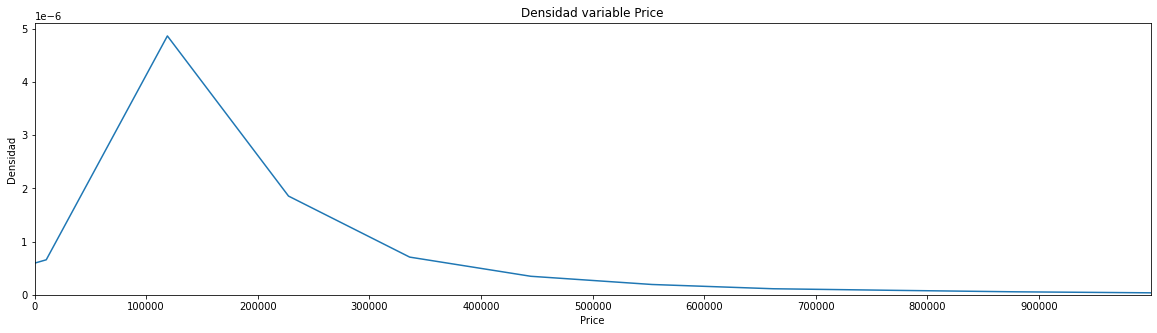

In [ ]:
plt.figure(figsize = (20,5))
sns_hist=sns.kdeplot(data=train['price']).set(title="Densidad variable Price",xlabel="Price",ylabel="Densidad",xlim=(0,1000000),xticks = (range(0,1000000,100000)))

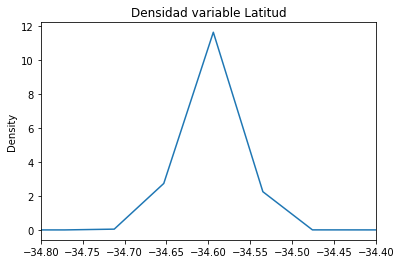

In [ ]:
train['latitud'].plot.kde(title="Densidad variable Latitud",xlabel="Latitud",ylabel="Densidad",xlim=(-34.8,-34.4))

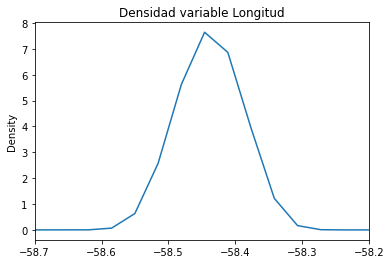

In [ ]:
train['longitud'].plot.kde(title="Densidad variable Longitud",xlabel="Longitud",ylabel="Densidad",xlim=(-58.7,-58.2))

In [ ]:
train.head()

latitud   longitud neighborhood palermo_type          type  rooms  \
57333 -34.601807 -58.469965     Paternal          NaN  Departamento    2.0   
52155 -34.580088 -58.424965      Palermo          NaN  Departamento    2.0   
28134 -34.551481 -58.452358     Belgrano          NaN  Departamento    1.0   
46503 -34.632290 -58.464844       Flores          NaN  Departamento    5.0   
83299 -34.549279 -58.463074        Nuñez          NaN  Departamento    2.0   

       bedrooms  surface_total  surface_covered     price  \
57333       1.0           53.0             49.0   80000.0   
52155       1.0           35.0             35.0   79900.0   
28134       1.0           25.0             20.0   69000.0   
46503       3.0           75.0             75.0  150000.0   
83299       1.0           46.0             34.0   85000.0   

                                                   title  
57333  Venta Depto 2 Amb c/balcon. Av San Martin.Pate...  
52155              1 - Fray Justo Sta. Maria de Oro 2400  
28134     Venta depto mono ambiente Belgrano. Ugarte1500  
46503           VENTA 5 AMBIENTES CON BALCÓN EN FLORES!!  
83299  Departamento 2 ambientes con patio en venta - ...

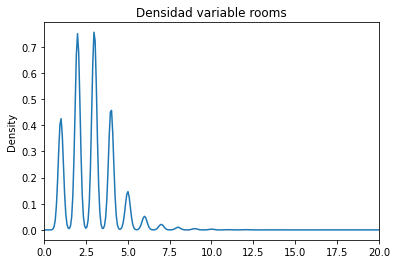

In [ ]:
train['rooms'].plot.kde(title="Densidad variable rooms",xlabel="rooms",ylabel="Densidad", xlim=(0,20))

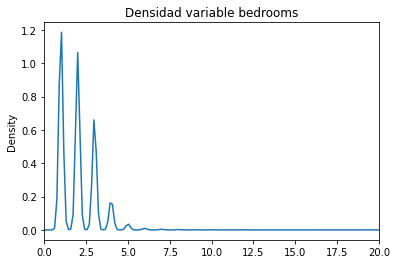

In [ ]:
train['bedrooms'].plot.kde(title="Densidad variable bedrooms",xlabel="bedrooms",ylabel="Densidad", xlim=(0,20))

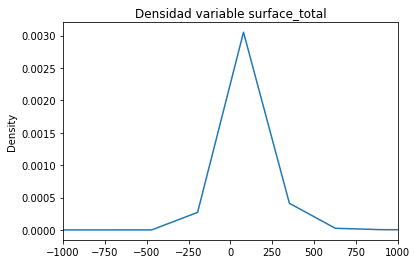

In [ ]:
train['surface_total'].plot.kde(title="Densidad variable surface_total",xlabel="surface_total",ylabel="Densidad", xlim=(-1000,1000))

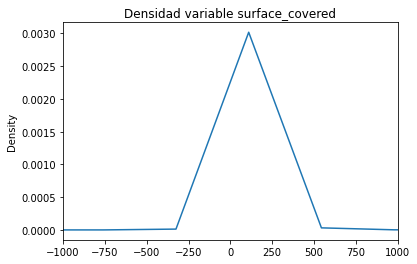

In [ ]:
train['surface_covered'].plot.kde(title="Densidad variable surface_covered",xlabel="surface_covered",ylabel="Densidad", xlim=(-1000,1000))

### ● Analizar las correlaciones existentes entre las variables

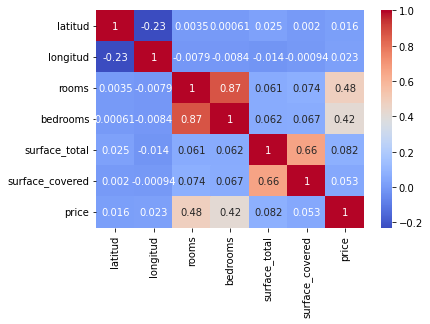

In [ ]:
sns.heatmap(train.corr(),annot=True, cmap = 'coolwarm')

Hay varias relaciones notables:
*   Cantidad de habitaciones vs cantidad de dormitorios (0.87)
*   Superficie cubierta vs superficie total (0.66)
*   Cantidad de habitaciones vs precio de propiedad (0.48)
*   Cantidad de dormitorios vs precio de propiedad (0.42)
*   Latitud vs Longitud (-0.23)


## b) ◆ Datos faltantes

### ● Análisis a nivel columna

<BarContainer object of 11 artists>

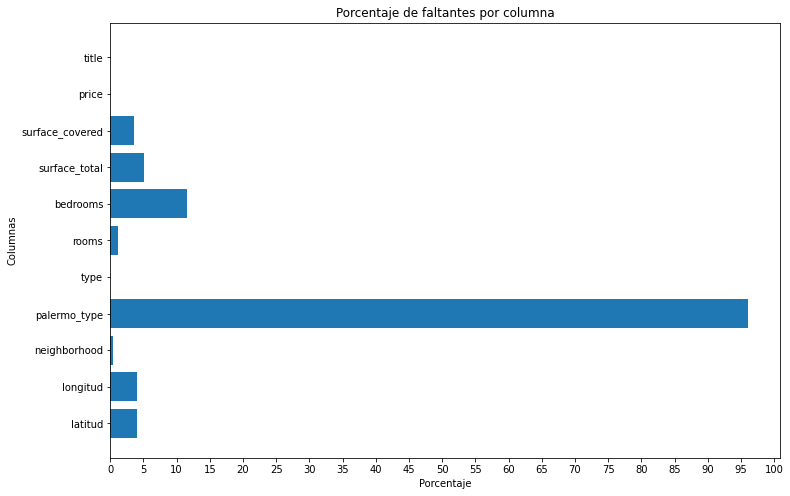

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Porcentaje de faltantes por columna")
plt.xlabel("Porcentaje")
plt.xticks(range(0,101,5))
plt.ylabel("Columnas")
plt.barh(train.columns.to_list(), train.isna().sum()/train.shape[0]*100 )

Vemos que la variable palermo_type tiene mas de 95% de datos faltantes. Tampoco nos sirve para reemplazar los datos cuando `neighbourhood = Palermo`, ya que no hay datos suficientes paa sobreescribir dicha columna con dicha condición.


In [ ]:
train[train.neighborhood == 'Palermo'].palermo_type.isna().value_counts()

True     8543
False    2982
Name: palermo_type, dtype: int64

In [ ]:
df_filtered.drop('palermo_type', axis='columns', inplace=True)
train.drop('palermo_type', axis='columns', inplace=True)
test.drop('palermo_type', axis='columns', inplace=True)

In [ ]:
train.shape

(75398, 10)

Siendo tan pocos los campos nulls de latitud y longitud, los borraremos. Pero la variable permanece ya que puede aportar para el analisis de valores atípicos.Lo mismo con neighbourhood.

In [ ]:
df_filtered = df_filtered[~(df_filtered.latitud.isnull() & df_filtered.longitud.isnull() & df_filtered.neighborhood.isnull())]
train = train[~(train.latitud.isnull() & train.longitud.isnull())]
test = test[~(test.latitud.isnull() & test.longitud.isnull())]

df_filtered = df_filtered[~(df_filtered.neighborhood.isnull())]
train = train[~(train.neighborhood.isnull())]
test = test[~(test.neighborhood.isnull())]

In [ ]:
train.shape

(72196, 10)

In [ ]:
test.shape

(18075, 10)

### ● Análisis a nivel fila

**Realizar un análisis de datos faltantes a nivel de fila.** Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.

<BarContainer object of 4 artists>

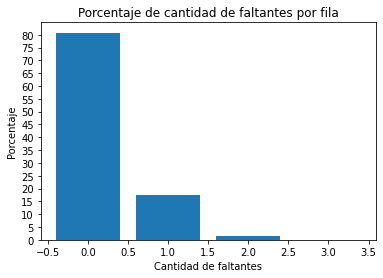

In [ ]:
row_null_series = train.isnull().sum(axis=1).value_counts()/train.shape[0]*100

plt.title("Porcentaje de cantidad de faltantes por fila")
plt.xlabel("Cantidad de faltantes")
plt.ylabel("Porcentaje")
plt.yticks(np.arange(0, 100, 5))

plt.bar(row_null_series.index, row_null_series.values)

Analisis de datos con caracteres raros (Vemos que no hay):

In [ ]:
has_dash = train.astype('str').eq('-').any(0)
has_dot = train.astype('str').eq('.').any(0)
has_whitespace = train.astype('str').eq(' ').any(0)
has_null = train.astype('str').eq('null').any(0)
has_dot & has_dash & has_whitespace & has_null

latitud            False
longitud           False
neighborhood       False
type               False
rooms              False
bedrooms           False
surface_total      False
surface_covered    False
price              False
title              False
dtype: bool

Analisis de datos duplicados. Hemos encontrado datos de este tipo, con lo cual serán borrados:

In [ ]:
train[train.duplicated(keep=False)].head()

latitud   longitud  neighborhood          type  rooms  bedrooms  \
84090 -34.589588 -58.431352       Palermo          Casa    5.0       3.0   
51155 -34.587275 -58.513193  Villa Devoto            PH    5.0       3.0   
85648 -34.636947 -58.417606         Boedo  Departamento    2.0       1.0   
30545 -34.604188 -58.399590          Once  Departamento    3.0       2.0   
54872 -34.579268 -58.440205       Palermo  Departamento    2.0       1.0   

       surface_total  surface_covered     price  \
84090          290.0            230.0  815000.0   
51155          173.0            153.0  320000.0   
85648           34.0             34.0   65000.0   
30545           41.0             41.0   55000.0   
54872           75.0             34.0  182000.0   

                                                   title  
84090  Impecable Casa en Calle Serrano 5 amb . 290 me...  
51155                                  PH - Villa Devoto  
85648        Departamento en venta 2amb, ideal inversor!  
30545  Departamento 2 ambientes bao cocina Y PATIO CU...  
54872  Departamento de 2 ambientes en construcción en...

In [ ]:
size_before = len(train)
train = train.drop_duplicates()
size_after = len(train)
print(f'Se eliminaron: {size_before-size_after} filas duplicadas')

Se eliminaron: 7479 filas duplicadas


In [ ]:
size_before = len(test)
test = test.drop_duplicates()
size_after = len(test)
print(f'Se eliminaron: {size_before-size_after} filas duplicadas')

Se eliminaron: 701 filas duplicadas


### ● Análisis de reparación de valores faltantes
La columna neighborhood, tiene un porcentaje muy bajo de datos nulos. Las propiedades en venta que contienen estos datos faltantes, seran analizadas posteriomente ya que tenemos la hipotesis de que pueden resultar ser datos atipicos basandonos en su latitud y longitud.

En el caso de las propiedades con latitud y longitud faltantes, las eliminamos.

Notamos tambien, que hay propiedades con surface_covered y surface_total faltantes. Debido a que su correlacion es alta (como vimos previamente) podemos imputarlas entre si usando el algoritmo MICE

Para el caso de rooms y bedrooms, podemos seguir la misma logica. 

In [ ]:
columns=['surface_total','surface_covered']
train_columns_to_fill = train[columns].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) #imputation_order='roman'
train_new_columns = imp.fit_transform(train_columns_to_fill)

train[['surface_total','surface_covered']] = train_new_columns

In [ ]:
test_columns_to_fill = test[columns].copy()
test_new_columns = imp.transform(test_columns_to_fill)

test[['surface_total','surface_covered']] = test_new_columns

Comprobamos que no quedaron datos nulos:

In [ ]:
train.surface_total.isnull().sum()

0

In [ ]:
train.surface_covered.isnull().sum()

0

In [ ]:
columns=['bedrooms','rooms']
train_columns_to_fill = train[columns].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) #imputation_order='roman'
train_new_columns = imp.fit_transform(train_columns_to_fill)

train[['bedrooms','rooms']] = train_new_columns.astype("int")

In [ ]:
test_columns_to_fill = test[columns].copy()

test_new_columns = imp.transform(test_columns_to_fill)

test[['bedrooms','rooms']] = test_new_columns.astype(int)

Chequeamos que no queden valores nulos:

In [ ]:
train.bedrooms.isnull().sum()

0

In [ ]:
train.rooms.isnull().sum()

0

In [ ]:
train.reset_index(drop=True, inplace=True) #Reseteamos index
test.reset_index(drop=True, inplace=True) #Reseteamos index

## c) ◆ Valores atípicos

### ● Análisis univariado

Utilizamos zscore para realizar un análisis de valores atípicos de manera univariada.

In [ ]:
train['z_price']=st.zscore(train.price)


In [ ]:
plt.hist(train.z_price,bins=75)
plt.title('Histograma Z-Score Price')
plt.xlabel('Z-Score Price')
plt.ylabel('Amount')
plt.xlim(-1,10)
plt.ylim(0,80000)
plt.show()

In [ ]:
train[(train.z_price < -3) | (train.z_price > 3)].shape


(1028, 11)

In [ ]:
train[train.z_price > 3].shape


(1028, 11)

Como podemos ver, hay mas de 1200 valores atipicos. Ahora pasaremos a analizar mas detenidamente:

In [ ]:
train[train.z_price > 3].head()

latitud   longitud   neighborhood          type  rooms  bedrooms  \
23  -34.614981 -58.362643  Puerto Madero  Departamento      6         5   
40  -34.593098 -58.390295       Recoleta  Departamento      7         5   
75  -34.568032 -58.441285       Belgrano          Casa      6         5   
92  -34.611244 -58.360546  Puerto Madero  Departamento      4         2   
168 -34.613289 -58.362148  Puerto Madero  Departamento      3         2   

     surface_total  surface_covered      price  \
23           500.0            470.0  2950000.0   
40           624.0            624.0  1111111.0   
75           550.0            550.0  1580000.0   
92           220.0            220.0  1680000.0   
168          466.0            319.0  3000000.0   

                                                 title   z_price  
23      DEPTO 6 AMB VENTA EN PUERTO MADERO ALEPH FAENA  9.459677  
40   VENTA/ALQ piso 7 amb de estilo francés, 2 coch...  3.103151  
75   FANTASTICA CASA TOTALMENTE RECICLADA CON PILET...  4.723969  
92   VENTA Exc. semipiso MUY ALTO a nuevo 220 m2  T...  5.069641  
168                       Departamento - Puerto Madero  9.632513

Analizamos los extremos:

In [ ]:
train[train.z_price == train.z_price.max()]

latitud   longitud neighborhood          type  rooms  bedrooms  \
10927 -34.616044 -58.458621    Caballito  Departamento      3         1   

       surface_total  surface_covered       price               title  \
10927           68.0             64.0  21400000.0  Departamento venta   

         z_price  
10927  73.236175

In [ ]:
train[train.z_price == train.z_price.min()]

latitud   longitud   neighborhood          type  rooms  bedrooms  \
4909  -34.610046 -58.361382  Puerto Madero  Departamento      4         3   
63009 -34.587265 -58.389767       Recoleta  Departamento     12         8   

       surface_total  surface_covered   price                         title  \
4909           194.0            194.0  5000.0  Departamento - Puerto Madero   
63009          385.0            385.0  5000.0            Departamento venta   

        z_price  
4909  -0.720366  
63009 -0.720366

Notamos que el maximo pareceria ser un valor erroneamente cargado ya que nos parece que el precio es excesivo para el tamano y la zona de la propiedad. En el caso de los minimos, nos parece que es posible que existan propiedades con este precio. Segun este analisis, eliminaremos el maximo.

In [ ]:
train = train[train.z_price != train.z_price.max()]

Vemos a simple vista que las demas propiedades marcadas como outliers, tienen ese valor por estar en zonas privilegiadas de CABA. Con lo cual, no son outliers, sino que la zona es cara en cuanto a valor por m2.

Analizamos el caso de latitud:

In [ ]:
train['z_latitud']=st.zscore(train.latitud)

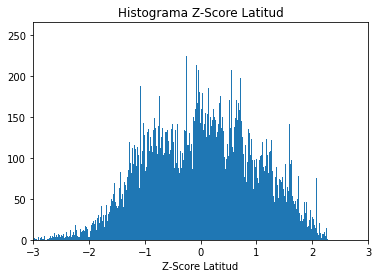

In [ ]:
plt.hist(train.z_latitud,bins=1000)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.ylabel('Amount')
plt.xlim(-3,3)
plt.show()

In [ ]:
train[(train.z_latitud < -3) | (train.z_latitud > 3)].shape


(268, 12)

In [ ]:
train[(train.z_latitud < -3) | (train.z_latitud > 3)].head()

latitud   longitud  neighborhood          type  rooms  bedrooms  \
261  -34.679272 -58.475503  Villa Lugano  Departamento      2         1   
345  -34.679576 -58.474624  Villa Lugano  Departamento      2         1   
387  -34.686350 -58.477110  Villa Lugano  Departamento      3         2   
596  -34.683041 -58.463997  Villa Lugano  Departamento      3         2   
1888 -34.676647 -58.475869  Villa Lugano  Departamento      2         1   

      surface_total  surface_covered     price  \
261            55.0             49.0  138000.0   
345            70.0             31.0  119000.0   
387            50.0             50.0  115000.0   
596            49.0             49.0   45000.0   
1888           52.0             32.0   77000.0   

                                                  title   z_price  z_latitud  
261      Departamento Premium en venta 2 amb. V. Lugano -0.260622  -3.117182  
345   VENTA DEPTO. 2 AMB. CON BALCON TERRAZA, V. LUGANO -0.326300  -3.128658  
387               VENTA DEPARTAMENTO 3 AMBIENTES LUGANO -0.340127  -3.384207  
596         Hermoso Departamento 3 ambientes con vista  -0.582097  -3.259373  
1888      VENTA DEPARTAMENTO DOS AMBIENTES VILLA LUGANO -0.471482  -3.018158

Basados en el dato que nos proporciona el título de la propiedad, podemos suponer que estos datos no pertenecen a CABA. Ejemplos:

Venta casa 3 ambientes s/ lote 1016 m2 SAN PEDRO

Dúplex barrio Los Prados - La Calera [ESTO ES CORDOBA]

Venta Casa en Manzanares Barrio Abierto [MANZANARES, PROV DE BS AS]

Es por ello, que los eliminamos (tambien del set de test):

In [ ]:
train = train[~((train.z_latitud < -3) | (train.z_latitud > 3))]
train.shape

(64448, 12)

In [ ]:
test['z_latitud']=st.zscore(test.latitud)
test = test[~((test.z_latitud < -3) | (test.z_latitud > 3))]
test.shape

(17286, 11)

Analizamos el caso de la longitud:

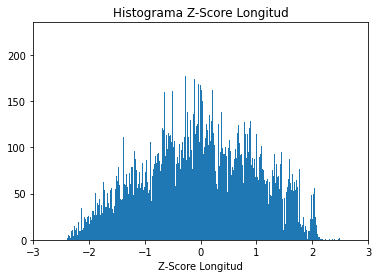

In [ ]:
train['z_longitud']=st.zscore(train.longitud)

plt.hist(train.z_longitud,bins=1000)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.ylabel('Amount')
plt.xlim(-3,3)
plt.show()

In [ ]:
train[(train.z_longitud < -3) | (train.z_longitud > 3)].shape

(0, 13)

In [ ]:
train[(train.z_longitud < -3) | (train.z_longitud > 3)].head()

Empty DataFrame
Columns: [latitud, longitud, neighborhood, type, rooms, bedrooms, surface_total, surface_covered, price, title, z_price, z_latitud, z_longitud]
Index: []

Estas propiedades las hemos visto en Google Maps (usando latitud y longitud). Ambas son de un edificio en Laboulaye, Cordoba. No se condice con lo que enuncia el titulo de propiedad (que estas propiedades están en Saenz Peña, Tres de Febrero). Por estas inconsistencias, las sacamos:

In [ ]:
train = train[~((train.z_longitud < -3) | (train.z_longitud > 3))]
train.shape

(64448, 13)

In [ ]:
test['z_longitud']=st.zscore(test.longitud)
test = test[~((test.z_longitud < -3) | (test.z_longitud > 3))]
test.shape

(17286, 12)

Analizamos surface_total y surface_covered: 

In [ ]:
train['z_surface_total']=st.zscore(train.surface_total)

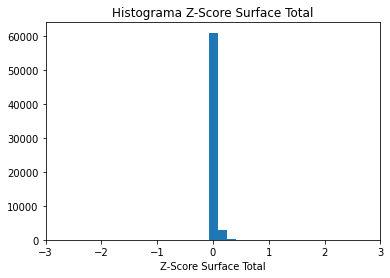

In [ ]:
plt.hist(train.z_surface_total,bins=1000)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.ylabel('Amount')
plt.xlim(-3,3)
plt.show()

In [ ]:
train[(train.z_surface_total < -3) | (train.z_surface_total > 3)].shape

(34, 14)

In [ ]:
train[(train.z_surface_total < -3) | (train.z_surface_total > 3)].head()

latitud   longitud  neighborhood          type  rooms  bedrooms  \
1011 -34.571747 -58.422612       Palermo  Departamento      5         4   
1520 -34.571747 -58.422612       Palermo  Departamento      5         4   
1662 -34.628397 -58.437706     Caballito  Departamento      3         2   
3825 -34.588175 -58.396261      Recoleta  Departamento      1         0   
6887 -34.587320 -58.401556  Barrio Norte  Departamento      2         1   

      surface_total  surface_covered      price  \
1011        42110.0            307.0  3044250.0   
1520        42110.0            307.0  2890500.0   
1662         8136.0           6472.0   203550.0   
3825        36000.0             30.0    90000.0   
6887        56740.0          52540.0   175000.0   

                                                  title   z_price  z_latitud  \
1011  Reventa - Departamento - Palermo Nuevo - Liber...  9.785473   0.939027   
1520  Reventa - Departamento - Palermo Nuevo - Liber...  9.254002   0.939027   
1662  3 Ambientes Venta de Pozo Caballito Full Ameni... -0.034034  -1.198015   
3825  Departamento Monoambiente alquiler temporario ... -0.426545   0.319286   
6887  EXCELENTE DEPARTAMENTO DE 2 AMBIENTES DE CATEG... -0.132723   0.351546   

      z_longitud  z_surface_total  
1011    0.426590        30.197641  
1520    0.426590        30.197641  
1662    0.031169         5.769206  
3825    1.116884        25.804348  
6887    0.978181        40.717097

In [ ]:
train[(train.z_surface_total < -3) | (train.z_surface_total > 3)].tail()

latitud   longitud   neighborhood          type  rooms  bedrooms  \
54307 -34.571747 -58.422612        Palermo  Departamento      4         3   
57895 -34.558309 -58.459923       Belgrano  Departamento      2         1   
59460 -34.576139 -58.468259  Villa Ortuzar  Departamento      5         4   
60131 -34.636532 -58.376406       Barracas  Departamento      4         3   
62638 -34.557903 -58.452293       Belgrano  Departamento      4         3   

       surface_total  surface_covered      price  \
54307        42110.0            222.0  1910920.0   
57895         6470.0           4664.0   149900.0   
59460        14744.0          13717.0   330000.0   
60131        72060.0             90.0   210000.0   
62638         5000.0            109.0   418000.0   

                                                   title   z_price  z_latitud  \
54307  Reventa - Departamento - Palermo Nuevo - Liber...  5.867867   0.939027   
57895   Venta departamento 2 Ambientes. 2 Baños. 2 Patio -0.219487   1.445939   
59460  DEPARTAMENTO EN VENTA en V.Ortúzar, 5 amb. coc...  0.403068   0.773331   
60131   VENTA SEMIPISO 4 AMBIENTES, EXCELENTE OPORTUIDAD -0.011738  -1.504909   
62638  VENTA DEPARTAMENTO 3-4 AMBIENTES COCHERA  BELG...  0.707260   1.461254   

       z_longitud  z_surface_total  
54307    0.426590        30.197641  
57895   -0.550839         4.571297  
59460   -0.769214        10.520578  
60131    1.637016        51.732686  
62638   -0.350960         3.514318

Viendo los valores atipicos, podemos concluir que los datos de la surface_total y surface_covered son ilogicos. Observamos que existe un departamento de dos ambientes con 52000 metros cuadrados de superficie cubierta. Por esta razon, eliminaremos las filas con estos valores atipicos.

In [ ]:
train = train[~((train.z_surface_total < -3) | (train.z_surface_total > 3))]
train.shape

(64414, 14)

In [ ]:
test['z_surface_total']=st.zscore(test.surface_total)
test = test[~((test.z_surface_total < -3) | (test.z_surface_total > 3))]
test.shape

(17225, 13)

In [ ]:
train['z_surface_covered']=st.zscore(train.surface_covered)

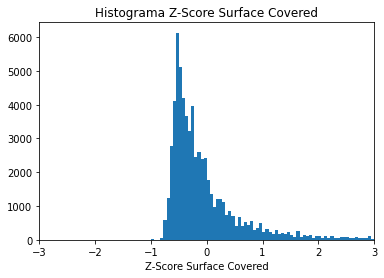

In [ ]:
plt.hist(train.z_surface_covered,bins=1000)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.ylabel('Amount')
plt.xlim(-3,3)
plt.show()

In [ ]:
train[(train.z_surface_covered < -3) | (train.z_surface_covered > 3)].shape

(918, 15)

In [ ]:
train[(train.z_surface_covered < -3) | (train.z_surface_covered > 3)].head()

latitud   longitud   neighborhood          type  rooms  bedrooms  \
23  -34.614981 -58.362643  Puerto Madero  Departamento      6         5   
40  -34.593098 -58.390295       Recoleta  Departamento      7         5   
62  -34.563353 -58.444035       Belgrano  Departamento     12         5   
75  -34.568032 -58.441285       Belgrano          Casa      6         5   
165 -34.590568 -58.384887       Recoleta  Departamento      5         5   

     surface_total  surface_covered      price  \
23      500.000000            470.0  2950000.0   
40      624.000000            624.0  1111111.0   
62      435.000000            435.0   850000.0   
75      550.000000            550.0  1580000.0   
165     340.979624            310.0   980000.0   

                                                 title   z_price  z_latitud  \
23      DEPTO 6 AMB VENTA EN PUERTO MADERO ALEPH FAENA  9.459677  -0.691907   
40   VENTA/ALQ piso 7 amb de estilo francés, 2 coch...  3.103151   0.133589   
62   Oportunidad retasada!!! Virrey Loreto 1700, 19...  2.200563   1.255670   
75   FANTASTICA CASA TOTALMENTE RECICLADA CON PILET...  4.723969   1.079147   
165                           Departamento en Recoleta  2.649937   0.229006   

     z_longitud  z_surface_total  z_surface_covered  
23     1.997561         0.278668           5.157261  
40     1.273165         0.367829           7.178210  
62    -0.134618         0.231931           4.697954  
75    -0.062599         0.314620           6.207105  
165    1.414843         0.164328           3.057573

In [ ]:
train[(train.z_surface_covered < -3) | (train.z_surface_covered > 3)].tail()

latitud   longitud neighborhood          type  rooms  bedrooms  \
64177 -34.573023 -58.419698      Palermo  Departamento      5         3   
64245 -34.567085 -58.430604     Belgrano  Departamento      5         4   
64328 -34.592703 -58.388273     Recoleta  Departamento      6         4   
64408 -34.574864 -58.421311      Palermo  Departamento      5         3   
64625 -34.645319 -58.370902     Barracas          Casa      2         1   

       surface_total  surface_covered      price  \
64177     375.000000            337.0  1700000.0   
64245     391.448769            359.0  2950000.0   
64328     315.000000            315.0  1190000.0   
64408     400.000000            390.0  2844000.0   
64625     352.000000            352.0   300000.0   

                                                  title   z_price  z_latitud  \
64177  PISO ALTO  EN VENTA PALERMO 375 M2 5 AMB+2 COCH   5.138776   0.890880   
64245                          Departamento en Belgrano  9.459677   1.114879   
64328                           Departamento - Recoleta  3.375848   0.148482   
64408                     Piso en Venta Le Parc Demaría  9.093264   0.821410   
64625                                   Casa - Barracas  0.299367  -1.836388   

       z_longitud  z_surface_total  z_surface_covered  
64177    0.502903         0.188789           3.411895  
64245    0.217217         0.200616           3.700602  
64328    1.326147         0.145647           3.123188  
64408    0.460653         0.206765           4.107417  
64625    1.781202         0.172252           3.608741

Observando estos datos podemos verificar que los datos de surface_covered parecen ser logicos. Ademas, teniendo en cuenta que ya eliminamos de nuestro data set los casos atipicos de surface_total (que tiene 0,66 de correlacion con surface_covered), decidimos manterer en nuestro dataset estos "outliers".  


In [ ]:
train['z_rooms']=st.zscore(train.rooms)

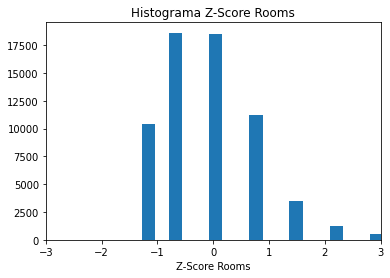

In [ ]:
plt.hist(train.z_rooms,bins=100)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.ylabel('Amount')
plt.xlim(-3,3)
plt.show()

In [ ]:
train[(train.z_rooms < -3) | (train.z_rooms > 3)].shape

(495, 16)

In [ ]:
train[(train.z_rooms < -3) | (train.z_rooms > 3)].rooms.value_counts()

8     225
9      89
10     73
11     32
12     25
14     15
15     12
13      7
16      3
20      3
17      2
18      2
19      2
28      1
30      1
24      1
35      1
32      1
Name: rooms, dtype: int64

Revisamos los valores que mas se alejan del z_score = 0:

In [ ]:
train[(train.rooms > 15)]

latitud   longitud      neighborhood          type  rooms  bedrooms  \
8626  -34.572580 -58.444946          Belgrano          Casa     16        11   
9946  -34.616391 -58.456038         Caballito  Departamento     30         2   
12140 -34.624766 -58.418918             Boedo            PH     20        14   
12528 -34.642037 -58.438995  Parque Chacabuco  Departamento     35        26   
14665 -34.611905 -58.382384         Monserrat  Departamento     18        17   
25776 -34.616487 -58.371596         San Telmo            PH     24        22   
29393 -34.618485 -58.377993         San Telmo  Departamento     16        16   
29575 -34.611413 -58.389221         Monserrat          Casa     17        16   
30655 -34.648922 -58.380522          Barracas          Casa     18        17   
31360 -34.618485 -58.377993         San Telmo          Casa     16        16   
39432 -34.632698 -58.360514              Boca            PH     19        18   
44826 -34.632537 -58.360577              Boca  Departamento     19        18   
47003 -34.618153 -58.362615     Puerto Madero  Departamento     20         1   
50321 -34.570959 -58.458106          Belgrano          Casa     28        16   
51045 -34.633236 -58.480313          Floresta            PH     32        32   
59312 -34.597022 -58.385681      Barrio Norte            PH     17        14   
60525 -34.638432 -58.369712          Barracas            PH     20        17   

       surface_total  surface_covered      price  \
8626      791.081999            747.0   480000.0   
9946       79.000000             79.0   230000.0   
12140    1019.000000           1019.0   820000.0   
12528      37.000000             33.0    67000.0   
14665     554.000000            334.0   240000.0   
25776     800.000000            650.0   350000.0   
29393     992.958579            943.0  1300000.0   
29575     585.000000            458.0   880000.0   
30655     515.000000            515.0   135000.0   
31360     992.958579            943.0  1300000.0   
39432     372.000000            318.0   159000.0   
44826     372.000000            318.0   139000.0   
47003      37.000000             31.0   350000.0   
50321     845.000000            845.0   950000.0   
51045     535.000000            435.0   300000.0   
59312     836.000000            836.0   950000.0   
60525     807.000000            470.0   640000.0   

                                                   title   z_price  z_latitud  \
8626                                     Casa - Belgrano  0.921576   0.907596   
9946     C/DEP COCH Y BAULERA - SEGUI AL 700 - Caballito  0.057396  -0.745090   
12140  Edificio ubicado en el Barrio de Boedo en Vent...  2.096861  -1.061053   
12528  Venta Departamento monoambiente balcón full am... -0.506049  -1.712546   
14665  Hotel en Venta - 17 habitaciones - Terraza Pro...  0.091963  -0.575900   
25776           Antiguo Ph para Hotel de Pasajeros 650m2  0.472203  -0.748711   
29393                          Departamento en San Telmo  3.756087  -0.824112   
29575  IMPONENTE CASA 17 AMB CON TERRAZA VENTA MONSERRAT  2.304265  -0.557333   
30655  Casa sobre Lote Propio - A Refaccionar - Barracas -0.270992  -1.972275   
31360                                  Casa en San Telmo  3.756087  -0.824112   
39432          PH 18 HABITACIONES AV ALMTE BROWN LA BOCA -0.188031  -1.360267   
44826   DEPARTAMENTO PH 19 AMBIENTES AV ALMTE BROWN BOCA -0.257165  -1.354189   
47003                       Departamento - Puerto Madero  0.472203  -0.811585   
50321  Imponente casa inglesa de 3 plantas   S.S. en ...  2.546235   0.968726   
51045                   Hotel Familiar,  32 Habitaciones  0.299367  -1.380569   
59312                    PH Uso Comercial - Barrio Norte  2.546235  -0.014445   
60525  VENTA PH EN BARRACAS PB, 1ER PISO Y TERRAZA 80...  1.474652  -1.576569   

       z_longitud  z_surface_total  z_surface_covered    z_rooms  
8626    -0.158484         0.487966           8.792345   9.326633  
9946    -0.449063        -0.024045    

Viendo el titulo de cada propiedad podemos concluir que estos potenciales "outliers" en realidad son datos coherentes. Cabe aclarar que hay algunos casos que si son outliers pero analizaremos mas adelante de forma multivariada. 

In [ ]:
train['z_bedrooms']=st.zscore(train.bedrooms)

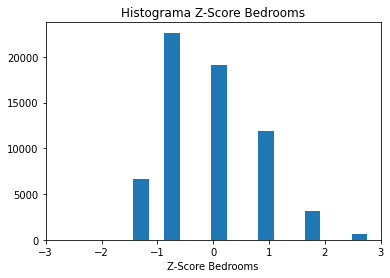

In [ ]:
plt.hist(train.z_bedrooms,bins=200)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.ylabel('Amount')
plt.xlim(-3,3)
plt.show()

In [ ]:
train[(train.z_bedrooms < -3) | (train.z_bedrooms > 3)].shape

(383, 17)

In [ ]:
train[(train.z_bedrooms < -3) | (train.z_bedrooms > 3)].bedrooms.value_counts()

6     171
7      72
8      46
10     22
9      17
12     14
11      9
16      6
14      6
13      3
17      3
32      3
15      3
22      2
18      2
70      1
20      1
26      1
30      1
Name: bedrooms, dtype: int64

In [ ]:
train[(train.bedrooms > 15)]

latitud   longitud      neighborhood          type  rooms  bedrooms  \
5663  -34.588454 -58.385257          Recoleta  Departamento      5        22   
10855 -34.646632 -58.497902        Villa Luro  Departamento      3        70   
12528 -34.642037 -58.438995  Parque Chacabuco  Departamento     35        26   
14665 -34.611905 -58.382384         Monserrat  Departamento     18        17   
22680 -34.576061 -58.421289           Palermo  Departamento      3        20   
25776 -34.616487 -58.371596         San Telmo            PH     24        22   
29393 -34.618485 -58.377993         San Telmo  Departamento     16        16   
29575 -34.611413 -58.389221         Monserrat          Casa     17        16   
30655 -34.648922 -58.380522          Barracas          Casa     18        17   
31360 -34.618485 -58.377993         San Telmo          Casa     16        16   
36089 -34.630186 -58.389156  Parque Patricios  Departamento      1        32   
38855 -34.611905 -58.382384         Monserrat            PH     15        16   
39432 -34.632698 -58.360514              Boca            PH     19        18   
42352 -34.608645 -58.485619  Villa del Parque  Departamento      4        32   
44214 -34.611905 -58.382384         Monserrat            PH     15        16   
44826 -34.632537 -58.360577              Boca  Departamento     19        18   
50321 -34.570959 -58.458106          Belgrano          Casa     28        16   
51045 -34.633236 -58.480313          Floresta            PH     32        32   
54430 -34.591110 -58.400685          Recoleta  Departamento      4        30   
60525 -34.638432 -58.369712          Barracas            PH     20        17   

       surface_total  surface_covered      price  \
5663      170.002520            144.0   430000.0   
10855      93.783811             70.0   135000.0   
12528      37.000000             33.0    67000.0   
14665     554.000000            334.0   240000.0   
22680     127.000000            117.0   650000.0   
25776     800.000000            650.0   350000.0   
29393     992.958579            943.0  1300000.0   
29575     585.000000            458.0   880000.0   
30655     515.000000            515.0   135000.0   
31360     992.958579            943.0  1300000.0   
36089      32.000000             32.0    52000.0   
38855     587.000000            276.0   349000.0   
39432     372.000000            318.0   159000.0   
42352      83.000000             75.0   189000.0   
44214     587.000000            276.0   299900.0   
44826     372.000000            318.0   139000.0   
50321     845.000000            845.0   950000.0   
51045     535.000000            435.0   300000.0   
54430     148.000000            138.0   380000.0   
60525     807.000000            470.0   640000.0   

                                                   title   z_price  z_latitud  \
5663   Departamento de 2 dormitorios con balcón en ve...  0.748740   0.308750   
10855                          Departamento - Villa Luro -0.270992  -1.885900   
12528  Venta Departamento monoambiente balcón full am... -0.506049  -1.712546   
14665  Hotel en Venta - 17 habitaciones - Terraza Pro...  0.091963  -0.575900   
22680                             Departamento - Palermo  1.509219   0.776259   
25776           Antiguo Ph para Hotel de Pasajeros 650m2  0.472203  -0.748711   
29393                          Departamento en San Telmo  3.756087  -0.824112   
29575  IMPONENTE CASA 17 AMB CON TERRAZA VENTA MONSERRAT  2.304265  -0.557333   
30655  Casa sobre Lote Propio - A Refaccionar - Barracas -0.270992  -1.972275   
31360                                  Casa en San Telmo  3.756087  -0.824112   
36089           Depto 1 ambiente amplio apto profesional -0.557900  -1.265509   
38855  PH  DE16 HABITACIONES IDEAL PARA HOSTEL A RECI...  0.468746  -0.575900   
39432          PH 18 HABITACIONES AV ALMTE BROWN LA BOCA -0.188031  -1.360267   
42352  Departamento 4 ambientes a estrenar en duplex ... -0.084329  -0.452888   
44214  PH  DE16 HABI

Nuevamente, podemos observar que los valores parecen ser coherentes (exceptuando los casos que analizaremos posteriormente de forma multivariada)

Eliminamos las columnas que utilizamos para el anterior analisis:

In [ ]:
train = train.loc[:,~train.columns.str.startswith('z_')]
train.head()

latitud   longitud neighborhood          type  rooms  bedrooms  \
0 -34.601807 -58.469965     Paternal  Departamento      2         1   
1 -34.580088 -58.424965      Palermo  Departamento      2         1   
2 -34.551481 -58.452358     Belgrano  Departamento      1         1   
3 -34.632290 -58.464844       Flores  Departamento      5         3   
4 -34.549279 -58.463074        Nuñez  Departamento      2         1   

   surface_total  surface_covered     price  \
0           53.0             49.0   80000.0   
1           35.0             35.0   79900.0   
2           25.0             20.0   69000.0   
3           75.0             75.0  150000.0   
4           46.0             34.0   85000.0   

                                               title  
0  Venta Depto 2 Amb c/balcon. Av San Martin.Pate...  
1              1 - Fray Justo Sta. Maria de Oro 2400  
2     Venta depto mono ambiente Belgrano. Ugarte1500  
3           VENTA 5 AMBIENTES CON BALCÓN EN FLORES!!  
4  Departamento 2 ambientes con patio en venta - ...

In [ ]:
test = test.loc[:,~test.columns.str.startswith('z_')]
test.head()

latitud   longitud      neighborhood          type  rooms  bedrooms  \
0 -34.598679 -58.499717  Villa del Parque  Departamento      1         0   
1 -34.574987 -58.420611           Palermo  Departamento      2         1   
2 -34.600116 -58.390147       San Nicolás          Casa      5         3   
3 -34.581524 -58.403588           Palermo  Departamento     10         6   
4 -34.615030 -58.431938         Caballito          Casa      6         5   

   surface_total  surface_covered      price  \
0           38.0             28.0    85000.0   
1          150.0             70.0   520000.0   
2          123.0            187.0   780000.0   
3          520.0            500.0  3300000.0   
4          227.0            466.0   830000.0   

                                               title  
0                    Departamento - Villa del Parque  
1  VENTA super RECICLADO depto 70 m2 cubiertos y ...  
2  CASA EN LOTE PROPIO, PB + 2 PISOS - CHALET COC...  
3                         Venta Departamento Palermo  
4                   CASA CON PILETA, PATIO Y TERRAZA

### ● Análisis multivariado

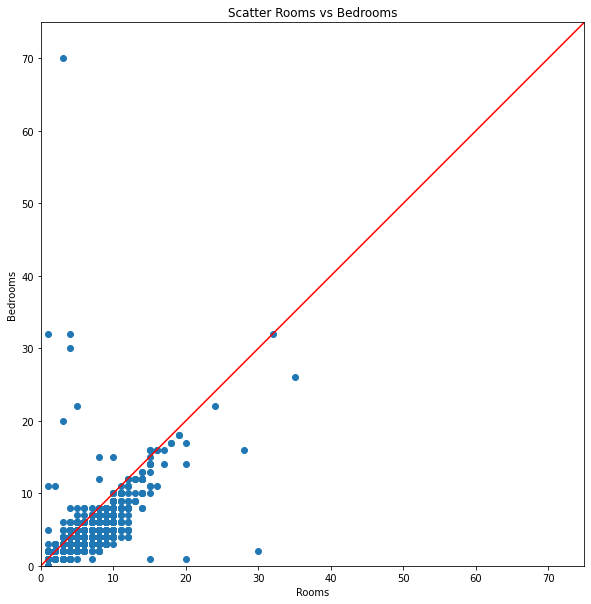

In [ ]:
x = train.rooms
y = train.bedrooms
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y)
plt.title('Scatter Rooms vs Bedrooms')
plt.xlabel('Rooms')
plt.ylabel('Bedrooms')
ax.set_aspect('equal')
ax.set_xlim((0, 75))
ax.set_ylim((0, 75))
ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Notamos que hay propiedades que tienen mas bedrooms que rooms. Esto no tiene mucho sentido. Para confirmar si realemente son outliers haremos uso de isolation forest:

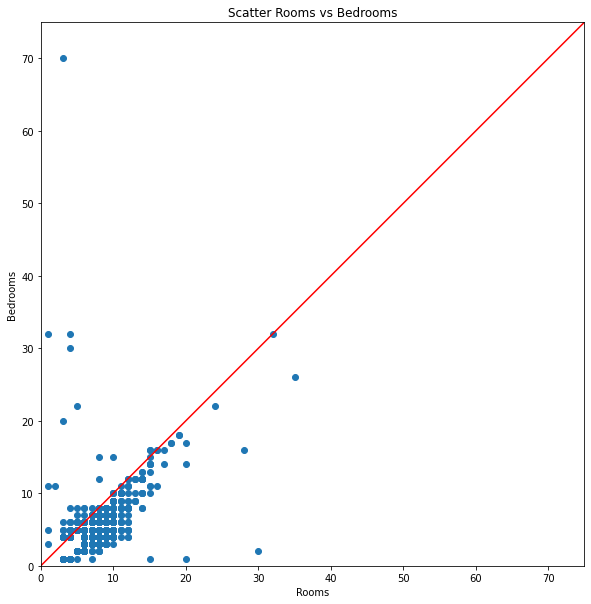

In [ ]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

df_isolation = train.copy()

pred = iforest.fit_predict(df_isolation[['rooms', 'bedrooms']])

df_isolation['outlier_label'] = pred
df_isolation['scores'] = iforest.decision_function(df_isolation[['rooms', 'bedrooms']])


x = df_isolation[df_isolation['outlier_label'] == -1].rooms
y = df_isolation[df_isolation['outlier_label'] == -1].bedrooms
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y)
plt.title('Scatter Rooms vs Bedrooms')
plt.xlabel('Rooms')
plt.ylabel('Bedrooms')
ax.set_aspect('equal')
ax.set_xlim((0, 75))
ax.set_ylim((0, 75))
ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Notamos que el algoritmo encontro a las propiedades por encima de la recta y=x como outliers, corroborando nuestro pensamiento. Podemos ver que tambien detecto propiedades por debajo de la recta. Viendo mas detalladamente estos valores pensamos que no se tratan de outliers realmente sino de departamentos con muchos ambientes, lo cual es normal. 

In [ ]:
train = train[train['rooms'] >= train['bedrooms']]

train.shape

(64329, 10)

In [ ]:
test = test[test['rooms'] >= test['bedrooms']]

test.shape

(17193, 10)

Usamos Isolation Forest para encontrar outliers teniendo en cuenta las variables surface_covered y surface_total: 

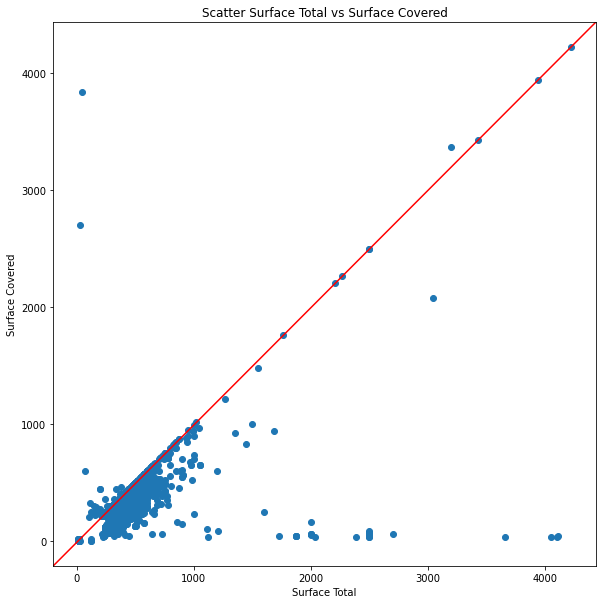

In [ ]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

df_isolation = train.copy()

pred = iforest.fit_predict(df_isolation[['surface_covered', 'surface_total']])

df_isolation['outlier_label'] = pred

x = df_isolation[df_isolation['outlier_label'] == -1].surface_total
y = df_isolation[df_isolation['outlier_label'] == -1].surface_covered
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y)
plt.title('Scatter Surface Total vs Surface Covered')
plt.xlabel('Surface Total')
plt.ylabel('Surface Covered')
ax.set_aspect('equal')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Observamos los outliers mas detalladamente:

En principio, fuimos por el lado logico y nos dimos cuenta que una propiedad no puede tener un valor mas alto de surface_covered que de surface_total. Estas propiedades serian las siguientes:

In [ ]:
outliers = df_isolation[df_isolation['outlier_label'] == -1]

outliers[outliers['surface_covered'] >  outliers['surface_total']]

latitud   longitud         neighborhood          type  rooms  \
341   -34.567172 -58.430634              Palermo  Departamento      5   
2225  -34.600608 -58.371484            Catalinas          Casa      6   
2996  -34.547366 -58.451025                Nuñez          Casa      8   
4180  -34.567172 -58.430634              Palermo  Departamento      5   
7782  -34.627826 -58.411124        San Cristobal          Casa      5   
8772  -34.596675 -58.424455              Palermo            PH      6   
14329 -34.588342 -58.388169             Recoleta  Departamento      4   
14752 -34.620660 -58.382698         Constitución  Departamento      7   
19095 -34.630704 -58.400901     Parque Patricios  Departamento      1   
23568 -34.572494 -58.462433             Belgrano          Casa      5   
31906 -34.634391 -58.420278                Boedo          Casa      4   
32245 -34.596675 -58.424455              Palermo          Casa      6   
36565 -34.607937 -58.498062     Villa del Parque          Casa      5   
38391 -34.555770 -58.487083             Saavedra          Casa      5   
39563 -34.633819 -58.504568           Villa Luro  Departamento      3   
39713 -34.610997 -58.451846            Caballito          Casa      7   
39970 -34.623514 -58.409554        San Cristobal  Departamento      3   
41887 -34.637727 -58.441189     Parque Chacabuco          Casa      6   
42451 -34.651600 -58.527395              Liniers          Casa      4   
44950 -34.632705 -58.461142               Flores  Departamento      4   
46286 -34.608660 -58.426258              Almagro          Casa      5   
49749 -34.579394 -58.453519           Colegiales  Departamento      3   
53095 -34.613712 -58.467452  Villa General Mitre          Casa      5   
54690 -34.606525 -58.430740            Caballito  Departamento      2   
55321 -34.568478 -58.464339             Belgrano          Casa      9   
55906 -34.585620 -58.438411              Palermo          Casa      4   
60327 -34.658535 -58.481791            Mataderos          Casa     12   
60358 -34.635830 -58.471558               Flores          Casa      5   
60455 -34.649149 -58.522432              Liniers          Casa      6   
60727 -34.639048 -58.431920     Parque Chacabuco          Casa      8   
62389 -34.590880 -58.422544              Palermo          Casa      6   
63323 -34.603078 -58.503409     Villa del Parque          Casa      4   
64034 -34.634265 -58.505317           Villa Luro  Departamento      3   

       bedrooms  surface_total  surface_covered       price  \
341           4          377.0       400.000000   3200000.0   
2225          5          380.0       384.000000    790000.0   
2996          5          161.0       250.000000    520000.0   
4180          4          377.0       400.000000   2700000.0   
7782          3          149.0       305.000000    235000.0   
8772          5          200.0       450.000000    350000.0   
14329         3          271.0       300.000000   1800000.0   
14752         5          440.0       444.000000    540000.0   
19095         0           31.0      2700.000000     71500.0   
23568         4         3197.0      3367.000000  12000000.0   
31906         3          162.0       278.000000    220000.0   
32245         5          200.0       450.000000    350000.0   
36565         4          375.0       461.000000    650000.0   
38391         3          200.0       274.000000    400000.0   
39563         1           10.0        18.631746    120000.0   
39713         3          259.0       300.000000    400000.0   
39970         2           72.0       602.000000    125000.0   
41887         3          170.0       258.000000    375000.0   
42451         3          205.0       221.000000    575000.0   
44950         3          160.0       295.000000    450000.0   
46286         4          115.0       330.000000    450000.0   
49749         2           41.0      3837.000000     83000.0   
53095         4          336.0       445.000000    619000.0   
54690         

Mientras haciamos este analisis, observamos que hay muchas propiedades con un valor de surface_covered menor a 10 (en muchos casos igual a 1). Estas propiedades poseen muchas habitaciones con lo cual efectivamente son datos ilogicos. Los cuales procederemos a remover junto con los del anterior analisis.

In [ ]:
outliers[outliers['surface_covered'] < 10]

latitud   longitud      neighborhood          type  rooms  bedrooms  \
1127  -34.572512 -58.478717     Villa Urquiza  Departamento      5         4   
2544  -34.583316 -58.496166  Villa Pueyrredón            PH      4         3   
6893  -34.624678 -58.524197         Versalles          Casa      2         2   
10696 -34.606251 -58.384552       San Nicolás  Departamento      1         1   
12630 -34.585964 -58.515477  Villa Pueyrredón            PH      4         3   
14209 -34.667069 -58.472989      Villa Lugano  Departamento      3         2   
14817 -34.573360 -58.441008          Belgrano  Departamento      3         2   
18724 -34.572512 -58.478717     Villa Urquiza  Departamento      5         4   
20731 -34.633430 -58.480731          Floresta            PH      2         1   
22133 -34.610942 -58.490247  Villa del Parque            PH      3         2   
24234 -34.614692 -58.436661         Caballito  Departamento      3         2   
27703 -34.572512 -58.478717     Villa Urquiza  Departamento      5         4   
27833 -34.554519 -58.491599          Saavedra  Departamento      2         1   
33106 -34.572157 -58.494807     Villa Urquiza  Departamento      3         2   
34338 -34.589957 -58.482162         Agronomía            PH      4         3   
35497 -34.585964 -58.515477  Villa Pueyrredón          Casa      4         3   
43809 -34.576366 -58.482322     Villa Urquiza            PH      4         3   
43935 -34.576023 -58.448355        Colegiales  Departamento      3         2   
46580 -34.570884 -58.488694     Villa Urquiza  Departamento      3         2   
54423 -34.583718 -58.484141     Villa Urquiza          Casa      4         3   
54661 -34.570428 -58.477361     Villa Urquiza            PH      3         2   
61725 -34.583818 -58.495458  Villa Pueyrredón  Departamento      1         0   

       surface_total  surface_covered     price  \
1127       22.715015              1.0  598000.0   
2544       22.715015              1.0  280000.0   
6893       22.715015              1.0  290000.0   
10696      22.715015              1.0   40548.0   
12630     117.000000              1.0  215000.0   
14209      22.715015              1.0   80000.0   
14817      22.715015              1.0  229000.0   
18724      22.715015              1.0  628000.0   
20731      22.715015              1.0   52000.0   
22133      22.715015              1.0  187000.0   
24234      17.000000              6.0  125000.0   
27703      22.715015              1.0  598000.0   
27833      23.744998              2.0   82000.0   
33106      22.715015              1.0  285000.0   
34338      22.715015              1.0  220000.0   
35497     117.000000              1.0  225000.0   
43809      22.715015              1.0  259000.0   
43935      22.715015              1.0  229000.0   
46580      22.715015              1.0  135000.0   
54423      22.715015              1.0  498000.0   
54661      22.715015              1.0  215000.0   
61725      22.715015              1.0   92000.0   

                                                   title  outlier_label  
1127   Departamento 5 Ambientes c/Dep. Sevicio!!! en ...             -1  
2544           EXCELENTE PH 4 AMBIENTES IDEAL 2 FAMILIAS             -1  
6893             Inmueble S/Lote de 8,66 x 35,90 y 33,25             -1  
10696  Departamento 1 Ambiente a estrenar full amenit...             -1  
12630  Duplex 4 ambientes o 3 ambientes más Play-room...             -1  
14209        VENTA HERMOSO DEPARTAMENTO EN BARRIO SAMORE             -1  
14817  3 Ambientes a estrenar c/ cochera y parrilla e...             -1  
18724  Departamento 5 Ambientes c/Dep. Sevicio Terraz...             -1  
20731                                      PH - Floresta             -1  
22133  Departamento Tipo Casa en Duplex al frente de ...             -1  
24234   3 ambientes VENTA Depto BALCON corrido al FRENTE             -1  
27703  Departamento 5 Ambientes c/Dep. Sevicio Terraz...             -1  
27833  RAMALLO 3400 / DEPARTAMEN

In [ ]:
train = train[train['surface_total'] >= train['surface_covered']]

train = train[train['surface_covered'] > 10]

train.shape

(63847, 10)

In [ ]:
test = test[test['surface_total'] >= test['surface_covered']]

test = test[test['surface_covered'] > 10]

test.shape

(17063, 10)

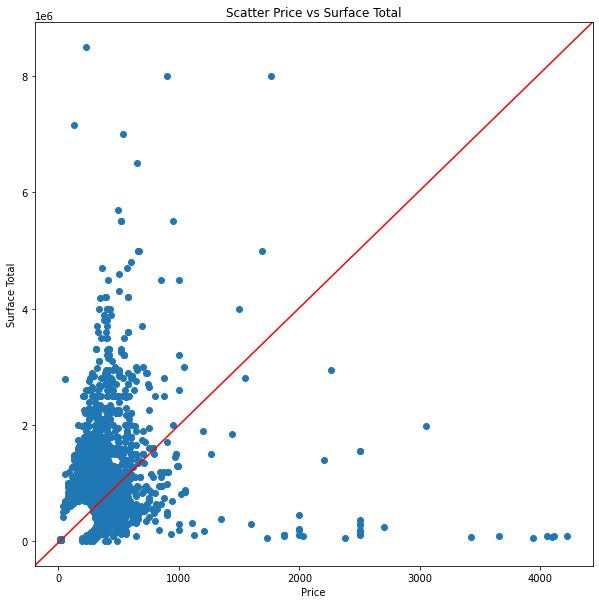

In [ ]:
iforest_price_surface = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

df_isolation_price_forest = train.copy()

pred = iforest_price_surface.fit_predict(df_isolation_price_forest[['price', 'surface_total']])

df_isolation_price_forest['outlier_label'] = pred

x = df_isolation_price_forest[df_isolation_price_forest['outlier_label'] == -1].surface_total
y = df_isolation_price_forest[df_isolation_price_forest['outlier_label'] == -1].price
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y)
plt.title('Scatter Price vs Surface Total')
plt.xlabel('Price')
plt.ylabel('Surface Total')
# ax.set_aspect('equal')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

In [ ]:
outliers = df_isolation_price_forest[df_isolation_price_forest['outlier_label'] == -1]

outliers

latitud   longitud      neighborhood          type  rooms  bedrooms  \
23    -34.614981 -58.362643     Puerto Madero  Departamento      6         5   
24    -34.589588 -58.431352           Palermo          Casa      5         3   
25    -34.592287 -58.384295          Recoleta  Departamento      5         4   
40    -34.593098 -58.390295          Recoleta  Departamento      7         5   
51    -34.594751 -58.393546          Recoleta  Departamento      5         4   
...          ...        ...               ...           ...    ...       ...   
64538 -34.578844 -58.406734           Palermo  Departamento      4         3   
64571 -34.603226 -58.524025      Villa Devoto            PH      4         3   
64577 -34.578914 -58.505478  Villa Pueyrredón          Casa      5         4   
64596 -34.552132 -58.438501          Belgrano  Departamento      4         3   
64625 -34.645319 -58.370902          Barracas          Casa      2         1   

       surface_total  surface_covered      price  \
23        500.000000            470.0  2950000.0   
24        290.000000            230.0   815000.0   
25        254.000000            245.0   750000.0   
40        624.000000            624.0  1111111.0   
51        270.000000            265.0   669000.0   
...              ...              ...        ...   
64538     260.640985            232.0   730000.0   
64571     316.000000            102.0   180000.0   
64577     555.000000            300.0   495000.0   
64596     224.000000            211.0  1250000.0   
64625     352.000000            352.0   300000.0   

                                                   title  outlier_label  
23        DEPTO 6 AMB VENTA EN PUERTO MADERO ALEPH FAENA             -1  
24     Impecable Casa en Calle Serrano 5 amb . 290 me...             -1  
25                                     1 - Libertad 1300             -1  
40     VENTA/ALQ piso 7 amb de estilo francés, 2 coch...             -1  
51     PISO 26 y 27 VISTA INCREÍBLE AL RÍO -  270 m2 ...             -1  
...                                                  ...            ...  
64538         Muy lindo departamento en Edificio Francés             -1  
64571       VENTA PH A RECICLAR 4 AMBIENTES VILLA DEVOTO             -1  
64577                            Casa - Villa Pueyrredon             -1  
64596  Torre Forum alcorta 3 dormitorios playroom 3 c...             -1  
64625                                    Casa - Barracas             -1  

[3193 rows x 11 columns]

Notamos que el metodo de Isolation Forest detecta outliers. Sin embargo, si miramos detenidamente cada propiedad, estos no parecen serlo. Simplemente, se esta tratando de propiedades cuyo valor es muy alto o se diferencia del resto, lo cual es posible ya que los precios de las propiedades no solo dependen de su cantidad de metros sino tambien de la zona en la que se encuentra. 

A continuacion, procederemos a eliminar la columna title, la cual fue de gran utilidad para el analisis de valores atipicos pero que no tiene mucho valor para el analisis posterior:

In [ ]:
train.drop('title', axis='columns', inplace=True)
train.head()

latitud   longitud neighborhood          type  rooms  bedrooms  \
0 -34.601807 -58.469965     Paternal  Departamento      2         1   
1 -34.580088 -58.424965      Palermo  Departamento      2         1   
2 -34.551481 -58.452358     Belgrano  Departamento      1         1   
3 -34.632290 -58.464844       Flores  Departamento      5         3   
4 -34.549279 -58.463074        Nuñez  Departamento      2         1   

   surface_total  surface_covered     price  
0           53.0             49.0   80000.0  
1           35.0             35.0   79900.0  
2           25.0             20.0   69000.0  
3           75.0             75.0  150000.0  
4           46.0             34.0   85000.0

In [ ]:
test.drop('title', axis='columns', inplace=True)
test.head()

latitud   longitud      neighborhood          type  rooms  bedrooms  \
0 -34.598679 -58.499717  Villa del Parque  Departamento      1         0   
1 -34.574987 -58.420611           Palermo  Departamento      2         1   
3 -34.581524 -58.403588           Palermo  Departamento     10         6   
5 -34.586527 -58.398279           Palermo  Departamento      2         1   
6 -34.577647 -58.406064           Palermo  Departamento      4         3   

   surface_total  surface_covered      price  
0           38.0             28.0    85000.0  
1          150.0             70.0   520000.0  
3          520.0            500.0  3300000.0  
5           43.0             41.0    87000.0  
6          130.0            118.0   690000.0

## d) ◆ Reducción de la dimensionalidad

Empezamos por reducir las variables rooms y bedrooms:

In [ ]:
columns = ['rooms', 'bedrooms']

x_pca_train_rooms_bedrooms = train.loc[:, columns].values
scaler_pca_rooms_bedrooms = StandardScaler().fit(x_pca_train_rooms_bedrooms)
x_pca_train_rooms_bedrooms = scaler_pca_rooms_bedrooms.transform(x_pca_train_rooms_bedrooms)

In [ ]:
pca = PCA(n_components=2, random_state=700)
x_transformed = pca.fit_transform(x_pca_train_rooms_bedrooms)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance.cumsum()

array([0.97039129, 1.        ])

In [ ]:
pca.get_covariance()

array([[1.00001566, 0.94079732],
       [0.94079732, 1.00001566]])

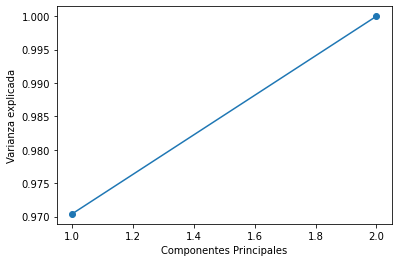

In [ ]:
list_x = list(range(1, len(explained_variance)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, explained_variance.cumsum(), '-o')
plt.title('Varianza explicada vs Componentes Principales')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

Viendo el grafico notamos que ya con 1 componente principal, tenemos mas de un 95% de varianza explicada. Por lo que con esta cantidad podriamos visualizar la misma informacion de los datos. 

In [ ]:
room_bedroom_pca = PCA(n_components=1)
room_bedroom_pca_transform_train = room_bedroom_pca.fit_transform(x_pca_train_rooms_bedrooms)
room_bedroom_pca_transform_train

array([[-0.88020103],
       [-0.88020103],
       [-1.38192557],
       ...,
       [ 0.21680951],
       [-0.88020103],
       [-0.88020103]])

Aplicamos lo mismo para surface_total y surface_covered:

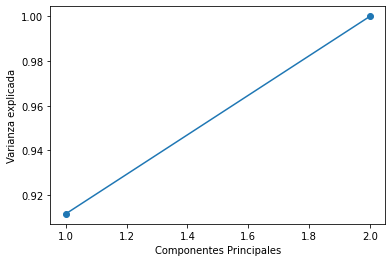

In [ ]:
columns = ['surface_covered', 'surface_total']

x_pca_train_surface = train.loc[:, columns].values
scaler_pca_surface = StandardScaler().fit(x_pca_train_surface)
x_pca_train_surface = scaler_pca_surface.transform(x_pca_train_surface)

pca = PCA(n_components=2)
x_transformed = pca.fit_transform(x_pca_train_surface)

explained_variance = pca.explained_variance_ratio_

list_x = list(range(1, len(explained_variance)+1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, explained_variance.cumsum(), '-o')
plt.title('Varianza explicada vs Componentes Principales')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

In [ ]:
surface_pca = PCA(n_components=1, random_state=701)
surface_pca_transform_train=surface_pca.fit_transform(x_pca_train_surface)
surface_pca_transform_train

array([[-0.5465935 ],
       [-0.80998179],
       [-1.02662466],
       ...,
       [ 0.08705332],
       [-0.39275134],
       [-0.36547806]])

Aplicamos lo mismo para el dataset de test, usando el modelo de pca entrenado con los datos de train:

In [ ]:
columns = ['rooms', 'bedrooms']

x_pca_test_rooms_bedrooms = test.loc[:, columns].values
x_pca_test_rooms_bedrooms = scaler_pca_rooms_bedrooms.transform(x_pca_test_rooms_bedrooms)
room_bedroom_pca_transform_test = room_bedroom_pca.transform(x_pca_test_rooms_bedrooms)

room_bedroom_pca_transform_test

array([[-1.97721156],
       [-0.88020103],
       [ 6.11002527],
       ...,
       [-0.88020103],
       [ 0.21680951],
       [ 1.31382004]])

In [ ]:
columns = ['surface_covered', 'surface_total']

x_pca_test_surface = test.loc[:, columns].values
x_pca_test_surface = scaler_pca_surface.transform(x_pca_test_surface)
surface_pca_transform_test = surface_pca.transform(x_pca_test_surface)

surface_pca_transform_test

array([[-0.85695371],
       [ 0.34270189],
       [ 7.14147971],
       ...,
       [-0.67657922],
       [-0.13203893],
       [ 1.91016665]])

Generamos los nuevos datasets (train y test):

In [ ]:
train_reduced = train.drop(['rooms', 'bedrooms', 'surface_covered'], axis='columns')
train_reduced['pc_room_bedroom'] = room_bedroom_pca_transform_train
train_reduced['pc_surface'] = surface_pca_transform_train

train_reduced.reset_index(drop=True, inplace=True)

train_reduced

latitud   longitud  neighborhood          type  surface_total  \
0     -34.601807 -58.469965      Paternal  Departamento           53.0   
1     -34.580088 -58.424965       Palermo  Departamento           35.0   
2     -34.551481 -58.452358      Belgrano  Departamento           25.0   
3     -34.632290 -58.464844        Flores  Departamento           75.0   
4     -34.549279 -58.463074         Nuñez  Departamento           46.0   
...          ...        ...           ...           ...            ...   
63842 -34.631023 -58.370512      Barracas  Departamento           36.0   
63843 -34.557490 -58.463914      Belgrano  Departamento           75.0   
63844 -34.628714 -58.413872         Boedo  Departamento          100.0   
63845 -34.587318 -58.452157     Chacarita  Departamento           61.0   
63846 -34.597385 -58.426269  Villa Crespo  Departamento           69.0   

          price  pc_room_bedroom  pc_surface  
0       80000.0        -0.880201   -0.546594  
1       79900.0        -0.880201   -0.809982  
2       69000.0        -1.381926   -1.026625  
3      150000.0         1.815545   -0.138132  
4       85000.0        -0.880201   -0.742056  
...         ...              ...         ...  
63842   70000.0        -1.977212   -0.832130  
63843  158000.0         0.216810   -0.138132  
63844  175000.0         0.216810    0.087053  
63845  122000.0        -0.880201   -0.392751  
63846  178000.0        -0.880201   -0.365478  

[63847 rows x 8 columns]

In [ ]:
test_reduced = test.drop(['rooms', 'bedrooms', 'surface_covered'], axis='columns')
test_reduced['pc_room_bedroom'] = room_bedroom_pca_transform_test
test_reduced['pc_surface'] = surface_pca_transform_test

test_reduced.reset_index(drop=True, inplace=True)

test_reduced

latitud   longitud      neighborhood          type  surface_total  \
0     -34.598679 -58.499717  Villa del Parque  Departamento           38.0   
1     -34.574987 -58.420611           Palermo  Departamento          150.0   
2     -34.581524 -58.403588           Palermo  Departamento          520.0   
3     -34.586527 -58.398279           Palermo  Departamento           43.0   
4     -34.577647 -58.406064           Palermo  Departamento          130.0   
...          ...        ...               ...           ...            ...   
17058 -34.618986 -58.461856            Flores  Departamento           76.0   
17059 -34.572933 -58.481700     Villa Urquiza  Departamento           46.0   
17060 -34.587750 -58.406649      Barrio Norte  Departamento           47.0   
17061 -34.621437 -58.399588     San Cristobal  Departamento           80.0   
17062 -34.571517 -58.481177     Villa Urquiza  Departamento          281.0   

           price  pc_room_bedroom  pc_surface  
0        85000.0        -1.977212   -0.856954  
1       520000.0        -0.880201    0.342702  
2      3300000.0         6.110025    7.141480  
3        87000.0        -0.880201   -0.695084  
4       690000.0         1.313820    0.668829  
...          ...              ...         ...  
17058   152000.0         0.216810   -0.228432  
17059   109000.0        -0.880201   -0.673903  
17060   194000.0        -0.880201   -0.676579  
17061   142000.0         0.216810   -0.132039  
17062   590000.0         1.313820    1.910167  

[17063 rows x 8 columns]

In [ ]:
train_reduced.head()

latitud   longitud neighborhood          type  surface_total     price  \
0 -34.601807 -58.469965     Paternal  Departamento           53.0   80000.0   
1 -34.580088 -58.424965      Palermo  Departamento           35.0   79900.0   
2 -34.551481 -58.452358     Belgrano  Departamento           25.0   69000.0   
3 -34.632290 -58.464844       Flores  Departamento           75.0  150000.0   
4 -34.549279 -58.463074        Nuñez  Departamento           46.0   85000.0   

   pc_room_bedroom  pc_surface  
0        -0.880201   -0.546594  
1        -0.880201   -0.809982  
2        -1.381926   -1.026625  
3         1.815545   -0.138132  
4        -0.880201   -0.742056

# [2] ★ Agrupamiento

En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:

* Analizar la tendencia al clustering del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de Silhouette.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

Principalmente vamos a hacer un análisis general con todas las variables numéricas para ver los criterios de agrupamiento que podemos notar del algoritmo. Posterior a la visualización de los gráficos, dejaremos nuestra conclusión al respecto.

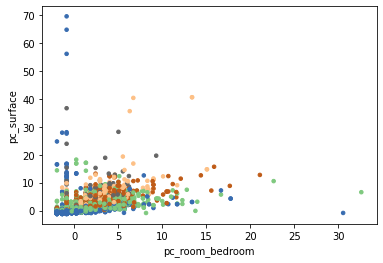

In [ ]:
train_price_pc_surface = train_reduced[["price", "pc_room_bedroom", "pc_surface", "latitud", "longitud"]]

kmeans = KMeans(5, random_state=398475)

labels = kmeans.fit_predict(train_price_pc_surface)

plt.scatter(train_price_pc_surface["pc_room_bedroom"], train_price_pc_surface["pc_surface"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("pc_room_bedroom")
plt.ylabel("pc_surface")
plt.show()

# train_reduced.head()

En este gráfico podemos ver que 

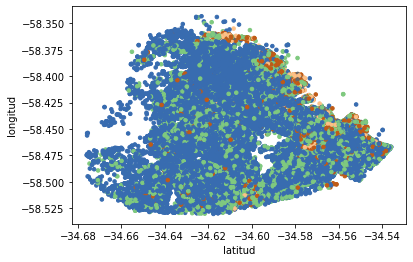

In [ ]:
plt.scatter(train_price_pc_surface["latitud"], train_price_pc_surface["longitud"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("latitud")
plt.ylabel("longitud")
plt.show()

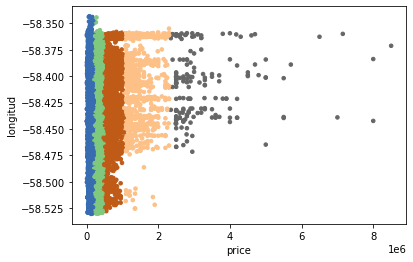

In [ ]:
plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["longitud"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("price")
plt.ylabel("longitud")
plt.show()

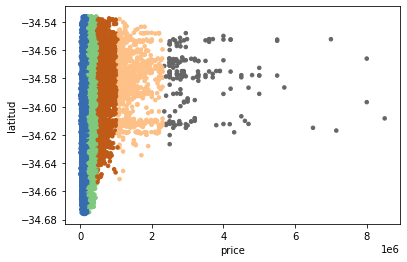

In [ ]:
plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["latitud"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("price")
plt.ylabel("latitud")
plt.show()

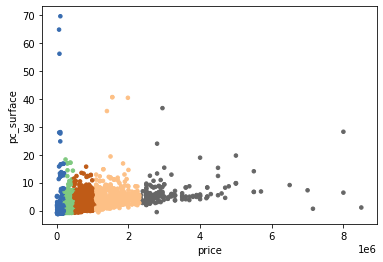

In [ ]:
plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["pc_surface"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("price")
plt.ylabel("pc_surface")
plt.show()

Viendo los gráficos que plotean pares de variables para analizar su clusterización, podemos notar claramente que el precio es la característica fundamental por la cual se separan los grupos.

Debido a esto vamos a analizar un caso más específico que se centra en esta característica.

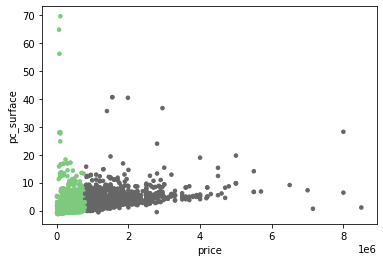

In [ ]:
train_price_pc_surface = train_reduced[['price', 'pc_surface']]

kmeans_2 = KMeans(2, random_state=11123)

labels = kmeans_2.fit_predict(train_price_pc_surface)

plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["pc_surface"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("price")
plt.ylabel("pc_surface")
plt.show()

Se puede ver en principio que el factor que separa ambos grupos es el precio.

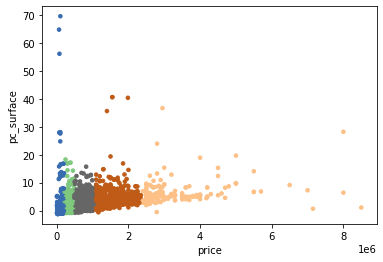

In [ ]:
train_price_pc_surface = train_reduced[['price', 'pc_surface']]

kmeans = KMeans(5, random_state=2456)

labels = kmeans.fit_predict(train_price_pc_surface)

plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["pc_surface"], c=labels,
            s=50, cmap="Accent",marker=".")
plt.title('Clusters')
plt.xlabel("price")
plt.ylabel("pc_surface")
plt.show()


### ● Análisis de tendencia al clustering

In [ ]:
hopkins(train_price_pc_surface,train_price_pc_surface.shape[0])

0.000558401405282244

Podemos ver que hopkins dió muy bajo, por lo cual interpretamos que los datos no están uniformemente distribuidos lo cual indica una alta tendencia al clustering.

En cambio si usamos la latitud y longitud para separar en clusters, notamos que la tendendia a clustering disminuye significativamente pero estos mismos podrian representar los distintos barrios:

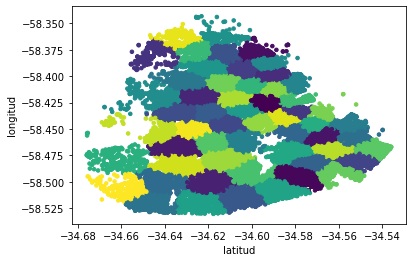

In [ ]:
train_lat_lng = train_reduced[['latitud', 'longitud']]

kmeans = KMeans(len(train_reduced.neighborhood.unique()), random_state=2456)

labels_lat_lng = kmeans.fit_predict(train_lat_lng)

plt.scatter(train_lat_lng["latitud"], train_lat_lng["longitud"], c=labels_lat_lng,
            s=50, cmap='viridis',marker=".")
plt.title('Clusters')
plt.xlabel("latitud")
plt.ylabel("longitud")
plt.show()

In [ ]:
hopkins(train_lat_lng,train_lat_lng.shape[0])

0.01863081235777601

### ● Estimación de cantidad de clusters

Vamos a seguir analizando el caso de las variables price y pc_surface.

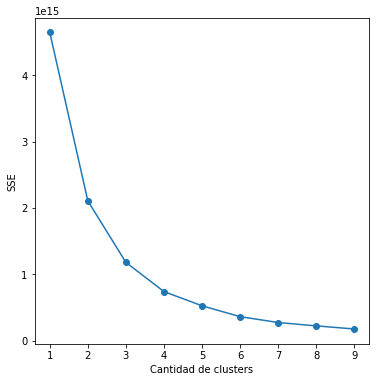

In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(train_price_pc_surface)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.title('Regla del codo')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

### ● Calidad de clusters con Silhouette

Analizamos silhouette score:

In [ ]:
list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(train_price_pc_surface)

    score = silhouette_score (train_price_pc_surface, preds)
    print ("For n_clusters = " + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters = 2 silhouette score is 0.8722819724294875
For n_clusters = 3 silhouette score is 0.7765233010100239
For n_clusters = 4 silhouette score is 0.7050599375726561
For n_clusters = 5 silhouette score is 0.6459910799895859


Una vez utilizada la regla del codo y el coeficiente de silhouette podemos estimar que la cantidad de clusters más apropiada es k=2.

### ● Análisis de características de clusters

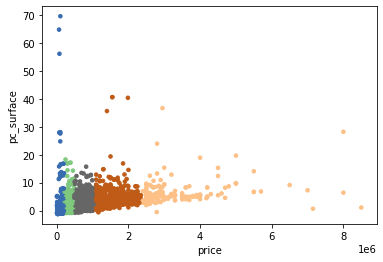

In [ ]:
plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["pc_surface"], c=labels,
            s=50, cmap='Accent',marker=".")
plt.title('Clusters')
plt.xlabel('price')
plt.ylabel('pc_surface')
plt.show()

Viendo el gráfico podemos observar que los clusters fueron formados a partir de la características del precio. Ya que si vemos el eje X (el cual pertenece al precio), ahí es donde se producen los cortes que forman estos clusters.

### ● Realizamos análisis para k=3 y graficamos en CABA

Repetimos el análisis pero ahora utilizando como hiperparámetro ***k=3***

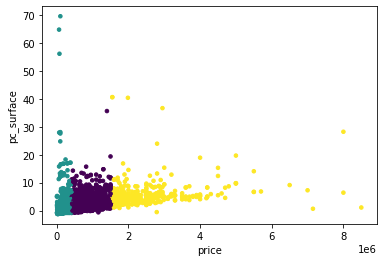

In [ ]:
train_price_pc_surface = train_reduced[['price', 'pc_surface']]

kmeans = KMeans(3, random_state=2456)

labels_k3 = kmeans.fit_predict(train_price_pc_surface)

plt.scatter(train_price_pc_surface["price"], train_price_pc_surface["pc_surface"], c=labels_k3,
            s=50, cmap='viridis',marker=".")
plt.title('Clusters k=3')
plt.xlabel('price')
plt.ylabel('pc_surface')
plt.show()

Analizamos la tendencia al clustering con k=3

In [ ]:
hopkins(train_price_pc_surface,train_price_pc_surface.shape[0])

0.0005534729690536905

El análisis de cantidad óptima de clusters es el mismo. 

Nuevamente en este caso los clusters fueron formados a partir de la característica precio, como vimos en el caso anterior.

Grafiquemos los clusters en CABA

In [ ]:
# poly = gp.read_file(r'./drive/MyDrive/datos/barrios.geojson')
poly = gp.read_file(r'barrios.geojson')

poly.head()

BARRIO  COMUNA    PERIMETRO          AREA  OBJETO  \
0         CHACARITA    15.0  7724.852955  3.115707e+06  BARRIO   
1          PATERNAL    15.0  7087.513295  2.229829e+06  BARRIO   
2      VILLA CRESPO    15.0  8131.857075  3.615978e+06  BARRIO   
3  VILLA DEL PARQUE    11.0  7705.389797  3.399596e+06  BARRIO   
4           ALMAGRO     5.0  8537.901368  4.050752e+06  BARRIO   

                                            geometry  
0  MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...  
1  MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...  
2  MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...  
3  MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...  
4  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...

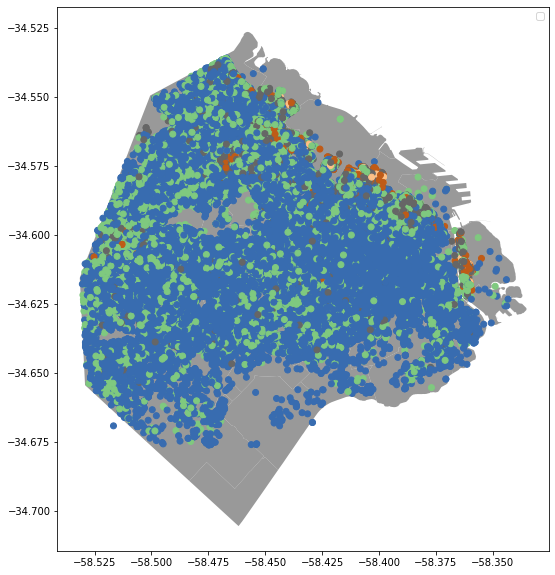

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
poly.plot(ax=ax,alpha=0.8, color="grey")
plt.title('Clusters sobre CABA')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.scatter(train_reduced.longitud,train_reduced.latitud,c=labels, cmap="Accent")
ax.legend()

A partir de este gráfico podemos observar que la variedad de precios es bastante amplia a lo largo de todo CABA. Aunque, notamos que los precios más altos predominan en la zona costera.

Ahora observemos para k=3

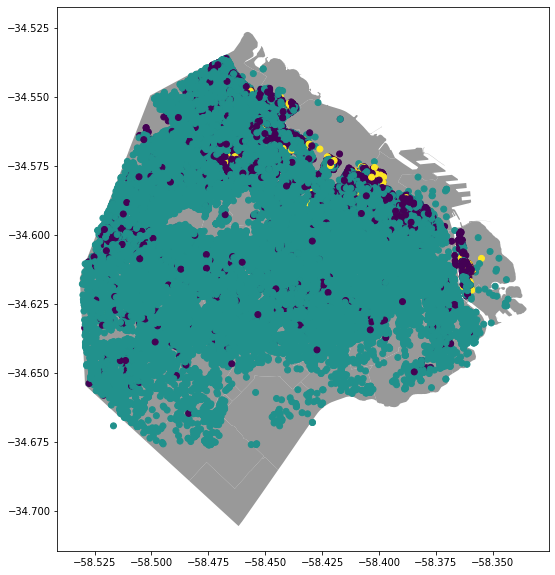

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
poly.plot(ax=ax,alpha=0.8, color="grey")
plt.title('Clusters sobre CABA')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.scatter(train_reduced.longitud,train_reduced.latitud,c=labels_k3, cmap="viridis")

Ahora observamos cada grupo por separado

In [ ]:
df_clustering = pd.DataFrame()

df_clustering["longitud"] = train_reduced.longitud
df_clustering["latitud"] = train_reduced.latitud
df_clustering["cluster"] = labels_k3

df_clustering_cluster1 = df_clustering[df_clustering["cluster"] == 0]
df_clustering_cluster2 = df_clustering[df_clustering["cluster"] == 1]
df_clustering_cluster3 = df_clustering[df_clustering["cluster"] == 2]

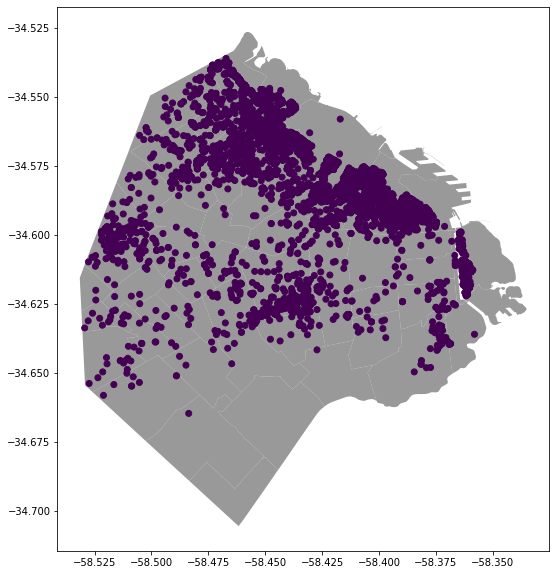

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
poly.plot(ax=ax,alpha=0.8, color="grey")
plt.title('Primer cluster sobre CABA')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.scatter(df_clustering_cluster1.longitud,df_clustering_cluster1.latitud,c=df_clustering_cluster1.cluster, cmap="viridis")

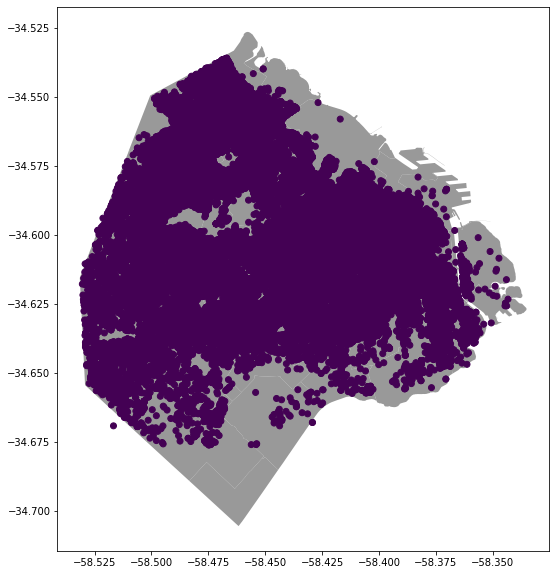

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
poly.plot(ax=ax,alpha=0.8, color="grey")
plt.title('Segundo cluster sobre CABA')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.scatter(df_clustering_cluster2.longitud,df_clustering_cluster2.latitud,c=df_clustering_cluster2.cluster, cmap="viridis")

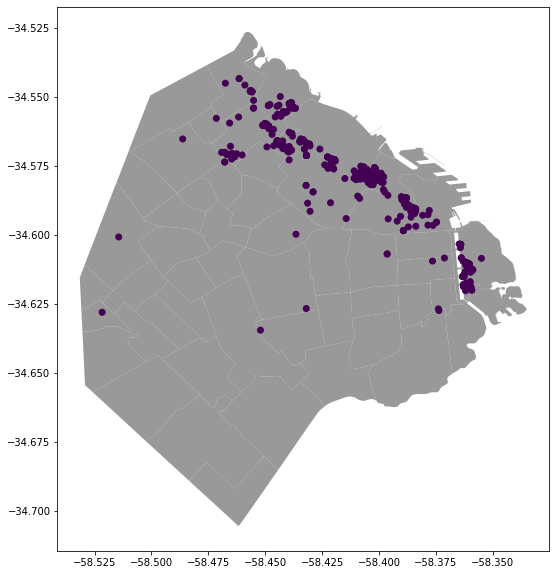

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
poly.plot(ax=ax,alpha=0.8, color="grey")
plt.title('Tercer cluster sobre CABA')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.scatter(df_clustering_cluster3.longitud,df_clustering_cluster3.latitud,c=df_clustering_cluster3.cluster, cmap="viridis")

Podemos observar que la relación de precios es similar al caso anterior, pero con menos clusters. Nuevamente, como sucedió con K=5, los precios más altos predominan en la zona costera como se puede ver en este último gráfico.

# [3] ★ Clasificación

##a) ◆ Construcción del Target

### ● Distribución por metro cuadrado

In [ ]:
train_reduced.head()

latitud   longitud neighborhood          type  surface_total     price  \
0 -34.601807 -58.469965     Paternal  Departamento           53.0   80000.0   
1 -34.580088 -58.424965      Palermo  Departamento           35.0   79900.0   
2 -34.551481 -58.452358     Belgrano  Departamento           25.0   69000.0   
3 -34.632290 -58.464844       Flores  Departamento           75.0  150000.0   
4 -34.549279 -58.463074        Nuñez  Departamento           46.0   85000.0   

   pc_room_bedroom  pc_surface  
0        -0.880201   -0.546594  
1        -0.880201   -0.809982  
2        -1.381926   -1.026625  
3         1.815545   -0.138132  
4        -0.880201   -0.742056

In [ ]:
train_reduced["pxm2"] = train_reduced.price/train_reduced.surface_total

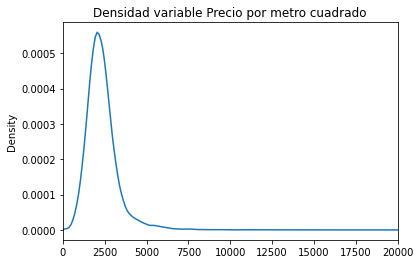

In [ ]:
train_reduced['pxm2'].plot.kde(title="Densidad variable Precio por metro cuadrado",xlabel="pxm2",ylabel="Densidad",xlim=(0,20000))

### ● Distribucion por metro cuadrado por propiedad

Text(0.5, 1.0, 'Densidad PH')

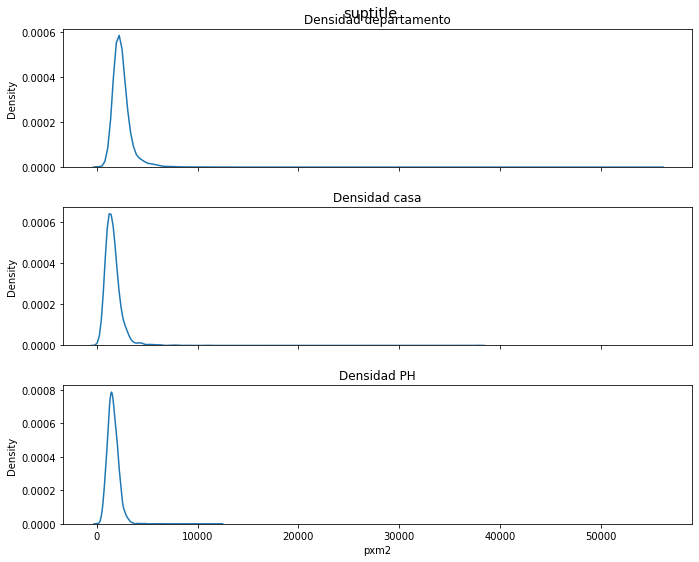

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,8))
fig.tight_layout(pad=3.0)
sns.kdeplot(ax=axes[0], data=train_reduced[train_reduced.type=="Departamento"]["pxm2"])
axes[0].set_title("Densidad departamento")
sns.kdeplot(ax=axes[1], data=train_reduced[train_reduced.type=="Casa"]["pxm2"])
axes[1].set_title("Densidad casa")
sns.kdeplot(ax=axes[2], data=train_reduced[train_reduced.type=="PH"]["pxm2"])
axes[2].set_title("Densidad PH")

In [ ]:
train_sorted = train_reduced.sort_values("pxm2")

### ● Distribuciones de precio por metro cuadrado segun criterios

Criterio #1


In [ ]:
first_train_sorted = train_sorted.copy()

In [ ]:
first_train_sorted["tipo_precio"]=""
third = ceil(len(first_train_sorted)/3)

In [ ]:
first_train_sorted.iloc[0:third]["tipo_precio"]="bajo"
first_train_sorted.iloc[third:third*2]["tipo_precio"]="medio"
first_train_sorted.iloc[third*2:]["tipo_precio"]="alto"

Text(0.5, 1.0, 'Densidad tipo_precio alto')

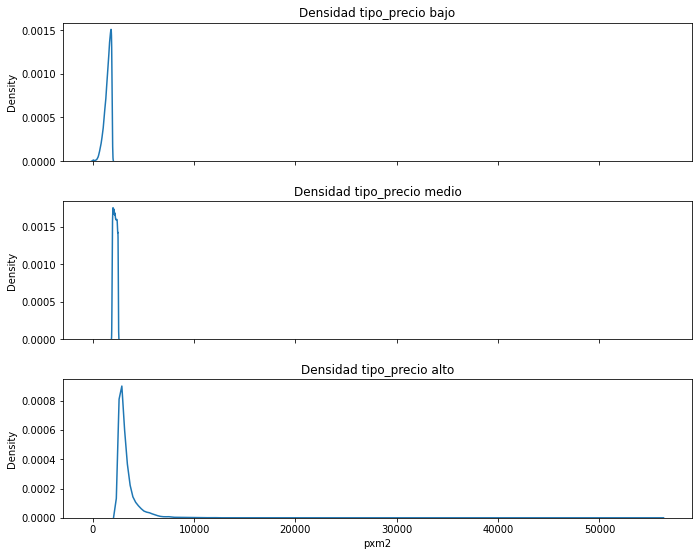

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,8))
fig.tight_layout(pad=3.0)
sns.kdeplot(ax=axes[0], data=first_train_sorted[first_train_sorted.tipo_precio=="bajo"]["pxm2"])
axes[0].set_title("Densidad tipo_precio bajo")
sns.kdeplot(ax=axes[1], data=first_train_sorted[first_train_sorted.tipo_precio=="medio"]["pxm2"])
axes[1].set_title("Densidad tipo_precio medio")
sns.kdeplot(ax=axes[2], data=first_train_sorted[first_train_sorted.tipo_precio=="alto"]["pxm2"])
axes[2].set_title("Densidad tipo_precio alto")

Criterio #2

In [ ]:
second_train_sorted = train_sorted.copy()

In [ ]:
second_train_sorted["tipo_precio"]=""
fourth = ceil(len(second_train_sorted)/4)

In [ ]:
second_train_sorted.iloc[0:fourth]["tipo_precio"]="bajo"
second_train_sorted.iloc[fourth:fourth*3]["tipo_precio"]="medio"
second_train_sorted.iloc[fourth*3:]["tipo_precio"]="alto"

Text(0.5, 1.0, 'Densidad tipo_precio alto')

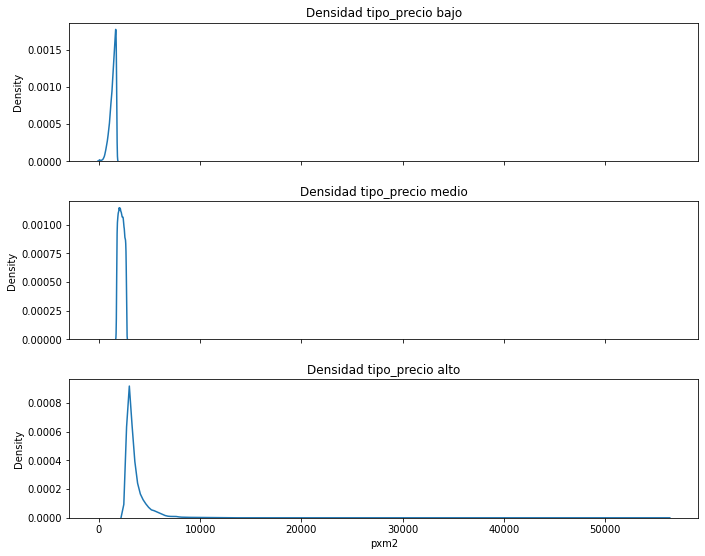

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,8))
fig.tight_layout(pad=3.0)
sns.kdeplot(ax=axes[0], data=second_train_sorted[second_train_sorted.tipo_precio=="bajo"]["pxm2"])
axes[0].set_title("Densidad tipo_precio bajo")
sns.kdeplot(ax=axes[1], data=second_train_sorted[second_train_sorted.tipo_precio=="medio"]["pxm2"])
axes[1].set_title("Densidad tipo_precio medio")
sns.kdeplot(ax=axes[2], data=second_train_sorted[second_train_sorted.tipo_precio=="alto"]["pxm2"])
axes[2].set_title("Densidad tipo_precio alto")

Criterio #3

In [ ]:
train_departamento_sorted = train_sorted.loc[train_sorted["type"]=="Departamento"].copy()
train_casa_sorted = train_sorted.loc[train_sorted["type"]=="Casa"].copy()
train_ph_sorted = train_sorted.loc[train_sorted["type"]=="PH"].copy()

In [ ]:
fourth_departamento = ceil(len(train_departamento_sorted)/4)
fourth_casa = ceil(len(train_casa_sorted)/4)
fourth_ph = ceil(len(train_ph_sorted)/4)

In [ ]:
train_departamento_sorted["tipo_precio"] = ""
train_casa_sorted["tipo_precio"] = ""
train_ph_sorted["tipo_precio"] = ""

In [ ]:
train_departamento_sorted.iloc[0:fourth_departamento]["tipo_precio"]="bajo"
train_departamento_sorted.iloc[fourth_departamento:fourth_departamento*3]["tipo_precio"]="medio"
train_departamento_sorted.iloc[fourth_departamento*3:]["tipo_precio"]="alto"

In [ ]:
train_casa_sorted.iloc[0:fourth_casa]["tipo_precio"]="bajo"
train_casa_sorted.iloc[fourth_casa:fourth_casa*3]["tipo_precio"]="medio"
train_casa_sorted.iloc[fourth_casa*3:]["tipo_precio"]="alto"

In [ ]:
train_ph_sorted.iloc[0:fourth_ph]["tipo_precio"]="bajo"
train_ph_sorted.iloc[fourth_ph:fourth_ph*3]["tipo_precio"]="medio"
train_ph_sorted.iloc[fourth_ph*3:]["tipo_precio"]="alto"

In [ ]:
third_train_sorted = pd.concat([train_ph_sorted,train_casa_sorted,train_departamento_sorted])

Text(0.5, 1.0, 'Densidad tipo_precio alto')

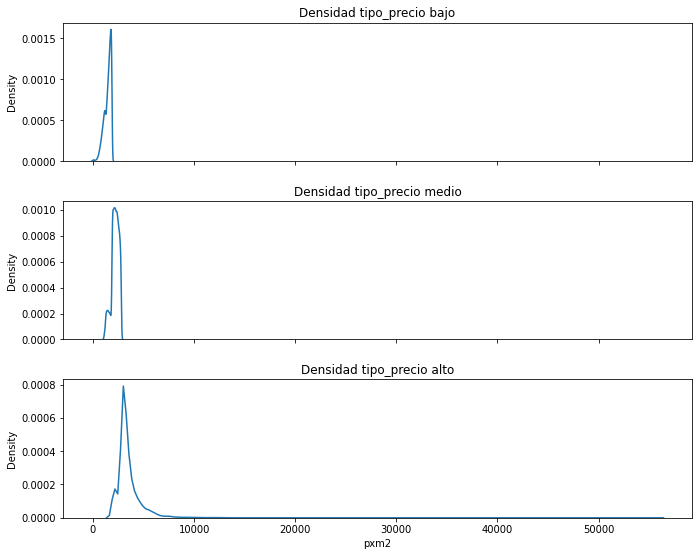

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,8))
fig.tight_layout(pad=3.0)
sns.kdeplot(ax=axes[0], data=third_train_sorted[third_train_sorted.tipo_precio=="bajo"]["pxm2"])
axes[0].set_title("Densidad tipo_precio bajo")
sns.kdeplot(ax=axes[1], data=third_train_sorted[third_train_sorted.tipo_precio=="medio"]["pxm2"])
axes[1].set_title("Densidad tipo_precio medio")
sns.kdeplot(ax=axes[2], data=third_train_sorted[third_train_sorted.tipo_precio=="alto"]["pxm2"])
axes[2].set_title("Densidad tipo_precio alto")

Revisando los primer criterio de division encontramos que se distribuye de forma tal que hay precios que no son muy distintos pero que tienen una categoria de tipo_precio distinto.
En caso del criterio 2, parece una version mejorada del criterio 1, pero elegimos el criterio 3 dado a que tiene en cuenta el tipo de propiedad para establecer el tipo de precio.

### ● Gráfico del criterio elegido sobre mapa de CABA

In [ ]:
third_train_sorted.loc[third_train_sorted["tipo_precio"]=="bajo", "tipo_precio_target"]= 0
third_train_sorted.loc[third_train_sorted["tipo_precio"]=="medio", "tipo_precio_target"]= 1
third_train_sorted.loc[third_train_sorted["tipo_precio"]=="alto", "tipo_precio_target"]= 2
                                          

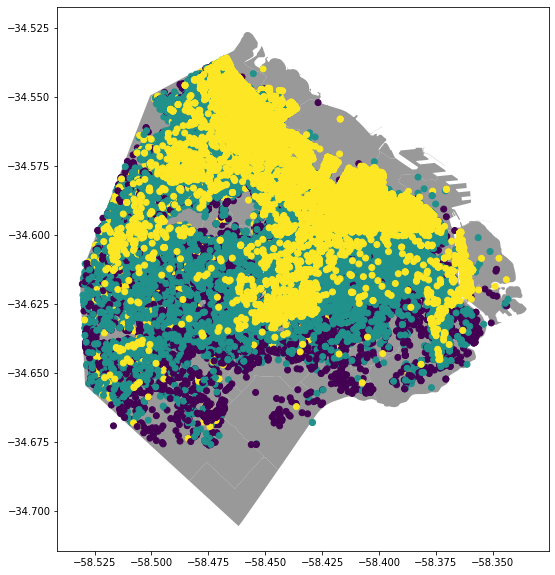

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
poly.plot(ax=ax,alpha=0.8, color="grey")
plt.title('Grupos sobre CABA')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.scatter(third_train_sorted.longitud,third_train_sorted.latitud,c=third_train_sorted.tipo_precio_target, cmap="viridis")

In [ ]:
labels_k3.min()

0

In [ ]:
test_reduced["pxm2"] = test_reduced.price/test_reduced.surface_total
test_sorted = test_reduced.sort_values("pxm2")
test_departamento_sorted = test_sorted.loc[test_sorted["type"]=="Departamento"].copy()
test_casa_sorted = test_sorted.loc[test_sorted["type"]=="Casa"].copy()
test_ph_sorted = test_sorted.loc[test_sorted["type"]=="PH"].copy()

In [ ]:
fourth_departamento = ceil(len(test_departamento_sorted)/4)
fourth_casa = ceil(len(test_casa_sorted)/4)
fourth_ph = ceil(len(test_ph_sorted)/4)

In [ ]:
test_departamento_sorted["tipo_precio"] = ""
test_casa_sorted["tipo_precio"] = ""
test_ph_sorted["tipo_precio"] = ""

In [ ]:
test_departamento_sorted.iloc[0:fourth_departamento]["tipo_precio"]="bajo"
test_departamento_sorted.iloc[fourth_departamento:fourth_departamento*3]["tipo_precio"]="medio"
test_departamento_sorted.iloc[fourth_departamento*3:]["tipo_precio"]="alto"

test_casa_sorted.iloc[0:fourth_casa]["tipo_precio"]="bajo"
test_casa_sorted.iloc[fourth_casa:fourth_casa*3]["tipo_precio"]="medio"
test_casa_sorted.iloc[fourth_casa*3:]["tipo_precio"]="alto"

test_ph_sorted.iloc[0:fourth_ph]["tipo_precio"]="bajo"
test_ph_sorted.iloc[fourth_ph:fourth_ph*3]["tipo_precio"]="medio"
test_ph_sorted.iloc[fourth_ph*3:]["tipo_precio"]="alto"

third_test_sorted = pd.concat([test_ph_sorted,test_casa_sorted,test_departamento_sorted])

## b) ◆ Entrenamiento y Predicción

### ● Feature Engineering

In [ ]:
train_fe = pd.get_dummies(third_train_sorted, columns=['type'], drop_first=True)
test_fe = pd.get_dummies(third_test_sorted, columns=['type'], drop_first=True)

In [ ]:
train_fe

latitud   longitud      neighborhood  surface_total      price  \
36176 -34.594247 -58.397759          Recoleta          482.0    11111.0   
44123 -34.647545 -58.497062         Mataderos          132.0    11111.0   
12542 -34.617067 -58.513585      Villa Devoto         1208.0   170000.0   
1369  -34.645004 -58.407015  Parque Patricios          164.0    47000.0   
34778 -34.640883 -58.362774              Boca          195.0    58000.0   
...          ...        ...               ...            ...        ...   
63248 -34.610576 -58.361591     Puerto Madero           90.0  1200000.0   
54061 -34.582825 -58.442826           Palermo           40.0   600000.0   
1351  -34.573416 -58.447945        Colegiales           53.0  1160600.0   
13627 -34.551243 -58.455105             Nuñez           56.0  2790000.0   
56707 -34.616918 -58.359927     Puerto Madero          128.0  7149999.0   

       pc_room_bedroom  pc_surface          pxm2 tipo_precio  \
36176         8.304046    5.227797     23.051867        bajo   
44123         1.815545    0.361660     84.174242        bajo   
12542         0.718534    8.007099    140.728477        bajo   
1369          1.313820    0.363656    286.585366        bajo   
34778         0.718534    1.098533    297.435897        bajo   
...                ...         ...           ...         ...   
63248        -0.880201    0.065132  13333.333333        alto   
54061        -1.381926   -0.726001  15000.000000        alto   
1351         -0.880201   -0.634218  21898.113208        alto   
13627        -1.381926   -0.544885  49821.428571        alto   
56707         0.216810    0.654709  55859.367188        alto   

       tipo_precio_target  type_Departamento  type_PH  
36176                 0.0                  0        1  
44123                 0.0                  0        1  
12542                 0.0                  0        1  
1369                  0.0                  0        1  
34778                 0.0                  0        1  
...                   ...                ...      ...  
63248                 2.0                  1        0  
54061                 2.0                  1        0  
1351                  2.0                  1        0  
13627                 2.0                  1        0  
56707                 2.0                  1        0  

[63847 rows x 12 columns]

In [ ]:
le = LabelEncoder()
train_fe['neighborhood_encoded'] = le.fit_transform(train_fe['neighborhood'].astype(str))
test_fe['neighborhood_encoded'] = le.transform(test_fe['neighborhood'].astype(str))
train_fe

latitud   longitud      neighborhood  surface_total      price  \
36176 -34.594247 -58.397759          Recoleta          482.0    11111.0   
44123 -34.647545 -58.497062         Mataderos          132.0    11111.0   
12542 -34.617067 -58.513585      Villa Devoto         1208.0   170000.0   
1369  -34.645004 -58.407015  Parque Patricios          164.0    47000.0   
34778 -34.640883 -58.362774              Boca          195.0    58000.0   
...          ...        ...               ...            ...        ...   
63248 -34.610576 -58.361591     Puerto Madero           90.0  1200000.0   
54061 -34.582825 -58.442826           Palermo           40.0   600000.0   
1351  -34.573416 -58.447945        Colegiales           53.0  1160600.0   
13627 -34.551243 -58.455105             Nuñez           56.0  2790000.0   
56707 -34.616918 -58.359927     Puerto Madero          128.0  7149999.0   

       pc_room_bedroom  pc_surface          pxm2 tipo_precio  \
36176         8.304046    5.227797     23.051867        bajo   
44123         1.815545    0.361660     84.174242        bajo   
12542         0.718534    8.007099    140.728477        bajo   
1369          1.313820    0.363656    286.585366        bajo   
34778         0.718534    1.098533    297.435897        bajo   
...                ...         ...           ...         ...   
63248        -0.880201    0.065132  13333.333333        alto   
54061        -1.381926   -0.726001  15000.000000        alto   
1351         -0.880201   -0.634218  21898.113208        alto   
13627        -1.381926   -0.544885  49821.428571        alto   
56707         0.216810    0.654709  55859.367188        alto   

       tipo_precio_target  type_Departamento  type_PH  neighborhood_encoded  
36176                 0.0                  0        1                    35  
44123                 0.0                  0        1                    21  
12542                 0.0                  0        1                    45  
1369                  0.0                  0        1                    31  
34778                 0.0                  0        1                     7  
...                   ...                ...      ...                   ...  
63248                 2.0                  1        0                    34  
54061                 2.0                  1        0                    26  
1351                  2.0                  1        0                    14  
13627                 2.0                  1        0                    24  
56707                 2.0                  1        0                    34  

[63847 rows x 13 columns]

In [ ]:
le_target = LabelEncoder()
train_fe['tipo_precio_encoded'] = le.fit_transform(train_fe['tipo_precio'].astype(str))
test_fe['tipo_precio_encoded'] = le.transform(test_fe['tipo_precio'].astype(str))

In [ ]:
y_train = train_fe["tipo_precio_encoded"].copy()
y_test = test_fe["tipo_precio_encoded"].copy()

In [ ]:
train_fe

latitud   longitud      neighborhood  surface_total      price  \
36176 -34.594247 -58.397759          Recoleta          482.0    11111.0   
44123 -34.647545 -58.497062         Mataderos          132.0    11111.0   
12542 -34.617067 -58.513585      Villa Devoto         1208.0   170000.0   
1369  -34.645004 -58.407015  Parque Patricios          164.0    47000.0   
34778 -34.640883 -58.362774              Boca          195.0    58000.0   
...          ...        ...               ...            ...        ...   
63248 -34.610576 -58.361591     Puerto Madero           90.0  1200000.0   
54061 -34.582825 -58.442826           Palermo           40.0   600000.0   
1351  -34.573416 -58.447945        Colegiales           53.0  1160600.0   
13627 -34.551243 -58.455105             Nuñez           56.0  2790000.0   
56707 -34.616918 -58.359927     Puerto Madero          128.0  7149999.0   

       pc_room_bedroom  pc_surface          pxm2 tipo_precio  \
36176         8.304046    5.227797     23.051867        bajo   
44123         1.815545    0.361660     84.174242        bajo   
12542         0.718534    8.007099    140.728477        bajo   
1369          1.313820    0.363656    286.585366        bajo   
34778         0.718534    1.098533    297.435897        bajo   
...                ...         ...           ...         ...   
63248        -0.880201    0.065132  13333.333333        alto   
54061        -1.381926   -0.726001  15000.000000        alto   
1351         -0.880201   -0.634218  21898.113208        alto   
13627        -1.381926   -0.544885  49821.428571        alto   
56707         0.216810    0.654709  55859.367188        alto   

       tipo_precio_target  type_Departamento  type_PH  neighborhood_encoded  \
36176                 0.0                  0        1                    35   
44123                 0.0                  0        1                    21   
12542                 0.0                  0        1                    45   
1369                  0.0                  0        1                    31   
34778                 0.0                  0        1                     7   
...                   ...                ...      ...                   ...   
63248                 2.0                  1        0                    34   
54061                 2.0                  1        0                    26   
1351                  2.0                  1        0                    14   
13627                 2.0                  1        0                    24   
56707                 2.0                  1        0                    34   

       tipo_precio_encoded  
36176                    1  
44123                    1  
12542                    1  
1369                     1  
34778                    1  
...                    ...  
63248                    0  
54061                    0  
1351                     0  
13627                    0  
56707                    0  

[63847 rows x 14 columns]

In [ ]:
x_train = train_fe.drop(columns=["neighborhood", "surface_total", "price", "pxm2", "tipo_precio", "tipo_precio_target", "tipo_precio_encoded"])
x_test = test_fe.drop(columns=["neighborhood", "surface_total", "price", "tipo_precio", "pxm2", "tipo_precio_encoded"])

### ● Modelo 1: Árbol de decisión

Utilizaremos 5 folds y la métrica **f1-score** debido a que esta combina a las métricas **recall** y **precision**, las cuales son muy importantes en clasificación.

In [ ]:
n=10

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,15))
                }
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 
scorer_fn = make_scorer(f1_score, average='micro')
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=1459830637) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);


In [ ]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.0}
0.5694879269383633


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,x_train.columns)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))


type_PH: 0.007850532835112585
pc_room_bedroom: 0.017810884226368777
type_Departamento: 0.04208636132469773
neighborhood_encoded: 0.07317072150261432
pc_surface: 0.1266238691250247
longitud: 0.2901609043368407
latitud: 0.4422967266493412


Podemos ver que los atributos con más importancia son la latitud y longitud, veremos luego cómo eso afecta a la creación del árbol.

In [ ]:
train.head()

latitud   longitud neighborhood          type  rooms  bedrooms  \
0 -34.601807 -58.469965     Paternal  Departamento      2         1   
1 -34.580088 -58.424965      Palermo  Departamento      2         1   
2 -34.551481 -58.452358     Belgrano  Departamento      1         1   
3 -34.632290 -58.464844       Flores  Departamento      5         3   
4 -34.549279 -58.463074        Nuñez  Departamento      2         1   

   surface_total  surface_covered     price         pxm2  
0           53.0             49.0   80000.0  1509.433962  
1           35.0             35.0   79900.0  2282.857143  
2           25.0             20.0   69000.0  2760.000000  
3           75.0             75.0  150000.0  2000.000000  
4           46.0             34.0   85000.0  1847.826087

Tomamos el arbol de decision con mejor performance

In [ ]:
tree_model = randomcv.best_estimator_

#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [ ]:
filename = 'decssion_tree_classifier_reduced_model.sav'
joblib.dump(model, filename)


['decssion_tree_classifier_reduced_model.sav']

Visualizamos dicho árbol ***(Los primeros tres niveles)***

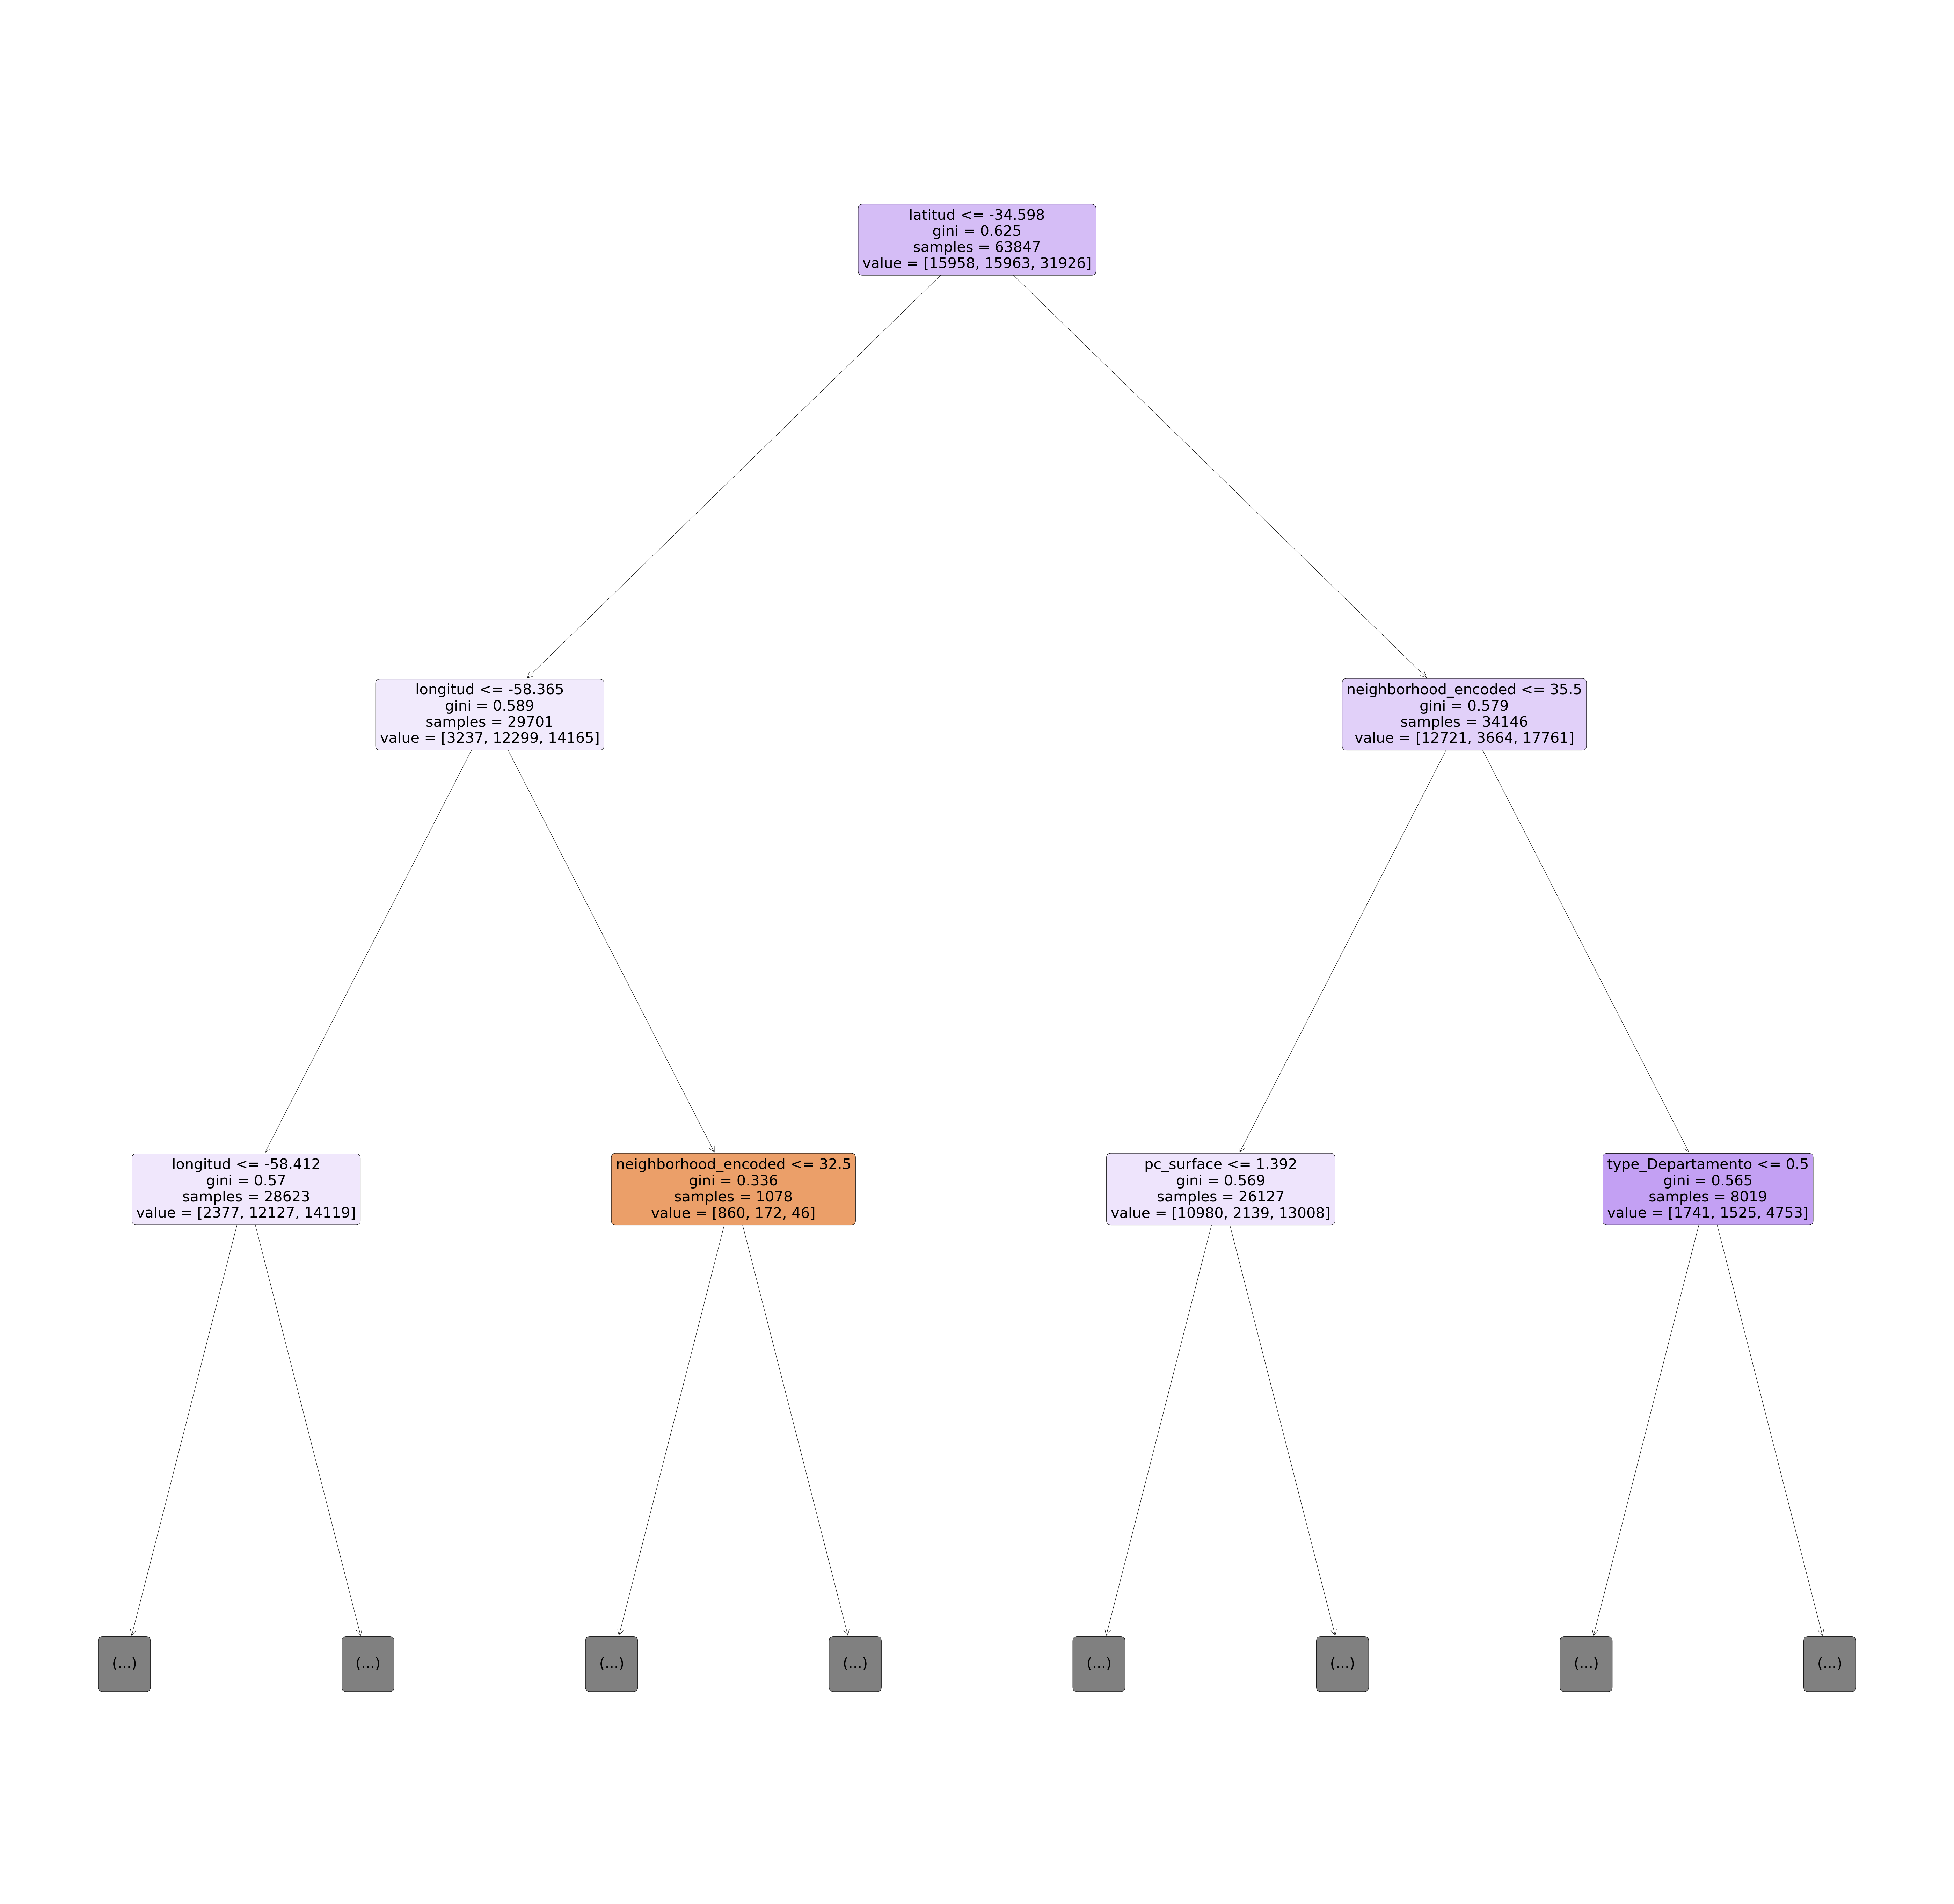

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model,
                                 feature_names=x_train.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 max_depth=2)
plt.show(tree_plot_completo)

Se puede ver que las reglas de decisión para formar los nodos involucran a las variables, latitud, longitud en su mayoría, ya que como vimos previamente son las que tienen una mayor importancia como atributos.

In [ ]:
y_pred = model.predict(x_test)

#Valores Predichos
y_pred

array([1, 1, 1, ..., 0, 0, 0])

Visualizamos la matriz de confusión y las métricas asociadas al modelo

Text(33.0, 0.5, 'True')

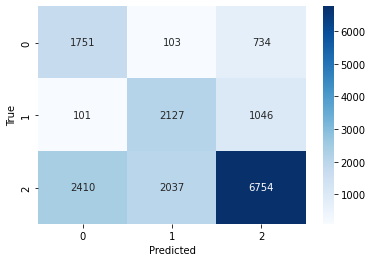

In [ ]:
#Matriz de Confusión
cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='weighted')
f1=f1_score(y_test,y_pred, average='weighted')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.6231026197034519
Recall: 0.6231026197034519
f1 score: 0.6111031230150018


Analizamos la performance con los datos de entrenamiento

In [ ]:
y_pred_dt_train = model.predict(x_train)
y_pred_dt_train

array([2, 2, 2, ..., 2, 2, 0])

Text(33.0, 0.5, 'True')

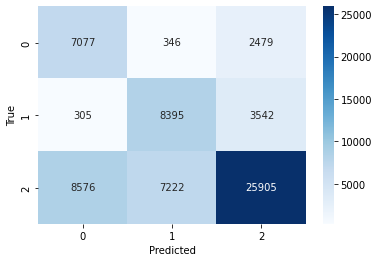

In [ ]:
cm = confusion_matrix(y_pred_dt_train, y_train)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_train,y_pred_dt_train)
recall=recall_score(y_train,y_pred_dt_train, average='weighted')
f1=f1_score(y_train,y_pred_dt_train, average='weighted')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.6480649051639075
Recall: 0.6480649051639075
f1 score: 0.6374926172265868


Podemos observar que las metricas dieron un poco mejor pero que esta mejora no fue excesiva. Esto es bueno ya que nos permite concluir que el modelo no overfitteo a los datos de entrenamiento. 

Preparamos el dataset no reducido para entrenar un modelo

In [ ]:
train["pxm2"]=train.price/train.surface_total
train_sorted=train.sort_values("pxm2")
train_sorted["tipo_precio"]=""
train_departamento_sorted = train_sorted.loc[train_sorted["type"]=="Departamento"].copy()
train_casa_sorted = train_sorted.loc[train_sorted["type"]=="Casa"].copy()
train_ph_sorted = train_sorted.loc[train_sorted["type"]=="PH"].copy()

In [ ]:
fourth_departamento = ceil(len(train_departamento_sorted)/4)
fourth_casa = ceil(len(train_casa_sorted)/4)
fourth_ph = ceil(len(train_ph_sorted)/4)

In [ ]:
train_departamento_sorted["tipo_precio"] = ""
train_casa_sorted["tipo_precio"] = ""
train_ph_sorted["tipo_precio"] = ""

In [ ]:
train_departamento_sorted.iloc[0:fourth_departamento]["tipo_precio"]="bajo"
train_departamento_sorted.iloc[fourth_departamento:fourth_departamento*3]["tipo_precio"]="medio"
train_departamento_sorted.iloc[fourth_departamento*3:]["tipo_precio"]="alto"

train_casa_sorted.iloc[0:fourth_casa]["tipo_precio"]="bajo"
train_casa_sorted.iloc[fourth_casa:fourth_casa*3]["tipo_precio"]="medio"
train_casa_sorted.iloc[fourth_casa*3:]["tipo_precio"]="alto"

train_ph_sorted.iloc[0:fourth_ph]["tipo_precio"]="bajo"
train_ph_sorted.iloc[fourth_ph:fourth_ph*3]["tipo_precio"]="medio"
train_ph_sorted.iloc[fourth_ph*3:]["tipo_precio"]="alto"

train_sorted = pd.concat([train_ph_sorted,train_casa_sorted,train_departamento_sorted])

In [ ]:
test.head()

latitud   longitud      neighborhood          type  rooms  bedrooms  \
0 -34.598679 -58.499717  Villa del Parque  Departamento      1         0   
1 -34.574987 -58.420611           Palermo  Departamento      2         1   
3 -34.581524 -58.403588           Palermo  Departamento     10         6   
5 -34.586527 -58.398279           Palermo  Departamento      2         1   
6 -34.577647 -58.406064           Palermo  Departamento      4         3   

   surface_total  surface_covered      price  
0           38.0             28.0    85000.0  
1          150.0             70.0   520000.0  
3          520.0            500.0  3300000.0  
5           43.0             41.0    87000.0  
6          130.0            118.0   690000.0

In [ ]:
test["pxm2"]=test.price/test.surface_total
test_sorted=test.sort_values("pxm2")
test_sorted["tipo_precio"]=""
test_departamento_sorted = test_sorted.loc[test_sorted["type"]=="Departamento"].copy()
test_casa_sorted = test_sorted.loc[test_sorted["type"]=="Casa"].copy()
test_ph_sorted = test_sorted.loc[test_sorted["type"]=="PH"].copy()

In [ ]:
fourth_departamento = ceil(len(test_departamento_sorted)/4)
fourth_casa = ceil(len(test_casa_sorted)/4)
fourth_ph = ceil(len(test_ph_sorted)/4)

In [ ]:
test_departamento_sorted["tipo_precio"] = ""
test_casa_sorted["tipo_precio"] = ""
test_ph_sorted["tipo_precio"] = ""

In [ ]:
test_departamento_sorted.iloc[0:fourth_departamento]["tipo_precio"]="bajo"
test_departamento_sorted.iloc[fourth_departamento:fourth_departamento*3]["tipo_precio"]="medio"
test_departamento_sorted.iloc[fourth_departamento*3:]["tipo_precio"]="alto"

test_casa_sorted.iloc[0:fourth_casa]["tipo_precio"]="bajo"
test_casa_sorted.iloc[fourth_casa:fourth_casa*3]["tipo_precio"]="medio"
test_casa_sorted.iloc[fourth_casa*3:]["tipo_precio"]="alto"

test_ph_sorted.iloc[0:fourth_ph]["tipo_precio"]="bajo"
test_ph_sorted.iloc[fourth_ph:fourth_ph*3]["tipo_precio"]="medio"
test_ph_sorted.iloc[fourth_ph*3:]["tipo_precio"]="alto"

test_sorted = pd.concat([test_ph_sorted,test_casa_sorted,test_departamento_sorted])

In [ ]:
train_fe_not_reduced = pd.get_dummies(train_sorted, columns=['type'], drop_first=True)
test_fe_not_reduced = pd.get_dummies(test_sorted, columns=['type'], drop_first=True)

In [ ]:
le = LabelEncoder()
train_fe_not_reduced['neighborhood_encoded'] = le.fit_transform(train_fe_not_reduced['neighborhood'].astype(str))
test_fe_not_reduced['neighborhood_encoded'] = le.transform(test_fe_not_reduced['neighborhood'].astype(str))

le_target = LabelEncoder()
train_fe_not_reduced['tipo_precio_encoded'] = le.fit_transform(train_fe_not_reduced['tipo_precio'].astype(str))
test_fe_not_reduced['tipo_precio_encoded'] = le.transform(test_fe_not_reduced['tipo_precio'].astype(str))

In [ ]:
train_fe_not_reduced

latitud   longitud      neighborhood  rooms  bedrooms  surface_total  \
36678 -34.594247 -58.397759          Recoleta     12         8          482.0   
44727 -34.647545 -58.497062         Mataderos      5         3          132.0   
12716 -34.617067 -58.513585      Villa Devoto      4         2         1208.0   
1387  -34.645004 -58.407015  Parque Patricios      4         3          164.0   
35262 -34.640883 -58.362774              Boca      4         2          195.0   
...          ...        ...               ...    ...       ...            ...   
64112 -34.610576 -58.361591     Puerto Madero      2         1           90.0   
54808 -34.582825 -58.442826           Palermo      1         1           40.0   
1369  -34.573416 -58.447945        Colegiales      2         1           53.0   
13817 -34.551243 -58.455105             Nuñez      1         1           56.0   
57483 -34.616918 -58.359927     Puerto Madero      3         2          128.0   

       surface_covered      price          pxm2 tipo_precio  \
36678            331.0    11111.0     23.051867        bajo   
44727             85.0    11111.0     84.174242        bajo   
12716             90.0   170000.0    140.728477        bajo   
1387              62.0    47000.0    286.585366        bajo   
35262            115.0    58000.0    297.435897        bajo   
...                ...        ...           ...         ...   
64112             85.0  1200000.0  13333.333333        alto   
54808             40.0   600000.0  15000.000000        alto   
1369              40.0  1160600.0  21898.113208        alto   
13817             47.0  2790000.0  49821.428571        alto   
57483            118.0  7149999.0  55859.367188        alto   

       type_Departamento  type_PH  neighborhood_encoded  tipo_precio_encoded  
36678                  0        1                    35                    1  
44727                  0        1                    21                    1  
12716                  0        1                    45                    1  
1387                   0        1                    31                    1  
35262                  0        1                     7                    1  
...                  ...      ...                   ...                  ...  
64112                  1        0                    34                    0  
54808                  1        0                    26                    0  
1369                   1        0                    14                    0  
13817                  1        0                    24                    0  
57483                  1        0                    34                    0  

[63847 rows x 14 columns]

In [ ]:
y_train_not_reduced = train_fe_not_reduced["tipo_precio_encoded"].copy()
y_test_not_reduced = test_fe_not_reduced["tipo_precio_encoded"].copy()

In [ ]:
x_train_not_reduced = train_fe_not_reduced.drop(columns=["neighborhood", "surface_total", "price", "pxm2", "tipo_precio", "tipo_precio_encoded"])
x_test_not_reduced = test_fe_not_reduced.drop(columns=["neighborhood", "surface_total", "price", "tipo_precio", "pxm2", "tipo_precio_encoded"])

Realizamos optimización de hiperparámetros con el dataset no reducido.

In [ ]:
#Kfold
kfoldcv_nr = StratifiedKFold(n_splits=folds)
#Clasificador
base_tree_nr = DecisionTreeClassifier() 
scorer_fn_nr = make_scorer(f1_score, average='micro')
randomcv_nr = RandomizedSearchCV(estimator=base_tree_nr,
                              param_distributions = params_grid,
                              scoring=scorer_fn_nr,
                              cv=kfoldcv_nr,
                              n_iter=n, 
                              random_state=3955345) 
#Busco los hiperparamtros que optimizan F1 Score
randomcv_nr.fit(x_train_not_reduced,y_train_not_reduced);

Vemos cuáles son los mejores parámetros y el score del mejor clasificador.

In [ ]:
#Mejores hiperparametros del arbol
print(randomcv_nr.best_params_)
#Mejor métrica
print(randomcv_nr.best_score_)

{'max_depth': 9, 'criterion': 'gini', 'ccp_alpha': 0.0}
0.5770215097951903


In [ ]:
#Atributos considerados y su importancia
best_tree_nr = randomcv_nr.best_estimator_
feat_imps_nr = best_tree_nr.feature_importances_

for feat_imp_nr,feat in sorted(zip(feat_imps_nr,x_train_not_reduced.columns)):
  if feat_imp_nr>0:
    print('{}: {}'.format(feat,feat_imp_nr))


type_PH: 0.004670629678348671
bedrooms: 0.004900934723281992
rooms: 0.017836673656923575
type_Departamento: 0.045476187519910234
neighborhood_encoded: 0.08291951509769323
surface_covered: 0.08989379395774004
longitud: 0.29164422480737734
latitud: 0.46265804055872506


Volvemos a obtener una importancia de atributos similar a la anterior.

In [ ]:
tree_model_nr = randomcv_nr.best_estimator_

#Entrenamos el modelo
model_nr = tree_model_nr.fit(X = x_train_not_reduced, y = y_train_not_reduced)

In [ ]:
filename = 'decission_tree_classifier_not_reduced.sav'
joblib.dump(model_nr, filename)


['decission_tree_classifier_not_reduced.sav']

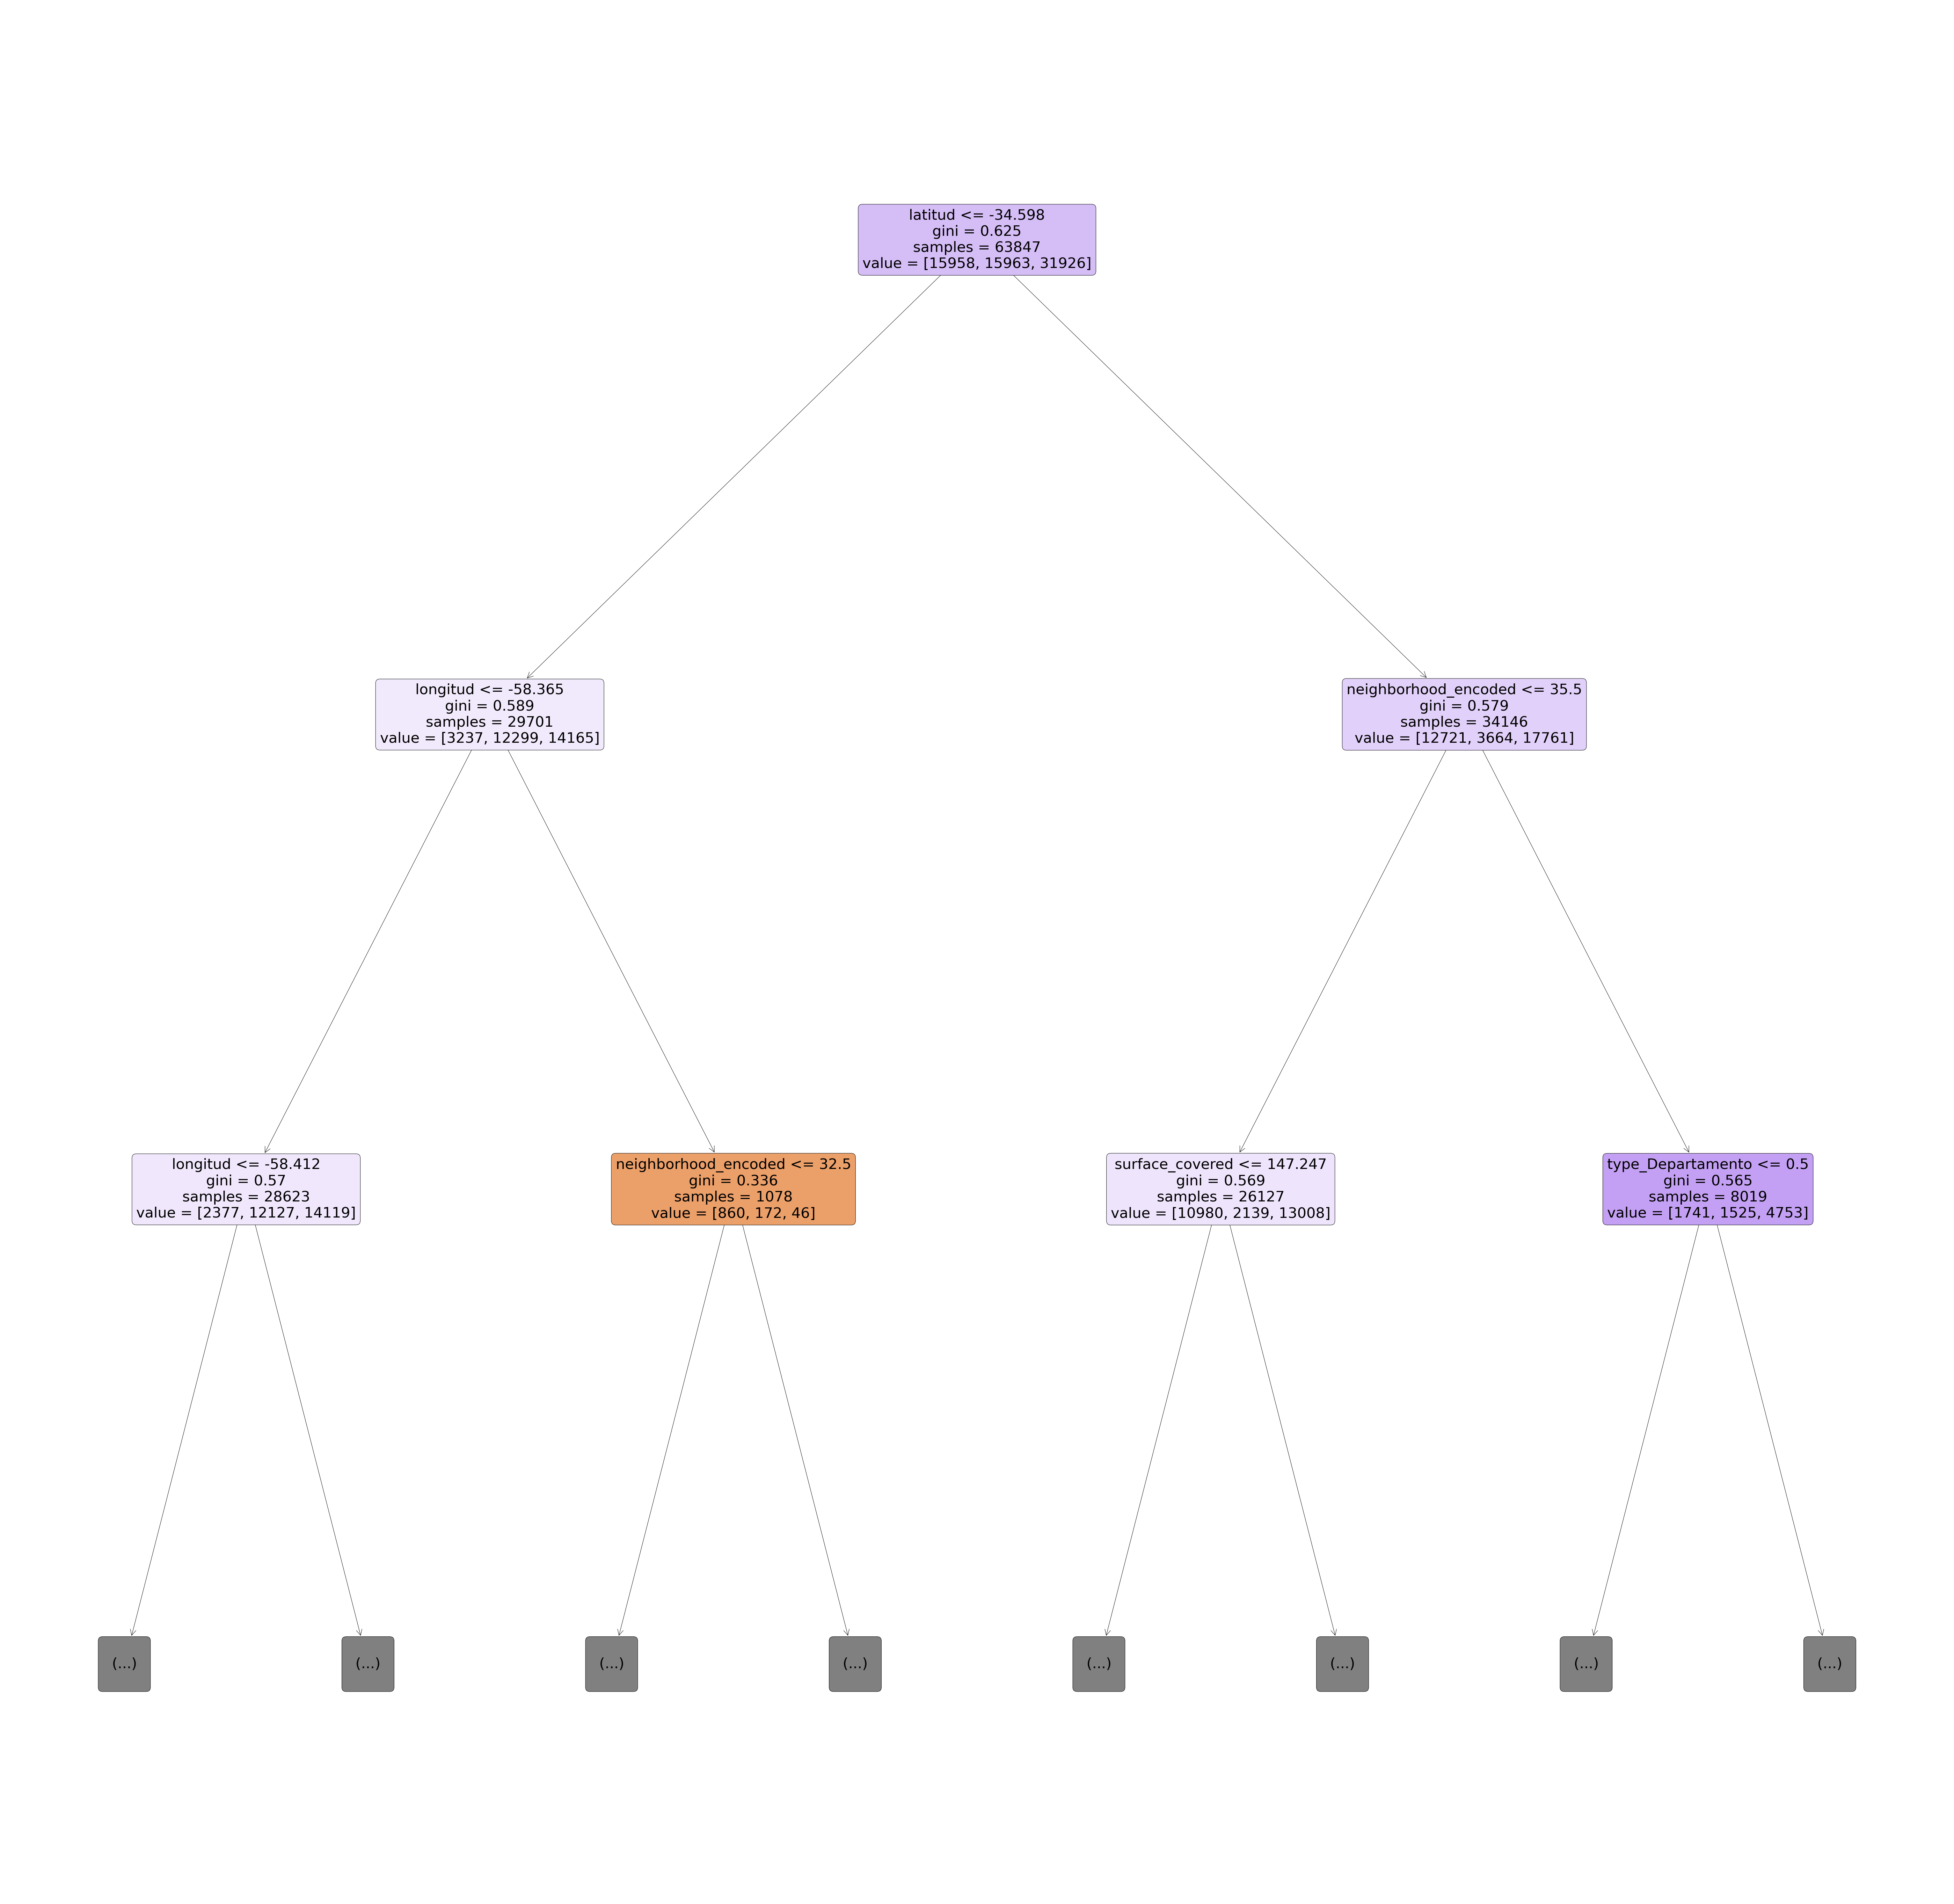

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model_nr,
                                 feature_names=x_train_not_reduced.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 max_depth=2)
plt.show(tree_plot_completo)

In [ ]:
y_pred = model_nr.predict(x_test_not_reduced)

#Valores Predichos
y_pred

array([1, 1, 2, ..., 0, 0, 0])

Text(33.0, 0.5, 'True')

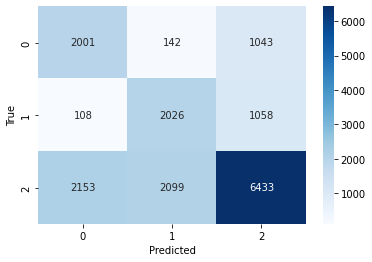

In [ ]:
cm = confusion_matrix(y_pred, y_test_not_reduced)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test_not_reduced,y_pred)
recall=recall_score(y_test_not_reduced,y_pred, average='weighted')
f1=f1_score(y_test_not_reduced,y_pred, average='weighted')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.6130223290159995
Recall: 0.6130223290159995
f1 score: 0.6048810931189011


Podemos observar que al entrenar el modelo con el dataset no reducido, obtuvimos métricas un poco más bajas que con el otro dataset. Por lo que podemos concluir que la reducción de dimensionalidad en este caso no favoreció a los resultados.

### ● Modelo 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Seteo los datasets para train y test

x_rf_train = x_train.copy()
y_rf_train = y_train.copy()

x_rf_test = x_test.copy()
y_rf_test = y_test.copy()

Utilizaremos 5 folds y la métrica **f1-score** debido a que esta combina a las métricas **recall** y **precision**, las cuales son muy importantes en clasificación.

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50] }

n=10
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
scorer_fn = make_scorer(f1_score, average='micro')
randomcv = RandomizedSearchCV(estimator=rf_cv,
                              param_distributions = param_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=1459830637) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_rf_train,y_rf_train);

In [ ]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'entropy'}
0.5991687115667086


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,x_rf_train.columns)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

type_PH: 0.009984728016413796
type_Departamento: 0.01206948295314892
pc_room_bedroom: 0.05980122511240389
neighborhood_encoded: 0.08819103391062744
pc_surface: 0.21648813022354407
longitud: 0.2671758212529113
latitud: 0.34628957853095055


Como en el modelo anterior, la importancia de los atributos dió mayor para latitud y longitud

In [ ]:
tree_model = randomcv.best_estimator_
#Entrenamos el modelo
model = tree_model.fit(X = x_rf_train, y = y_rf_train)

In [ ]:
filename = 'random_forest_reduced.sav'
joblib.dump(model, filename)


['random_forest_reduced.sav']

In [ ]:
y_rf_pred = model.predict(x_rf_test)
#Valores Predichos
y_rf_pred

array([1, 1, 2, ..., 0, 0, 0])

Text(33.0, 0.5, 'True')

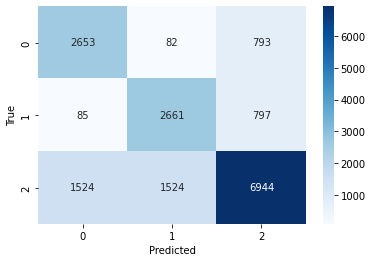

In [ ]:
#Matriz de Confusión
cm = confusion_matrix(y_rf_pred, y_rf_test)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_rf_test,y_rf_pred)
recall=recall_score(y_rf_test,y_rf_pred, average='weighted')
f1=f1_score(y_rf_test,y_rf_pred, average='weighted')
print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.7183965305046006
Recall: 0.7183965305046006
f1 score: 0.715475560439927


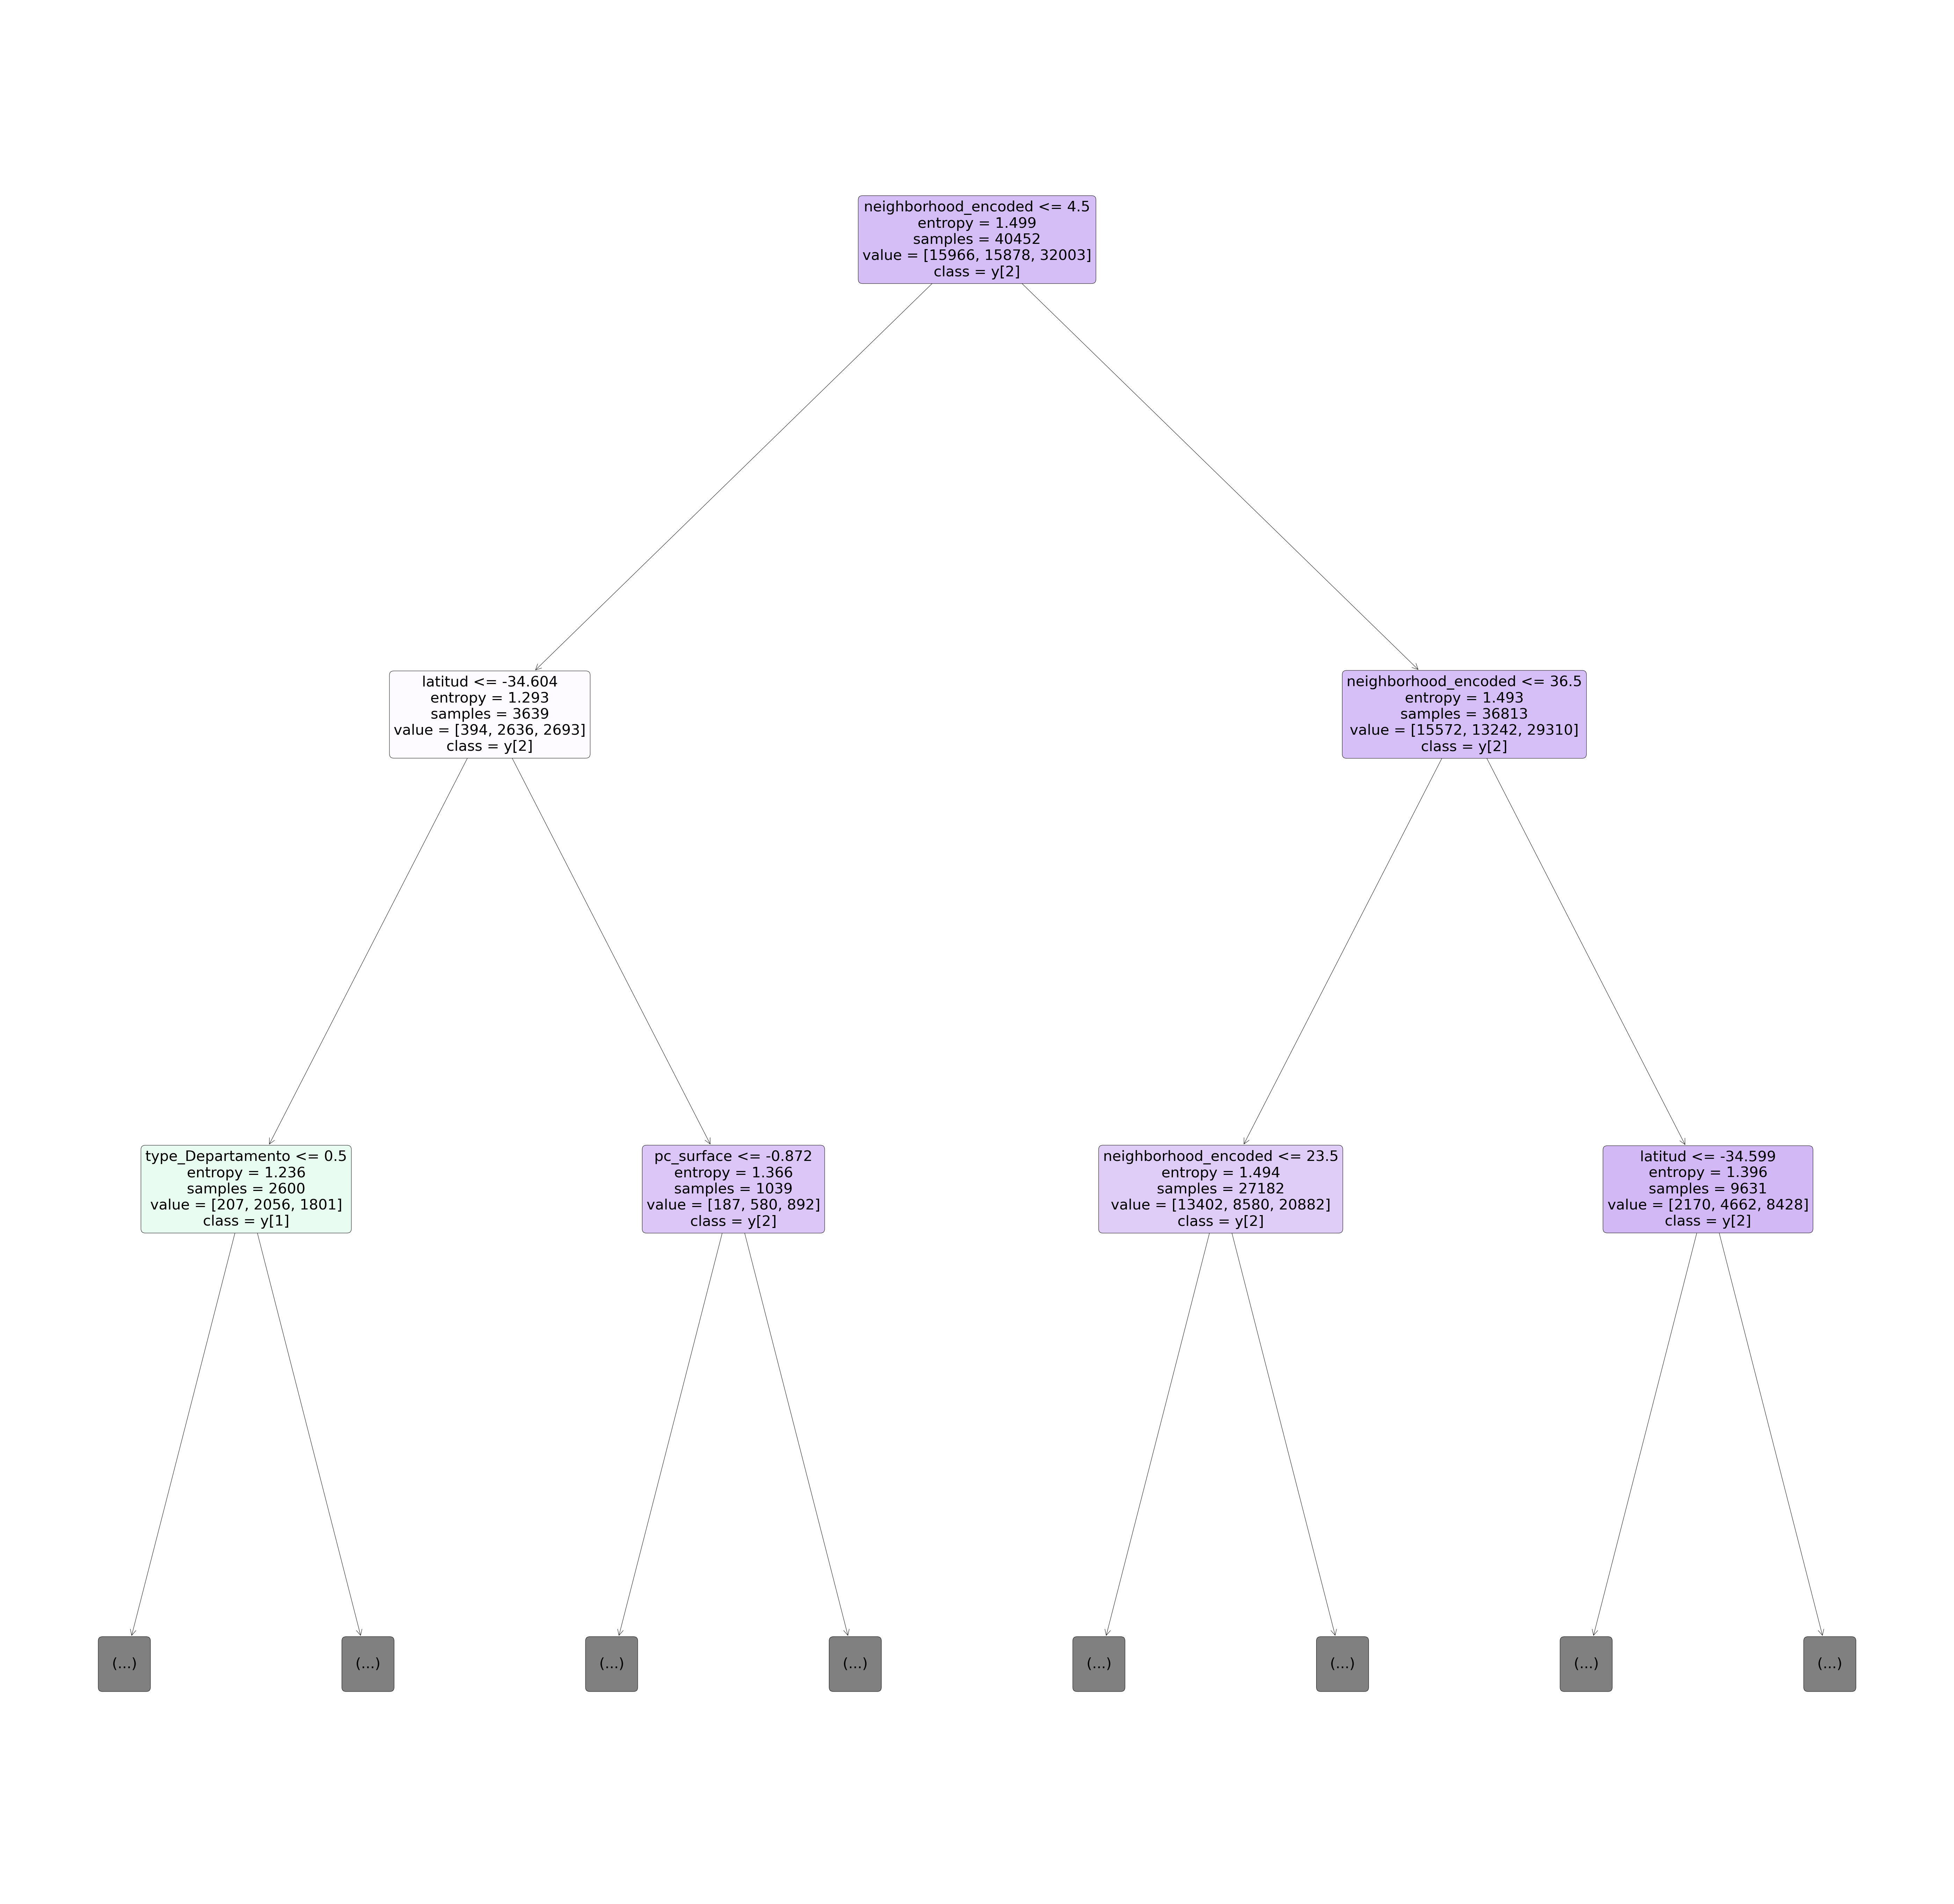

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model.estimators_[48],
                                 feature_names=x_rf_train.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=True,
                                 max_depth=2)
plt.show(tree_plot_completo)

Podemos ver que en este caso a diferencia del anterior modelo el atributo neighborhood_encoded tuvo mucha más importancia a la hora de generar los nodos.

Analizamos la performance con los datos de entrenamiento

In [ ]:
y_rf_pred_train = model.predict(x_rf_train)

Text(33.0, 0.5, 'True')

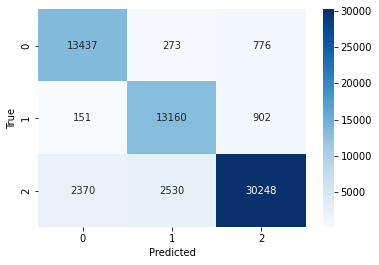

In [ ]:
cm = confusion_matrix(y_rf_pred_train, y_train)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_train,y_rf_pred_train)
recall=recall_score(y_train,y_rf_pred_train, average='weighted')
f1=f1_score(y_train,y_rf_pred_train, average='weighted')
print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.8903315739188998
Recall: 0.8903315739188998
f1 score: 0.8897031131726528


Podemos ver que las metricas subieron considerablemente, lo cual podria estar indicando un overfitting. Sin embargo, previamente vimos que el modelo predijo bastante bien con los datos de test, por lo que no consideramos que se trate de un overfit. Posteriormente esto influira en la eleccion del modelo.

Ahora vamos a ver la performance que obtenemos si utilizamos el dataset sin reducción de dimensionalidad.

In [ ]:
# Seteo los datasets para train y test
x_train_rf_nr = x_train_not_reduced.copy()
y_train_rf_nr = y_train_not_reduced.copy()

x_test_rf_nr = x_test_not_reduced.copy()
y_test_rf_nr = y_test_not_reduced.copy()

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50] }

n=10
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
scorer_fn = make_scorer(f1_score, average='micro')
randomcv = RandomizedSearchCV(estimator=rf_cv,
                              param_distributions = param_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=1459830637) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train_rf_nr,y_train_rf_nr);

In [ ]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'entropy'}
0.5965687504358055


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,x_train_rf_nr.columns)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

type_PH: 0.009184619471404802
type_Departamento: 0.012577997996393864
bedrooms: 0.025356720302822374
rooms: 0.029275384241420208
neighborhood_encoded: 0.0980629682690359
surface_covered: 0.18566307209742064
longitud: 0.27768511778370986
latitud: 0.36219411983779237


Nuevamente latitud y longitud son los más importantes

In [ ]:
tree_model = randomcv.best_estimator_
#Entrenamos el modelo
model = tree_model.fit(X = x_train_rf_nr, y = y_train_rf_nr)

In [ ]:
model

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=1)

In [ ]:
filename = 'random_forest_not_reduced.sav'
joblib.dump(model, filename)


['random_forest_not_reduced.sav']

In [ ]:
y_rf_pred_nr = model.predict(x_test_rf_nr)
#Valores Predichos
y_rf_pred_nr

array([1, 1, 2, ..., 0, 0, 0])

Text(33.0, 0.5, 'True')

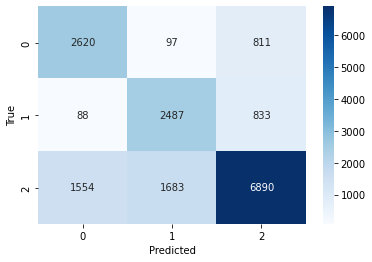

In [ ]:
#Matriz de Confusión
cm = confusion_matrix(y_rf_pred_nr, y_test_rf_nr)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test_rf_nr,y_rf_pred_nr)
recall=recall_score(y_test_rf_nr,y_rf_pred_nr, average='weighted')
f1=f1_score(y_test_rf_nr,y_rf_pred_nr, average='weighted')
print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.7031002754498037
Recall: 0.7031002754498037
f1 score: 0.6994109218380958


Notamos que para este caso, las metricas dieron casi igual para el dataset reducido como para el dataset sin reducir.

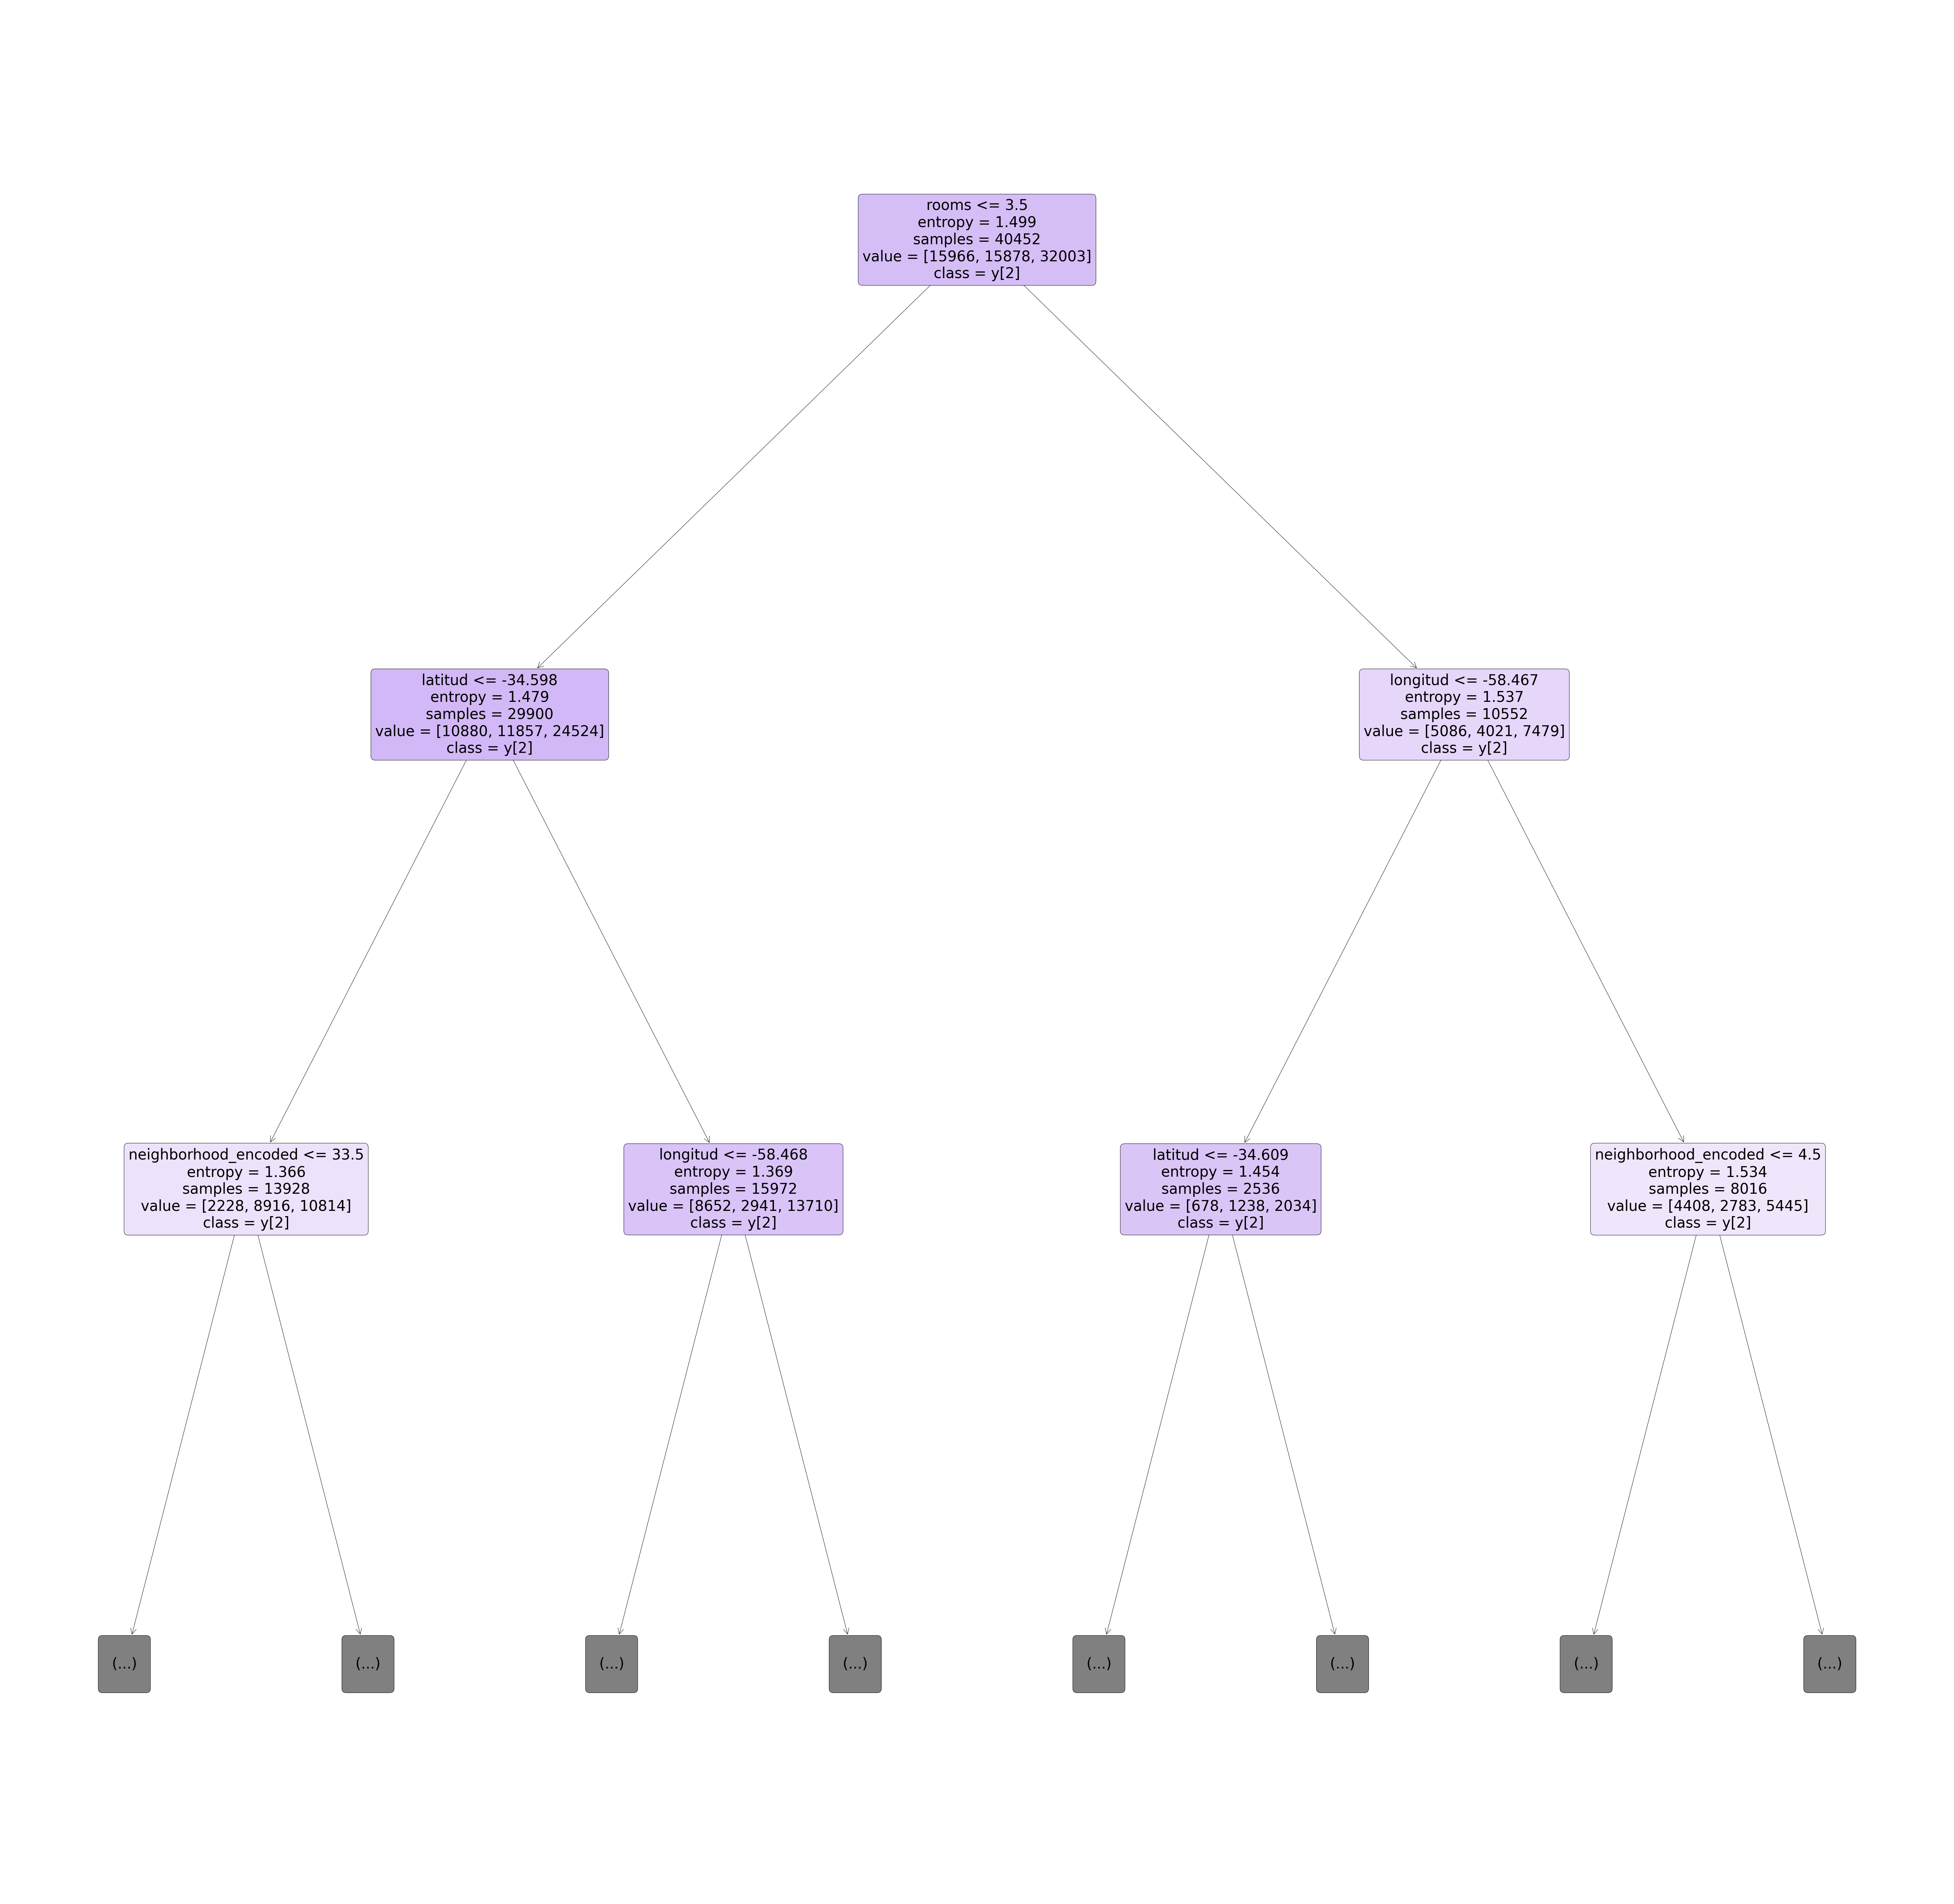

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model.estimators_[48],
                                 feature_names=x_train_rf_nr.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=True,
                                 max_depth=2)
plt.show(tree_plot_completo)

Podemos ver que en este caso a diferencia del anterior árbol el atributo rooms tuvo gran relevancia a la hora de generar los nodos.
Latitud y longitud se mantienen al igual que en el anterior modelo como atributos importantes.

### ● Modelo 3: A elección (Gradient Boosting)

In [ ]:
# Seteo los datasets para train y test

x_grad_train = x_train.copy()
y_grad_train = y_train.copy()

x_grad_test = x_test.copy()
y_grad_test = y_test.copy()


**Caso con reducción de dimensionalidad**

Utilizaremos 5 folds y la métrica accuracy como scorer.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Parámetros a optimizar
params_grid = {
    'n_estimators':range(20, 150, 5), 
    'max_depth':range(1,10), 
    'learning_rate':np.arange(0,1,0.001)
}

#Folds
kfoldcv = StratifiedKFold(n_splits=5)

#Ramdom Search CV
randomcv = RandomizedSearchCV(GradientBoostingClassifier(), params_grid, n_jobs=10, scoring='accuracy',cv=kfoldcv, n_iter=10, random_state=777)
randomcv.fit(x_grad_train,y_grad_train)

print(randomcv.best_score_, randomcv.best_params_)

#Mejor Modelo
best_grad_model = randomcv.best_estimator_


0.596725243626385 {'n_estimators': 125, 'max_depth': 7, 'learning_rate': 0.271}


Text(33.0, 0.5, 'True')

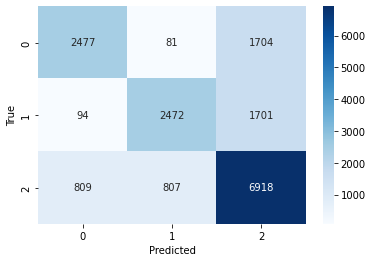

In [ ]:
#Hago la predicción
y_grad_pred=best_grad_model.predict(x_grad_test)

#Matriz de Confusión
cm = confusion_matrix(y_grad_test, y_grad_pred)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import classification_report

#Métricas de la clasificación
print(classification_report(y_grad_test, y_grad_pred))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      4262
           1       0.74      0.58      0.65      4267
           2       0.67      0.81      0.73      8534

    accuracy                           0.70     17063
   macro avg       0.71      0.66      0.68     17063
weighted avg       0.70      0.70      0.69     17063



**Caso sin reducción de dimensionalidad**





In [ ]:
# Seteo los datasets para train y test

x_train_grad_nr = x_train_not_reduced.copy()
y_train_grad_nr = y_train_not_reduced.copy()

x_test_grad_nr = x_test_not_reduced.copy()
y_test_grad_nr = y_test_not_reduced.copy()

In [ ]:
#Parámetros a optimizar
params_grid = {
    'n_estimators':range(20, 150, 5), 
    'max_depth':range(1,10), 
    'learning_rate':np.arange(0,1,0.001)
}

#Folds
kfoldcv = StratifiedKFold(n_splits=5)

#Ramdom Search CV
randomcv = RandomizedSearchCV(GradientBoostingClassifier(), params_grid, n_jobs=10, scoring='accuracy',cv=kfoldcv, n_iter=10, random_state=888)
randomcv.fit(x_train_grad_nr,y_train_grad_nr)

print(randomcv.best_score_, randomcv.best_params_)

#Mejor Modelo
best_grad_model = randomcv.best_estimator_


0.592699870900385 {'n_estimators': 80, 'max_depth': 9, 'learning_rate': 0.045}


In [ ]:
best_grad_model

GradientBoostingClassifier(learning_rate=0.045, max_depth=9, n_estimators=80)

In [ ]:
filename = 'gradient_boost_not_reduced.sav'
joblib.dump(best_grad_model, filename)


['gradient_boost_not_reduced.sav']

Text(33.0, 0.5, 'True')

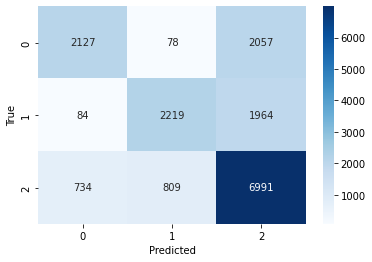

In [ ]:
#Hago la predicción
y_grad_pred_nr=best_grad_model.predict(x_test_grad_nr)

#Matriz de Confusión
cm = confusion_matrix(y_test_grad_nr, y_grad_pred_nr)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#Métricas de la clasificación
print(classification_report(y_test_grad_nr, y_grad_pred_nr))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59      4262
           1       0.71      0.52      0.60      4267
           2       0.63      0.82      0.72      8534

    accuracy                           0.66     17063
   macro avg       0.69      0.61      0.64     17063
weighted avg       0.68      0.66      0.66     17063



Evaluamos la performance con el conjunto de entrenamiento:

Text(33.0, 0.5, 'True')

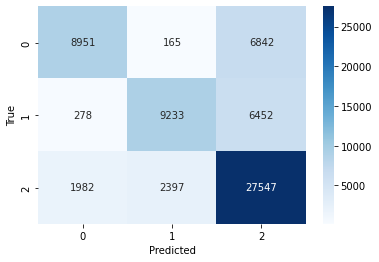

In [ ]:
y_grad_pred_nr_train=best_grad_model.predict(x_train_grad_nr)

cm = confusion_matrix(y_train_grad_nr, y_grad_pred_nr_train)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print(classification_report(y_train_grad_nr, y_grad_pred_nr_train))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66     15958
           1       0.78      0.58      0.67     15963
           2       0.67      0.86      0.76     31926

    accuracy                           0.72     63847
   macro avg       0.75      0.67      0.69     63847
weighted avg       0.73      0.72      0.71     63847



Podemos ver que las metricas aumentaron, pero no tanto como para considerar un overfitting.

### ● Modelo elegido

Viendo todas las metricas de los distintos modelos, notamos que hay dos de ellos que pueden ser considerados elegibles como un futuro predictor (basandonos en la metrica de accuracy). Estos son Random Forest y Gradient Boosting. Sin embargo, podemos notar que esta metrica sube hasta 0,9 para el caso de Random Forest. Esto podria deberse a un overfitting con los datos de train, lo cual es perjudicial para cualquier modelo. Por lo tanto, creemos que la mejor opcion para predecir el tipo de precio de una futura propiedad es Gradient Boosting.

# [4] ★ Regresión

In [ ]:
r_red_train = train_reduced.copy()

In [ ]:
def train_encodings(df):
  df = pd.get_dummies(df, columns=['type'], drop_first=True)
  le = LabelEncoder()
  df['neighborhood_encoded'] = le.fit_transform(df['neighborhood'].astype(str))
  return df

In [ ]:
r_red_train = train_encodings(r_red_train)

In [ ]:
x_r_red_train = r_red_train.loc[:,["latitud", 'longitud', 'neighborhood_encoded', 'type_Departamento', 'type_PH', 'pc_surface', 'pc_room_bedroom']]
y_r_red_train = r_red_train.loc[:, "price"]

In [ ]:
r_red_test = test_reduced.copy()

In [ ]:
r_red_test = train_encodings(r_red_test)

In [ ]:
x_r_red_test = r_red_test.loc[:,["latitud", 'longitud', 'neighborhood_encoded', 'type_Departamento', 'type_PH', 'pc_surface', 'pc_room_bedroom']]
y_r_red_test = r_red_test.loc[:, "price"]

In [ ]:
y_r_red_test

0          85000.0
1         520000.0
2        3300000.0
3          87000.0
4         690000.0
           ...    
17058     152000.0
17059     109000.0
17060     194000.0
17061     142000.0
17062     590000.0
Name: price, Length: 17063, dtype: float64

In [ ]:
r_train = train.copy()

In [ ]:
r_train = train_encodings(r_train)

In [ ]:
x_r_train = r_train.loc[:,["latitud", 'longitud', 'neighborhood_encoded', 'type_Departamento', 'type_PH', 'rooms', 'bedrooms']]
y_r_train = r_train.loc[:, "price"]

In [ ]:
r_test = test.copy()

In [ ]:
r_test = train_encodings(r_test)

In [ ]:
x_r_test = r_test.loc[:,["latitud", 'longitud', 'neighborhood_encoded', 'type_Departamento', 'type_PH', 'rooms', 'bedrooms']]
y_r_test = r_test.loc[:, "price"]

In [ ]:
#Generación de archivos 
r_red_train.to_csv('reg_reduced_train.csv',index=False)
r_red_test.to_csv('reg_reduced_test.csv',index=False)
r_train.to_csv('reg_train.csv',index=False)
r_test.to_csv('reg_test.csv',index=False)

### ● Modelo 1: KNN

In [ ]:
r_red_train = pd.read_csv('reg_reduced_train.csv')
r_red_test = pd.read_csv('reg_reduced_test.csv')
r_train = pd.read_csv('reg_train.csv')
r_test = pd.read_csv('reg_test.csv')

**Caso con reducción de dimensionalidad**


Se utilizaron 20 folds para la busqueda de estos hiperparámetros. Además la métrica considerada, debido a que es un modelo de regresión fue el error cuadratico medio

In [ ]:
params_grid = {'n_neighbors':np.arange(10, 50),
               'weights':['uniform', 'distance'], 
               'algorithm':['auto', 'ball_tree', 'kd_tree'],
               'p':[1,2]
                }
knn_regressor = KNeighborsRegressor() 

knn_reg_cv = RandomizedSearchCV(knn_regressor, params_grid, cv=20, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=30, random_state=3894288)
knn_reg_cv.fit(x_r_red_train, y_r_red_train)

RandomizedSearchCV(cv=20, estimator=KNeighborsRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=3894288, scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
knn_reg_cv.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 31, 'algorithm': 'auto'}

In [ ]:
knn_reg_cv.best_score_

-16993843995.500748

In [ ]:
best_knn_regressor = knn_reg_cv.best_estimator_

In [ ]:
best_knn_regressor

KNeighborsRegressor(n_neighbors=31, p=1, weights='distance')

In [ ]:
filename = 'knn_reduced.sav'
joblib.dump(best_knn_regressor, filename)


['knn_reduced.sav']

In [ ]:
y_pred=best_knn_regressor.predict(x_r_red_test)

In [ ]:
# Performance
performance_r = pd.DataFrame({'Valor Real': y_r_red_test,
                            'Prediccion': y_pred,
                            'Error': y_r_red_test - y_pred})
# View
performance_r

Valor Real    Prediccion         Error
0         85000.0  8.500000e+04  1.392618e-08
1        520000.0  5.200000e+05  2.922025e-08
2       3300000.0  2.021359e+06  1.278641e+06
3         87000.0  1.169625e+05 -2.996251e+04
4        690000.0  5.615002e+05  1.284998e+05
...           ...           ...           ...
17058    152000.0  1.597000e+05 -7.700000e+03
17059    109000.0  1.205654e+05 -1.156537e+04
17060    194000.0  1.940000e+05  5.957554e-08
17061    142000.0  1.332977e+05  8.702281e+03
17062    590000.0  6.107198e+05 -2.071979e+04

[17063 rows x 3 columns]

Podemos ver que hay casos donde el error es muy grande para determinada predicción, y casos donde el error es muy chico

In [ ]:
mse = mean_squared_error(
        y_true  = y_r_red_test,
        y_pred  = y_pred,
        squared = True
       )
print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = mean_squared_error(
        y_true  = y_r_red_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 7758390712.830848
El error (rmse) de test es: 88081.72746279927


Este error se explica teniendo en cuenta que hay mucha variabilidad entre los precios. Y por ello, hay casos en los que hay poco error y otros donde hay mucho.

Se realiza gráfico comparativo de precio verdadero vs predicho

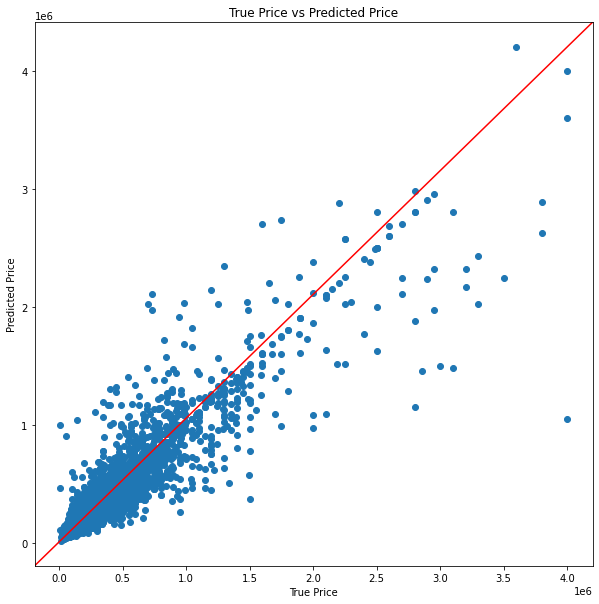

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance_r["Valor Real"], performance_r["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
# ax.set_aspect('equal')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Como podemos ver, el error aumenta considerablemente, a medida que aumenta el precio. Asimismo, esto explica el error alto que vimos en las metricas anteriores

In [ ]:
r2_score(y_r_red_test, y_pred)

0.8711561941384636

Evaluamos el modelo con los datos de train:

In [ ]:
y_pred_train = best_knn_regressor.predict(x_r_red_train)
y_pred_train

array([ 80000.,  79900.,  69000., ..., 175000., 122000., 178000.])

In [ ]:
performance_r_train = pd.DataFrame({'Valor Real': y_r_red_train,
                            'Prediccion': y_pred_train,
                            'Error': y_r_red_train - y_pred_train})
performance_r_train

Valor Real  Prediccion    Error
0         80000.0     80000.0      0.0
1         79900.0     79900.0      0.0
2         69000.0     69000.0      0.0
3        150000.0    140000.0  10000.0
4         85000.0     85000.0      0.0
...           ...         ...      ...
63842     70000.0     70000.0      0.0
63843    158000.0    158000.0      0.0
63844    175000.0    175000.0      0.0
63845    122000.0    122000.0      0.0
63846    178000.0    178000.0      0.0

[63847 rows x 3 columns]

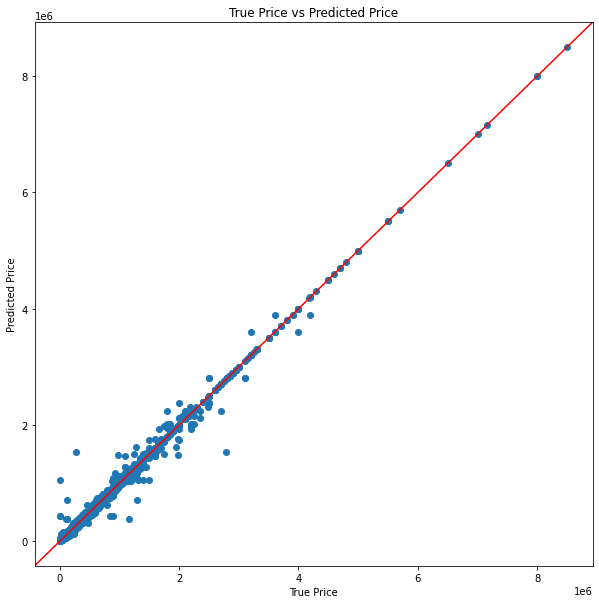

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance_r_train["Valor Real"], performance_r_train["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
# ax.set_aspect('equal')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

In [ ]:
mse = mean_squared_error(
        y_true  = y_r_red_train,
        y_pred  = y_pred_train,
        squared = True
       )
print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = mean_squared_error(
        y_true  = y_r_red_train,
        y_pred  = y_pred_train,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 206631155.79190132
El error (rmse) de test es: 14374.670632466725


In [ ]:
r2_score(y_r_red_train, y_pred_train)

0.9971592549281914

Viendo el grafico y las distintas metricas, podemos observar que nuestro modelo esta overfitteado. Sin embargo, podemos notar que con los datos de test el mismo tuvo buenos resultados. 

**Caso sin reducción de dimensionalidad**

Se utilizaron 15 folds para la busqueda de estos hiperparámetros. Además, la métrica considerada, debido a que es un modelo de regresión fue el error cuadratico medio

In [ ]:
r_train_x = r_train.drop(columns = ['neighborhood','price','pxm2'])
r_train_y = r_train.loc[:, "price"]
r_test_x = r_test.drop(columns = ['neighborhood','price','pxm2'])
r_test_y = r_test.loc[:, "price"]

In [ ]:
knn_regressor_2 = KNeighborsRegressor() 

knn_reg_cv_nr = RandomizedSearchCV(knn_regressor_2, params_grid, cv=15, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=25, random_state=3894288)
knn_reg_cv_nr.fit(r_train_x, r_train_y)

RandomizedSearchCV(cv=15, estimator=KNeighborsRegressor(), n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=3894288, scoring='neg_mean_squared_error')

In [ ]:
knn_reg_cv_nr.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 31, 'algorithm': 'auto'}

In [ ]:
knn_reg_cv_nr.best_score_

-24381492348.200382

In [ ]:
best_knn_regressor_nr = knn_reg_cv_nr.best_estimator_
y_pred_knn=best_knn_regressor_nr.predict(r_test_x)

In [ ]:
filename = 'knn_not_reduced.sav'
joblib.dump(best_knn_regressor_nr, filename)


['knn_not_reduced.sav']

Se realiza gráfico comparativo de precio verdadero vs predicho

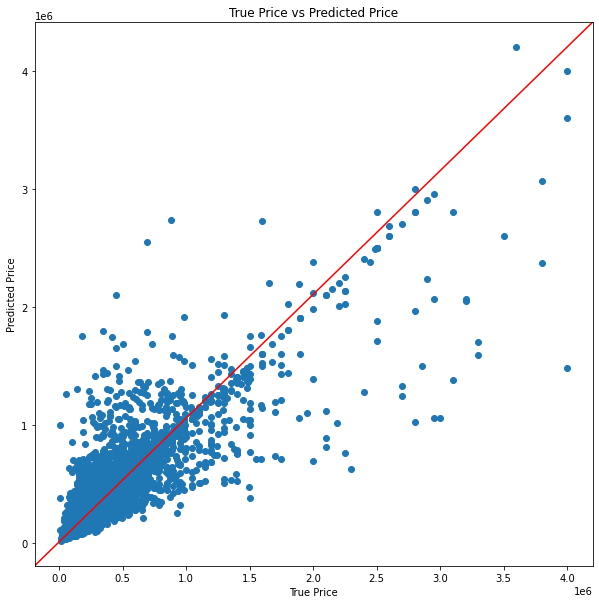

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': r_test_y,
                            'Prediccion': y_pred_knn,
                            'Error': r_test_y - y_pred_knn})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Como podemos ver, el error aumenta considerablemente, a medida que aumenta el precio, similar al caso con reducción de dimensionalidad. A diferencia de este último, el "cono" de valores de precios realtivamente bajos es más grande debido a su dispersión, y a medida que aumentan los precios. Luego, las estimaciones ya no son buenas

In [ ]:
mse = mean_squared_error(
        y_true  = r_test_y,
        y_pred  = y_pred_knn,
        squared = True
       )
print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = mean_squared_error(
        y_true  = r_test_y,
        y_pred  = y_pred_knn,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 13469038414.71707
El error (rmse) de test es: 116056.18645603115


### ● Modelo 2: XGBOOST

**Caso con Reducción de Dimensionalidad**


In [ ]:
xg_reduced_train = r_red_train.copy()
xg_reduced_test = r_red_test.copy()
xg_train = r_train.copy()
xg_test = r_test.copy()

In [ ]:
xg_reduced_train_x = xg_reduced_train.drop(columns = ['neighborhood','price','pxm2'])
xg_reduced_train_y = xg_reduced_train.loc[:, "price"]
xg_reduced_test_x = xg_reduced_test.drop(columns = ['neighborhood','price','pxm2'])
xg_reduced_test_y = xg_reduced_test.loc[:, "price"]

Se utilizaron 5 folds stratified, con métrica r2

In [ ]:
xg_params_grid = {'n_estimators':np.arange(1, 101),
                  'learning_rate':np.arange(0,1,0.001),
                  'max_depth':range(1,6),
                  'objective':['reg:squarederror']
                }

#Folds
folds = 5
kfoldcv = StratifiedKFold(n_splits=folds)

In [ ]:
#Ramdom Search CV

xg_model = xgb.XGBRegressor(random_state=7)

randomcv = RandomizedSearchCV(xg_model, xg_params_grid, n_jobs=1, 
                              scoring='r2',cv=kfoldcv, n_iter=100, random_state=7)

randomcv.fit(xg_reduced_train_x,xg_reduced_train_y)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(random_state=7), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0....
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  8

In [ ]:
xg_reduced_params = randomcv.best_params_
print (f"Best Score: {randomcv.best_score_}\n Best Parameters: {xg_reduced_params}")

Best Score: 0.8096250007054568
 Best Parameters: {'objective': 'reg:squarederror', 'n_estimators': 86, 'max_depth': 5, 'learning_rate': 0.41200000000000003}


Best Score: 0.8096250007054568 {'objective': 

---

'reg:squarederror', 'n_estimators': 86, 'max_depth': 5, 'learning_rate': 0.41200000000000003}

In [ ]:
#Entreno el modelo ya con los parametros obtenidos
xg_model = xgb.XGBRegressor(random_state=7,params=xg_reduced_params)
xg_model.fit(xg_reduced_train_x,xg_reduced_train_y)

[02:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(params={'learning_rate': 0.41200000000000003, 'max_depth': 5,
                     'n_estimators': 86, 'objective': 'reg:squarederror'},
             random_state=7)

In [ ]:
xg_model

XGBRegressor(params={'learning_rate': 0.158, 'max_depth': 5, 'n_estimators': 64,
                     'objective': 'reg:squarederror'},
             random_state=7)

In [ ]:
filename = 'xg_boost_reduced.sav'
joblib.dump(xg_model, filename)


['xg_boost_reduced.sav']

In [ ]:
#Realizo Prediccion
xg_reduced_pred_y = xg_model.predict(xg_reduced_test_x)

In [ ]:
#Veo metricas
r2_score(xg_reduced_test_y, xg_reduced_pred_y)

0.8346325973823903

La métrica r2 dió muy buena con el conjunto test y el train (0.83 vs 0.80). Que el valor de r2 sea alto, significa que nuestro modelo explica una alta variabilidad de los datos

In [ ]:
mean_absolute_error(xg_reduced_test_y, xg_reduced_pred_y)

47174.327704310635

Es importante ver que el error cuadratico medio dio menos que otros modelos de esta sección.

In [ ]:
max_error(xg_reduced_test_y, xg_reduced_pred_y)

2789414.625

In [ ]:
mean_absolute_percentage_error(xg_reduced_test_y, xg_reduced_pred_y)

0.23886166743676668

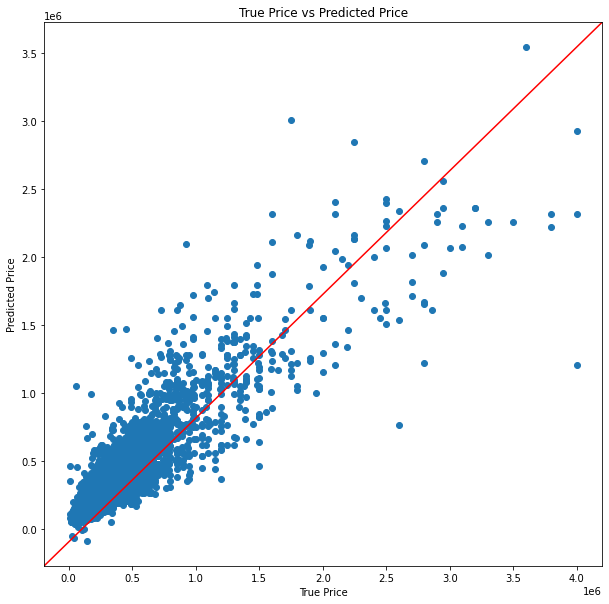

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': xg_reduced_test_y,
                            'Prediccion': xg_reduced_pred_y,
                            'Error': xg_reduced_test_y - xg_reduced_pred_y})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

**Caso Sin Reduccion de Dimensionalidad**

In [ ]:
xg_train_x = xg_train.drop(columns = ['neighborhood','price','pxm2'])
xg_train_y = xg_train.loc[:, "price"]
xg_test_x = xg_test.drop(columns = ['neighborhood','price','pxm2'])
xg_test_y = xg_test.loc[:, "price"]

Se utilizaron 5 folds stratified, con métrica r2

In [ ]:
xg_params_grid = {'n_estimators':np.arange(1, 101),
                  'learning_rate':np.arange(0,1,0.001),
                  'max_depth':range(1,6),
                  'objective':['reg:squarederror']
                }

#Folds
folds = 5
kfoldcv = StratifiedKFold(n_splits=folds)

In [ ]:
#Ramdom Search CV

xg_model = xgb.XGBRegressor(random_state=7)

randomcv = RandomizedSearchCV(xg_model, xg_params_grid, n_jobs=1, 
                              scoring='r2',cv=kfoldcv, n_iter=100, random_state=7)

randomcv.fit(xg_train_x,xg_train_y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(random_state=7), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0....
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  8

In [ ]:
xg_params = randomcv.best_params_
print (f"Best Score: {randomcv.best_score_}\n Best Parameters: {xg_params}")

Best Score: 0.796746432423229
 Best Parameters: {'objective': 'reg:squarederror', 'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.158}


Best Score: 0.796746432423229 

---


 Best Parameters: {'objective': 'reg:squarederror', 'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.158}

In [ ]:
#Entreno el modelo ya con los parametros obtenidos
xg_model = xgb.XGBRegressor(random_state=7,params=xg_params)
xg_model.fit(xg_train_x,xg_train_y)

[02:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(params={'learning_rate': 0.158, 'max_depth': 5, 'n_estimators': 64,
                     'objective': 'reg:squarederror'},
             random_state=7)

In [ ]:
#Realizo Prediccion
xg_pred_y = xg_model.predict(xg_test_x)

In [ ]:
#Veo metricas
r2_score(xg_test_y, xg_pred_y)

0.8367753438318697

La métrica r2 dió muy buena con el conjunto test y el train (0.79 del modelo entrenado vs 0.83 en la comparacion prediccion-test). Que el valor de r2 sea alto, significa que nuestro modelo explica una alta variabilidad de los datos. No representa un problema de underfitting que para test diera mas alto que para train.

In [ ]:
mean_absolute_error(xg_test_y, xg_pred_y)

47075.35308446204

In [ ]:
max_error(xg_test_y, xg_pred_y)

2817521.5

In [ ]:
mean_absolute_percentage_error(xg_test_y, xg_pred_y)

0.2366008995590258

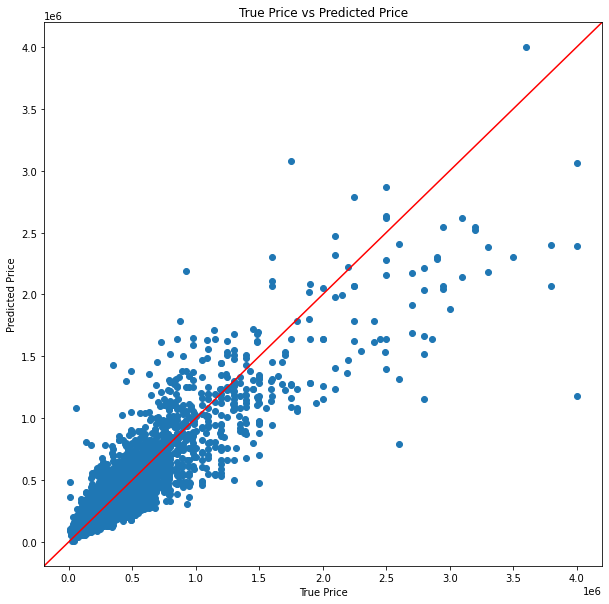

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': xg_test_y,
                            'Prediccion': xg_pred_y,
                            'Error': xg_test_y - xg_pred_y})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Evaluamos el modelo con los datos de train:

In [ ]:
xg_pred_y_train = xg_model.predict(xg_train_x)

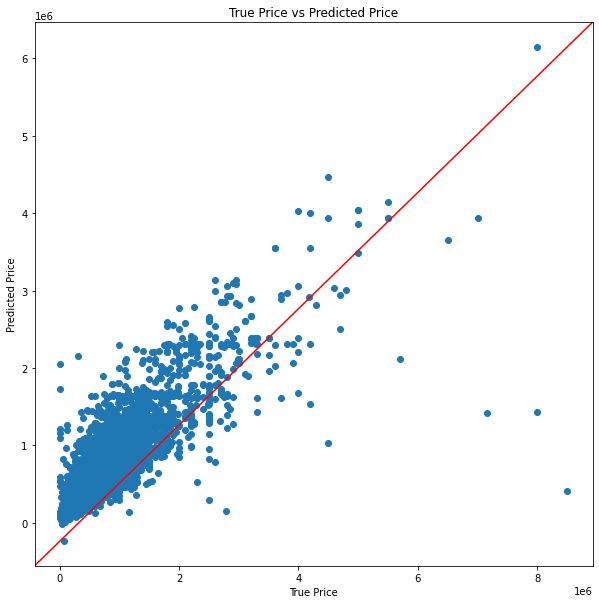

In [ ]:
# Performance
performance_train = pd.DataFrame({'Valor Real': xg_train_y,
                            'Prediccion': xg_pred_y_train,
                            'Error': xg_train_y - xg_pred_y_train})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance_train["Valor Real"], performance_train["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

In [ ]:
performance_train

Valor Real     Prediccion         Error
0         80000.0  109573.585938 -29573.585938
1         79900.0  124343.632812 -44443.632812
2         69000.0  103699.734375 -34699.734375
3        150000.0  151216.015625  -1216.015625
4         85000.0  116199.984375 -31199.984375
...           ...            ...           ...
63842     70000.0   65005.992188   4994.007812
63843    158000.0  212956.734375 -54956.734375
63844    175000.0  177074.640625  -2074.640625
63845    122000.0  154869.890625 -32869.890625
63846    178000.0  151300.078125  26699.921875

[63847 rows x 3 columns]

In [ ]:
r2_score(xg_train_y, xg_pred_y_train)

0.8137212809758974

In [ ]:
mean_absolute_percentage_error(xg_train_y, xg_pred_y_train)

0.24896382683975612

Notamos que para este modelo, la prediccion con los datos de evaluacion y los datos de entrenamiento tuvo resultados similiares. Esto nos permite suponer que el modelo no esta overfiteado y funciona correctamente. Ademas, El modelo funciona bien tanto con como sin reducción.

### ● Modelo 3: A elección (AdaBoost)

**Con reduccion de dimensionalidad:**

Se utilizan 5 folds y se utiliza de métrica r2

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
params_grid = {
    'n_estimators':np.arange(1, 101),
    'learning_rate':np.arange(0,1,0.01),
    'loss':['linear', 'square', 'exponential'], 
}

ab_regressor = AdaBoostRegressor(random_state=4928)

random_search_ab = RandomizedSearchCV(ab_regressor, params_grid, n_jobs=10, cv=5, n_iter=50, random_state=7, scoring='r2')

random_search_ab.fit(x_r_red_train,y_r_red_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=4928),
                   n_iter=50, n_jobs=10,
                   param_distributions={'learning_rate': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0...
                                                 'exponential'],
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  7

In [ ]:
random_search_ab.best_params_

{'n_estimators': 17, 'loss': 'exponential', 'learning_rate': 0.11}

In [ ]:
random_search_ab.best_score_

0.6154645872646942

In [ ]:
best_ab_regressor = random_search_ab.best_estimator_

In [ ]:
best_ab_regressor.fit(x_r_red_train,y_r_red_train)

AdaBoostRegressor(learning_rate=0.11, loss='exponential', n_estimators=17,
                  random_state=4928)

In [ ]:
filename = 'adaboost_reduced.sav'
joblib.dump(best_ab_regressor, filename)


['adaboost_reduced.sav']

In [ ]:
y_pred=best_ab_regressor.predict(x_r_red_test)

In [ ]:
r2_score(y_r_red_test, y_pred)

0.6687642882732754

In [ ]:
max_error(y_r_red_test, y_pred)


3429463.1542461007

In [ ]:
mean_absolute_error(y_r_red_test, y_pred)


70092.92119772833

In [ ]:
mean_squared_error(y_r_red_test, y_pred)

19945515055.494884

In [ ]:
mean_squared_log_error(y_r_red_test, y_pred)

0.16789691572395735

In [ ]:
mean_absolute_percentage_error(y_r_red_test, y_pred)

0.37919040273231247

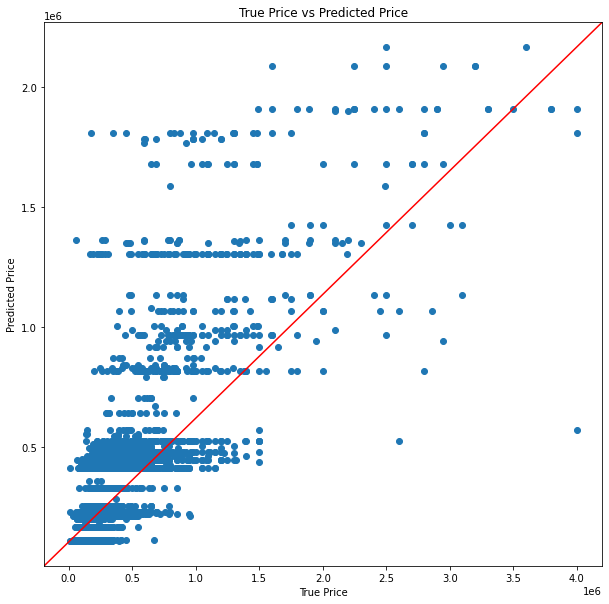

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': y_r_red_test,
                            'Prediccion': y_pred,
                            'Error': y_r_red_test - y_pred})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

**Sin reduccion de dimensionalidad**

Se utilizan 5 folds y se utiliza de métrica r2


In [ ]:
params_grid = {
    'n_estimators':np.arange(1, 101),
    'learning_rate':np.arange(0,1,0.01),
    'loss':['linear', 'square', 'exponential'], 
}

ab_regressor_not_reduced = AdaBoostRegressor(random_state=4923)

random_search_ab_not_reduced = RandomizedSearchCV(ab_regressor_not_reduced, params_grid, n_jobs=10, cv=5, n_iter=50, random_state=54255234, scoring='r2')

random_search_ab_not_reduced.fit(x_r_train,y_r_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=4923),
                   n_iter=50, n_jobs=10,
                   param_distributions={'learning_rate': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0...
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84, 

In [ ]:
best_ab_regressor_not_reduced = random_search_ab_not_reduced.best_estimator_
best_ab_regressor_not_reduced

AdaBoostRegressor(learning_rate=0.77, n_estimators=1, random_state=4923)

In [ ]:
best_ab_regressor_not_reduced.fit(x_r_train,y_r_train)

AdaBoostRegressor(learning_rate=0.77, n_estimators=1, random_state=4923)

In [ ]:
filename = 'adaboost_not_reduced.sav'
joblib.dump(best_ab_regressor_not_reduced, filename)

['adaboost_not_reduced.sav']

In [ ]:
y_pred_not_reduced = best_ab_regressor_not_reduced.predict(x_r_test)

In [ ]:
r2_score(y_r_test, y_pred_not_reduced)

0.3981981077401191

In [ ]:
max_error(y_r_test, y_pred_not_reduced)

3689430.018747142

In [ ]:
mean_absolute_error(y_r_test, y_pred_not_reduced)

89515.31086018211

In [ ]:
mean_squared_error(y_r_test, y_pred_not_reduced)

36237785593.594635

In [ ]:
mean_squared_log_error(y_r_test, y_pred_not_reduced)

0.2423738187080964

In [ ]:
mean_absolute_percentage_error(y_r_test, y_pred_not_reduced)

0.46595997960294483

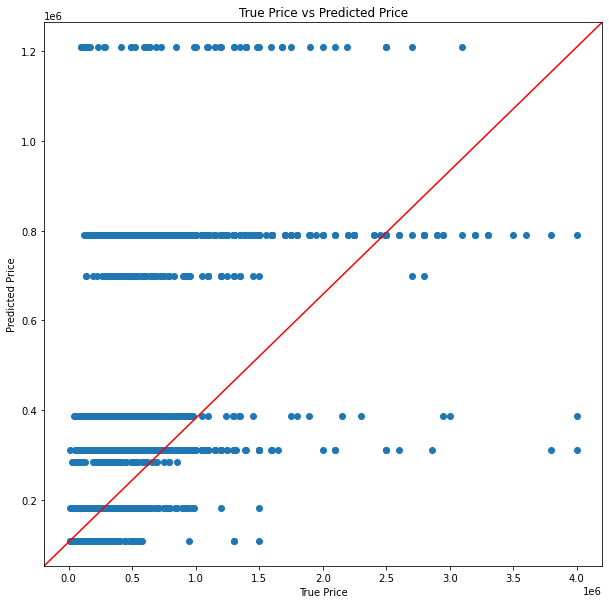

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': y_r_test,
                            'Prediccion': y_pred_not_reduced,
                            'Error': y_r_test - y_pred_not_reduced})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Evaluamos el modelo con datos de entrenamiento:

In [ ]:
y_pred_train=best_ab_regressor.predict(x_r_red_train)

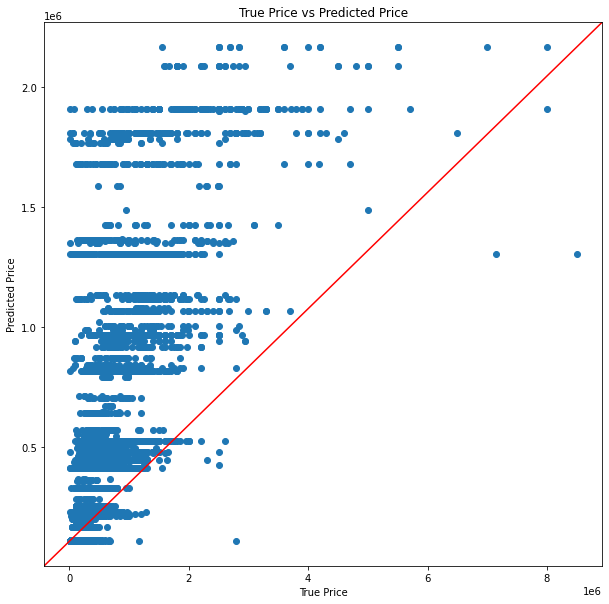

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': y_r_red_train,
                            'Prediccion': y_pred_train,
                            'Error': y_r_red_train - y_pred_train})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

In [ ]:
r2_score(y_r_red_train, y_pred_train)

0.6149701060479287

In [ ]:
mean_absolute_percentage_error(y_r_red_train, y_pred_train)

0.40392153208097414

Podemos observar que este modelo no resulto ser del todo bueno. Notamos que hay una gran diferencia de metricas y error si usamos el dataset sin reducir. Por otro lado, las metricas usando el dataset de entrenamiento reducido y el dataset de test reducido no variraron mucho. 

### ● Modelo elegido

Analizando los distintos modelos, podemos observar los siguientes puntos. En el caso de KNN logramos entrenar un modelo que predijo bien los datos de test. Sin embargo, como mencionamos previamente, este modelo resulto estar overfitteado por los datos de entrenamiento, por lo cual no seria una buena eleccion para una futura prediccion. Por otro lado, en el caso de AdaBoost, notamos que comparado a los otros modelos, este dio un error mas grande y no pudo predecir del todo bien los datos de test. Finalmente, queda el caso de XGBoost. En este caso, el modelo tuvo una buena performance con los datos de test y al contrario de KNN, este no se overfitteo con los datos de entrenamiento. Es por eso, que elegiriamos este modelo si es que en un futuro se quisiera realizar una nueva prediccion del precio de una propiedad.

# [5] ★ Conclusiones

A lo largo del TP pudimos observar y analizar las distintas fases que hacen al entrenamiento de un modelo de Machine Learning.
En principio, el preprocesamiento que realizamos nos permitió entender mucho el dataset y analizar en gran profundidad los datos y entender su potencial, para así poder dejarlos en buenas condiciones. Esto nos llevó a darnos cuenta de la vital importancia que conlleva este paso para el buen entrenamiento del modelo.

Cuando analizamos a nivel clusters, pudimos entender un poco mejor las características que dividían a nuestro dataset, relacionadas mayormente por el atributo "precio".

Asimismo, la aplicación de los distintos modelos nos permitió comprender la distribución de precios de propiedades en la ciudad de Buenos Aires. Ya sea, diferenciándolas a través de una clasificación de datos, o prediciéndolas utilizando un modelo de regresión.

Notamos que la reducción de la dimensionalidad afectó a cada modelo de forma distinta. Generalmente se afectaron de forma positiva los resultados obtenidos por los distintos modelos en base a las métricas utilizadas en cada caso. En algunos casos, no llevaron a una disminución negativa considerable de las métricas. Lo cual nos lleva a pensar que es preferible realizar reducciones siempre que el caso lo permita.

Cuando empezamos a entrenar a nuestros modelos nos dimos cuenta que encontramos una gran variedad de resultados, dependiendo del modelo elegido. Esto nos llevó a pensar que es importante poder entender bien nuestros datos y métricas para elegir el modelo que mejor se adapte a los mismos y así lograr buenos resultados.

Fue de gran notoriedad que el modelo AdaBoost no se adaptó como regresor a nuestros datos.

Por otro lado vamos a comentar algunos aspectos que nos hubiese gustado analizar:

Nos hubiese gustado poder analizar otros tipos de entrada de datos, como por ejemplo: Fotos, vídeos y demás.
 Creemos que en la teórica hemos visto varios temas para poder analizarlos y que hubiese estado interesante para sacar varias conclusiones y poner en práctica lo visto en las clases.
 Además de eso, el hecho de poder aplicar ensambles heterogéneos que nos permitan amplitud y variedad de modelos para poder obtener mejor resultados con nuestros datos. Por ejemplo: Stacking, Voting, Cascading, etc.





